In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

수정사항
1. L2 error norm ($\epsilon$)의 정의가 변경되었습니다.(루트 삭제)

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [4]:
x_csv = pd.read_csv('x_input(15_sensors).csv', header=None)

In [5]:
x_csv = x_csv.to_numpy(dtype='float32')

In [6]:
x = x_csv[-37:-1, :15]

In [7]:
x.shape

(36, 15)

In [8]:
x = x.reshape((36, 15, 1))

In [9]:
y_csv = pd.read_csv('y_output(TSR2.0).csv', header=None)

In [10]:
y_csv = y_csv.to_numpy(dtype='float32')

In [11]:
y = y_csv[-3601:-1, :]

In [12]:
y = y.reshape((36, 100, 100))

"ax = plt.subplot(6, 6, 1)\n#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)\n#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)\na1 = plt.contourf(xmesh, ymesh, y[0].T, levels=16, cmap=cmap)\nax.set_xlabel('x/D', fontsize=15)\nax.set_ylabel('y/D', fontsize=15)\n#ax.get_xaxis().set_visible(False)\n#ax.get_yaxis().set_visible(False)\nax.set_title('Original test image', fontsize=15)\n\n# Display reconstruction\nax = plt.subplot(6, 6, 2)\n#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)\n#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)\na2 = plt.contourf(xmesh, ymesh, y[1].T, levels=16, cmap=cmap)\nax.set_xlabel('x/D', fontsize=15)\nax.set_ylabel('y/D', fontsize=15)\n#ax.get_xaxis().set_visible(False)\n#ax.get_yaxis().set_visible(False)\nax.set_title('Reconstructed image', fontsize=15)"

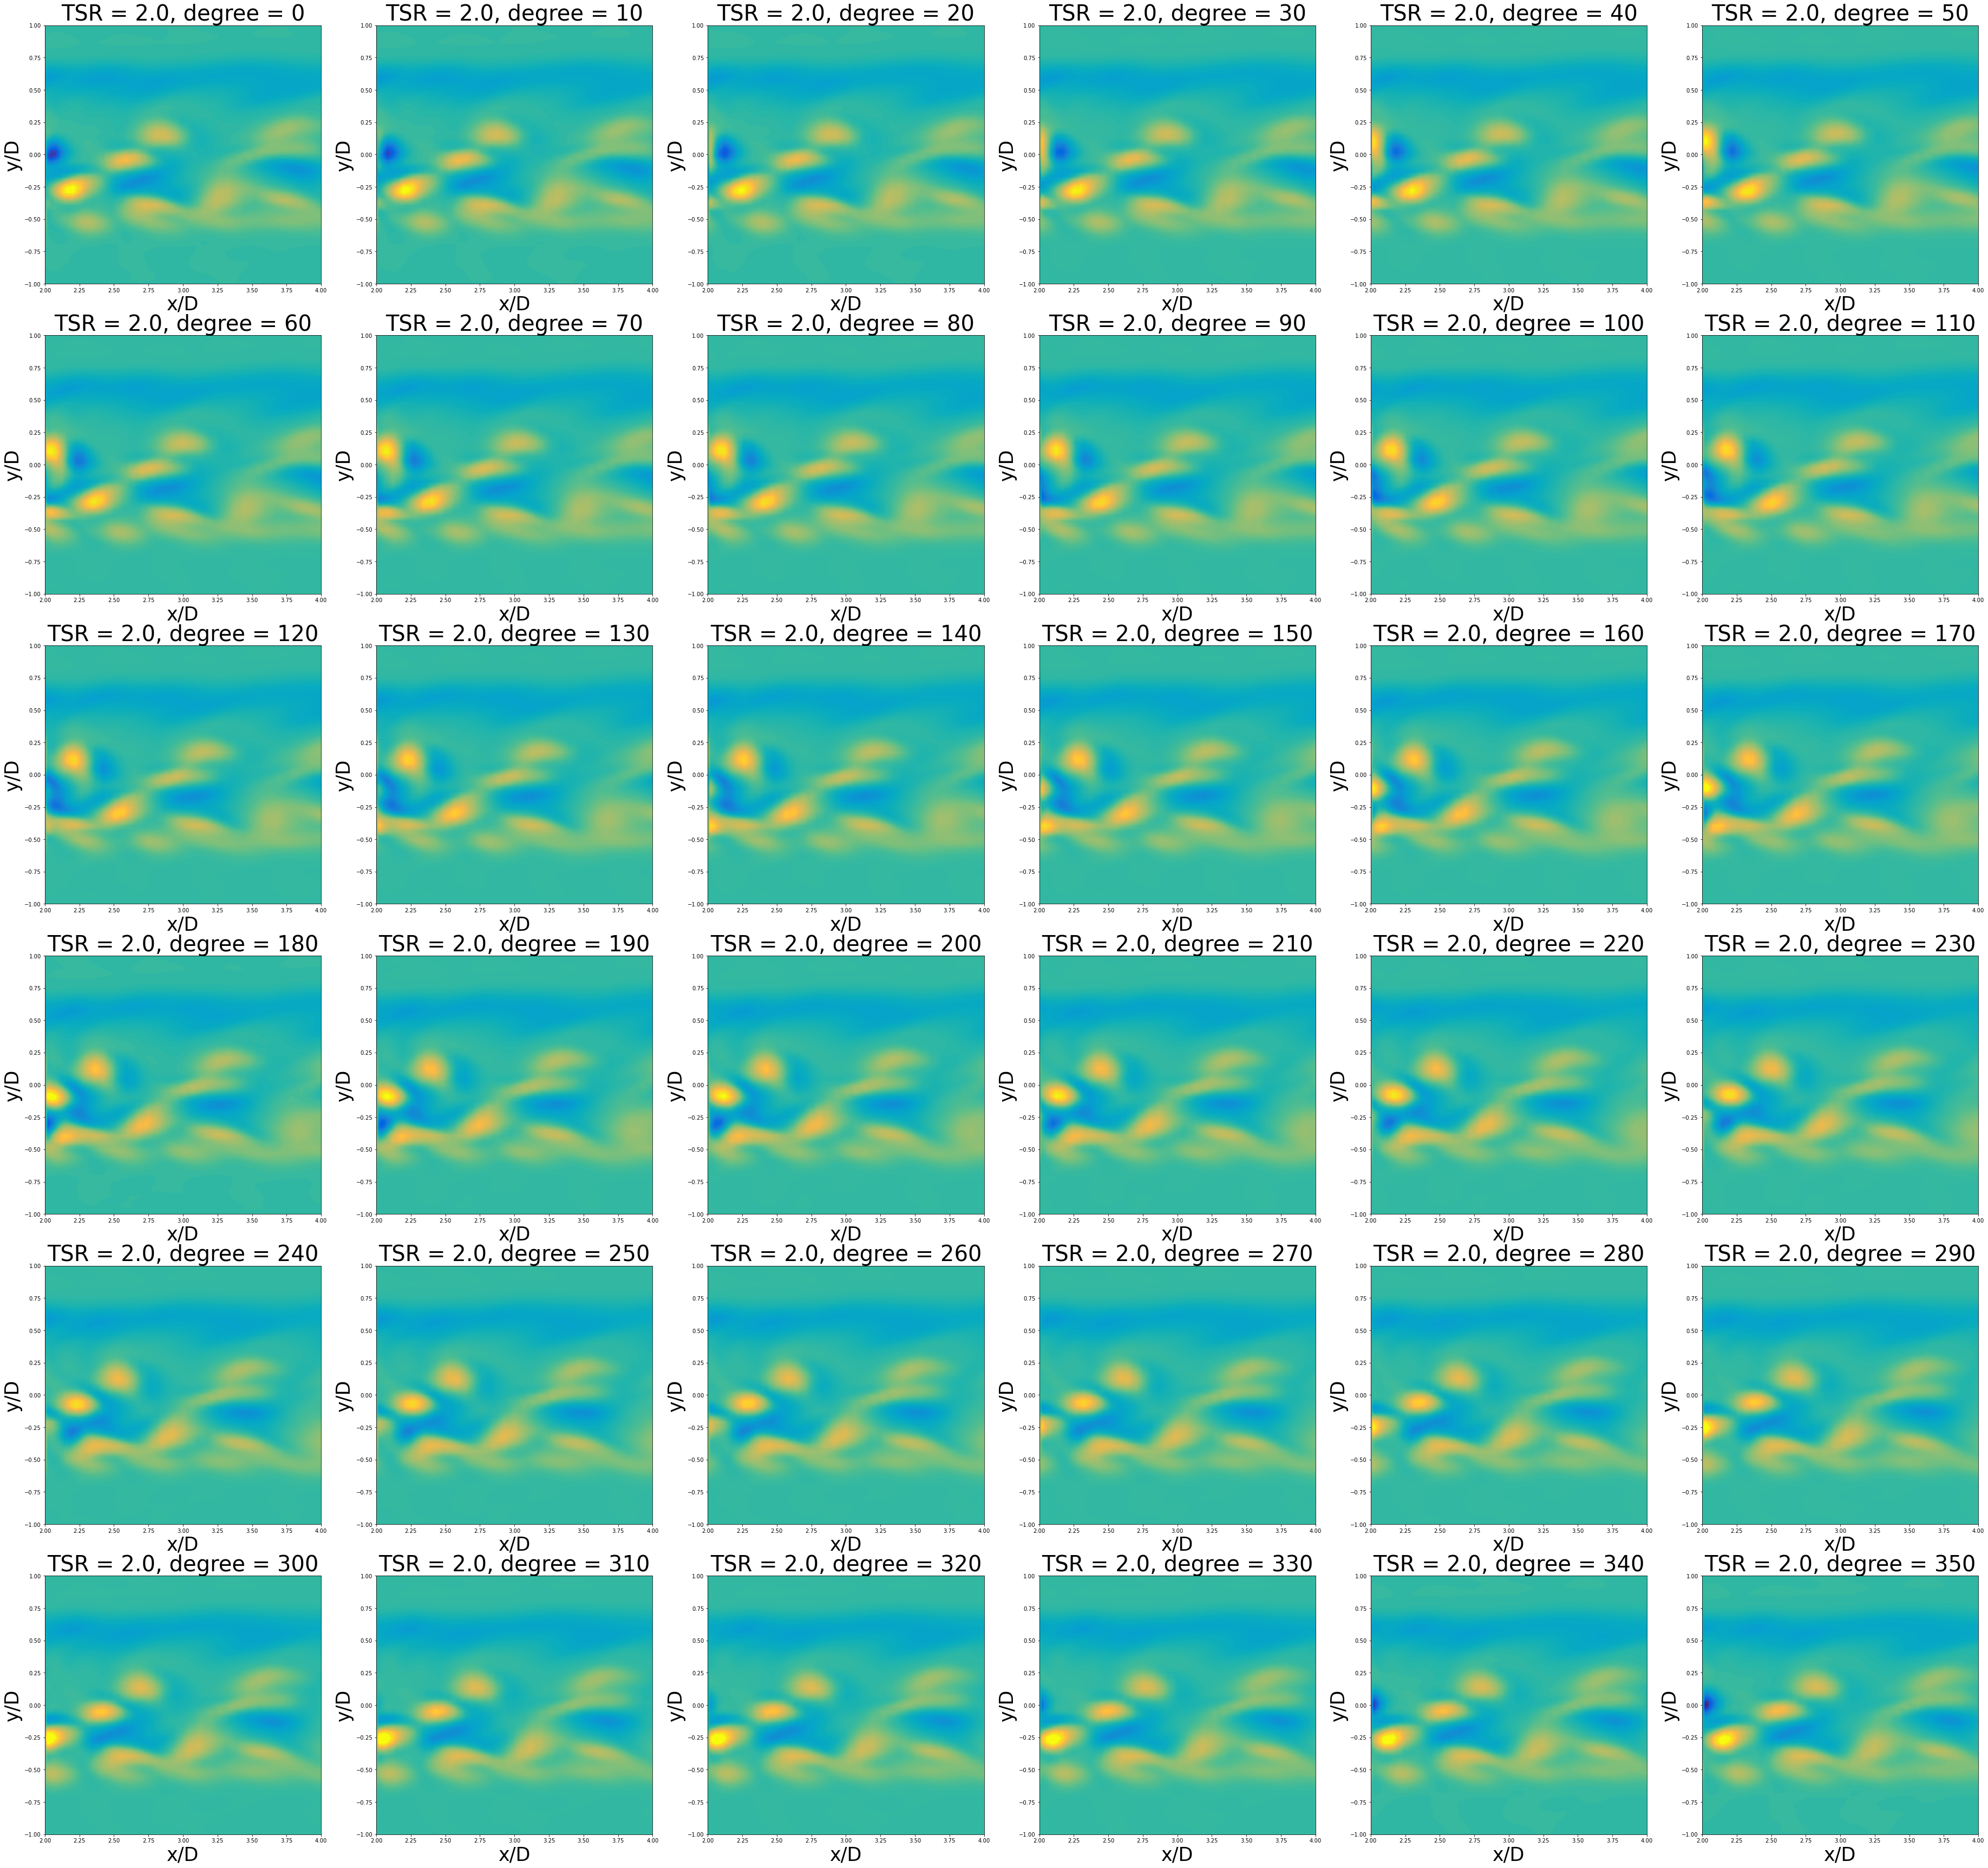

In [13]:
fig = plt.figure(figsize=(64, 72))

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

for i in range(0, 36):
    ax = fig.add_subplot(7, 6, i+1)
    ax.contourf(xmesh, ymesh, y[i], vmin=-0.7, vmax=0.7, levels=128, cmap=cmap)
    ax.set_xlabel('x/D', fontsize=35)
    ax.set_ylabel('y/D', fontsize=35)
    ax.set_title('TSR = 2.0, degree = %d' %(i*10), fontsize=40)

'''ax = plt.subplot(6, 6, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y[0].T, levels=16, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(6, 6, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, y[1].T, levels=16, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)'''

#cax = plt.axes([0.95, 0.15, 0.05, 0.73])
#cbar = plt.colorbar(ax, cax=cax)
#cbar.set_label('Dimensionless vorticity', fontsize=15)
#cbar.set_ticks([3, 4, 5, 6, 7, 8, 9, 10])

#plt.suptitl

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.28, random_state=42)

In [15]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=128, activation='relu', name='firstHiddenLayer')(reshape)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(units=128, activation='relu', name='secondHiddenLayer')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(units=128, activation='relu', name='thirdHiddenLayer')(x)
x = tf.keras.layers.BatchNormalization()(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [16]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape (Reshape)           (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 128)               2048      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 secondHiddenLayer (Dense)   (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                             

In [17]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [18]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=20000, shuffle=True)
end = datetime.datetime.now()

Epoch 1/20000
1/1 [==============================] - 1s 1s/step - loss: 0.0378 - rmse: 0.1945
Epoch 2/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0368 - rmse: 0.1917
Epoch 3/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0356 - rmse: 0.1888
Epoch 4/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0345 - rmse: 0.1858
Epoch 5/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0334 - rmse: 0.1829
Epoch 6/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0324 - rmse: 0.1799
Epoch 7/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0313 - rmse: 0.1769
Epoch 8/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0303 - rmse: 0.1740
Epoch 9/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0293 - rmse: 0.1710
Epoch 10/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0283 - rmse: 0.1681
Epoch 11/20000
1/1 [============================

1/1 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 87/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0826
Epoch 88/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0068 - rmse: 0.0824
Epoch 89/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0068 - rmse: 0.0822
Epoch 90/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0820
Epoch 91/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0818
Epoch 92/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 93/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0814
Epoch 94/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0812
Epoch 95/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0066 - rmse: 0.0810
Epoch 96/20000
1/1 [==============================] - 

1/1 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0703
Epoch 171/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0702
Epoch 172/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0700
Epoch 173/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0699
Epoch 174/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0049 - rmse: 0.0698
Epoch 175/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0697
Epoch 176/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0695
Epoch 177/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0694
Epoch 178/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0693
Epoch 179/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0691
Epoch 180/20000
1/1 [=========================

1/1 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 255/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0570
Epoch 256/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0568
Epoch 257/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 258/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 259/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 260/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0560
Epoch 261/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 262/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 263/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 264/20000
1/1 [=========================

1/1 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 339/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 340/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0380
Epoch 341/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 342/20000
1/1 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 343/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 344/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 345/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 346/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0366
Epoch 347/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 348/20000
1/1 [=======================

1/1 [==============================] - 0s 10ms/step - loss: 4.5180e-04 - rmse: 0.0213
Epoch 421/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.4506e-04 - rmse: 0.0211
Epoch 422/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.3823e-04 - rmse: 0.0209
Epoch 423/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.3227e-04 - rmse: 0.0208
Epoch 424/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.2550e-04 - rmse: 0.0206
Epoch 425/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.1926e-04 - rmse: 0.0205
Epoch 426/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.1319e-04 - rmse: 0.0203
Epoch 427/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.0712e-04 - rmse: 0.0202
Epoch 428/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.0111e-04 - rmse: 0.0200
Epoch 429/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.9523e-04 - rmse: 0.0199
Epoc

1/1 [==============================] - 0s 7ms/step - loss: 1.6191e-04 - rmse: 0.0127
Epoch 502/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6036e-04 - rmse: 0.0127
Epoch 503/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5882e-04 - rmse: 0.0126
Epoch 504/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.5730e-04 - rmse: 0.0125
Epoch 505/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5582e-04 - rmse: 0.0125
Epoch 506/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.5435e-04 - rmse: 0.0124
Epoch 507/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5290e-04 - rmse: 0.0124
Epoch 508/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.5150e-04 - rmse: 0.0123
Epoch 509/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5011e-04 - rmse: 0.0123
Epoch 510/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4874e-04 - rmse: 0.0122
Ep

1/1 [==============================] - 0s 7ms/step - loss: 8.9358e-05 - rmse: 0.0095
Epoch 583/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.8909e-05 - rmse: 0.0094
Epoch 584/20000
1/1 [==============================] - 0s 7ms/step - loss: 8.8469e-05 - rmse: 0.0094
Epoch 585/20000
1/1 [==============================] - 0s 7ms/step - loss: 8.7998e-05 - rmse: 0.0094
Epoch 586/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.7516e-05 - rmse: 0.0094
Epoch 587/20000
1/1 [==============================] - 0s 7ms/step - loss: 8.7030e-05 - rmse: 0.0093
Epoch 588/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.6600e-05 - rmse: 0.0093
Epoch 589/20000
1/1 [==============================] - 0s 7ms/step - loss: 8.6194e-05 - rmse: 0.0093
Epoch 590/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.5747e-05 - rmse: 0.0093
Epoch 591/20000
1/1 [==============================] - 0s 8ms/step - loss: 8.5274e-05 - rmse: 0.0092
Epoc

1/1 [==============================] - 0s 7ms/step - loss: 6.2992e-05 - rmse: 0.0079
Epoch 664/20000
1/1 [==============================] - 0s 8ms/step - loss: 6.2781e-05 - rmse: 0.0079
Epoch 665/20000
1/1 [==============================] - 0s 8ms/step - loss: 6.2591e-05 - rmse: 0.0079
Epoch 666/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.2407e-05 - rmse: 0.0079
Epoch 667/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.2183e-05 - rmse: 0.0079
Epoch 668/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.1924e-05 - rmse: 0.0079
Epoch 669/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.1687e-05 - rmse: 0.0079
Epoch 670/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.1482e-05 - rmse: 0.0078
Epoch 671/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.1303e-05 - rmse: 0.0078
Epoch 672/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.1104e-05 - rmse: 0.0078
Epoch

1/1 [==============================] - 0s 10ms/step - loss: 4.8987e-05 - rmse: 0.0070
Epoch 745/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.8851e-05 - rmse: 0.0070
Epoch 746/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.8682e-05 - rmse: 0.0070
Epoch 747/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.8561e-05 - rmse: 0.0070
Epoch 748/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.8436e-05 - rmse: 0.0070
Epoch 749/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.8303e-05 - rmse: 0.0070
Epoch 750/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.8201e-05 - rmse: 0.0069
Epoch 751/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.8084e-05 - rmse: 0.0069
Epoch 752/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.7950e-05 - rmse: 0.0069
Epoch 753/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.7840e-05 - rmse: 0.0069
Epoc

1/1 [==============================] - 0s 7ms/step - loss: 3.9919e-05 - rmse: 0.0063
Epoch 826/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.9826e-05 - rmse: 0.0063
Epoch 827/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.9732e-05 - rmse: 0.0063
Epoch 828/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.9638e-05 - rmse: 0.0063
Epoch 829/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.9546e-05 - rmse: 0.0063
Epoch 830/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.9454e-05 - rmse: 0.0063
Epoch 831/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.9363e-05 - rmse: 0.0063
Epoch 832/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.9274e-05 - rmse: 0.0063
Epoch 833/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.9183e-05 - rmse: 0.0063
Epoch 834/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.9095e-05 - rmse: 0.0063
Epoch

1/1 [==============================] - 0s 7ms/step - loss: 3.4300e-05 - rmse: 0.0059
Epoch 907/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.3955e-05 - rmse: 0.0058
Epoch 908/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.4201e-05 - rmse: 0.0058
Epoch 909/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.3542e-05 - rmse: 0.0058
Epoch 910/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.4017e-05 - rmse: 0.0058
Epoch 911/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.3366e-05 - rmse: 0.0058
Epoch 912/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.3679e-05 - rmse: 0.0058
Epoch 913/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.3323e-05 - rmse: 0.0058
Epoch 914/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.3484e-05 - rmse: 0.0058
Epoch 915/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.3090e-05 - rmse: 0.0058
Epoch 

1/1 [==============================] - 0s 9ms/step - loss: 2.8596e-05 - rmse: 0.0053
Epoch 988/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.8542e-05 - rmse: 0.0053
Epoch 989/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.8489e-05 - rmse: 0.0053
Epoch 990/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.8436e-05 - rmse: 0.0053
Epoch 991/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.8384e-05 - rmse: 0.0053
Epoch 992/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.8331e-05 - rmse: 0.0053
Epoch 993/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.8279e-05 - rmse: 0.0053
Epoch 994/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.8227e-05 - rmse: 0.0053
Epoch 995/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.8174e-05 - rmse: 0.0053
Epoch 996/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.8121e-05 - rmse: 0.0053
Epoch

1/1 [==============================] - 0s 10ms/step - loss: 2.4748e-05 - rmse: 0.0050
Epoch 1068/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.4705e-05 - rmse: 0.0050
Epoch 1069/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.4662e-05 - rmse: 0.0050
Epoch 1070/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.4619e-05 - rmse: 0.0050
Epoch 1071/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.4578e-05 - rmse: 0.0050
Epoch 1072/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.4536e-05 - rmse: 0.0050
Epoch 1073/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.4495e-05 - rmse: 0.0049
Epoch 1074/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.4451e-05 - rmse: 0.0049
Epoch 1075/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.4410e-05 - rmse: 0.0049
Epoch 1076/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.4371e-05 - rmse: 0

1/1 [==============================] - 0s 10ms/step - loss: 2.1680e-05 - rmse: 0.0047
Epoch 1148/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.1647e-05 - rmse: 0.0047
Epoch 1149/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.1610e-05 - rmse: 0.0046
Epoch 1150/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.1577e-05 - rmse: 0.0046
Epoch 1151/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.1541e-05 - rmse: 0.0046
Epoch 1152/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.1508e-05 - rmse: 0.0046
Epoch 1153/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.1473e-05 - rmse: 0.0046
Epoch 1154/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.1439e-05 - rmse: 0.0046
Epoch 1155/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.1406e-05 - rmse: 0.0046
Epoch 1156/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.1371e-05 - rmse: 0.0

1/1 [==============================] - 0s 10ms/step - loss: 1.9158e-05 - rmse: 0.0044
Epoch 1228/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.9128e-05 - rmse: 0.0044
Epoch 1229/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.9100e-05 - rmse: 0.0044
Epoch 1230/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.9072e-05 - rmse: 0.0044
Epoch 1231/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.9044e-05 - rmse: 0.0044
Epoch 1232/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.9014e-05 - rmse: 0.0044
Epoch 1233/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.8986e-05 - rmse: 0.0044
Epoch 1234/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.8957e-05 - rmse: 0.0044
Epoch 1235/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.8928e-05 - rmse: 0.0044
Epoch 1236/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8900e-05 - rmse: 

1/1 [==============================] - 0s 7ms/step - loss: 1.7060e-05 - rmse: 0.0041
Epoch 1308/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7035e-05 - rmse: 0.0041
Epoch 1309/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.7009e-05 - rmse: 0.0041
Epoch 1310/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.6982e-05 - rmse: 0.0041
Epoch 1311/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6952e-05 - rmse: 0.0041
Epoch 1312/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.6926e-05 - rmse: 0.0041
Epoch 1313/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.6906e-05 - rmse: 0.0041
Epoch 1314/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.6881e-05 - rmse: 0.0041
Epoch 1315/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.6865e-05 - rmse: 0.0041
Epoch 1316/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.6842e-05 - rmse: 0.0

1/1 [==============================] - 0s 7ms/step - loss: 1.5445e-05 - rmse: 0.0039
Epoch 1388/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5511e-05 - rmse: 0.0039
Epoch 1389/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.5379e-05 - rmse: 0.0039
Epoch 1390/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5428e-05 - rmse: 0.0039
Epoch 1391/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.5327e-05 - rmse: 0.0039
Epoch 1392/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5327e-05 - rmse: 0.0039
Epoch 1393/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5312e-05 - rmse: 0.0039
Epoch 1394/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5224e-05 - rmse: 0.0039
Epoch 1395/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5270e-05 - rmse: 0.0039
Epoch 1396/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.5177e-05 - rmse: 0.

1/1 [==============================] - 0s 9ms/step - loss: 1.3761e-05 - rmse: 0.0037
Epoch 1468/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.3743e-05 - rmse: 0.0037
Epoch 1469/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.3725e-05 - rmse: 0.0037
Epoch 1470/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.3707e-05 - rmse: 0.0037
Epoch 1471/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.3689e-05 - rmse: 0.0037
Epoch 1472/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.3671e-05 - rmse: 0.0037
Epoch 1473/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.3654e-05 - rmse: 0.0037
Epoch 1474/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.3636e-05 - rmse: 0.0037
Epoch 1475/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.3618e-05 - rmse: 0.0037
Epoch 1476/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.3600e-05 - rmse: 0.0

1/1 [==============================] - 0s 14ms/step - loss: 1.2422e-05 - rmse: 0.0035
Epoch 1548/20000
1/1 [==============================] - 0s 14ms/step - loss: 1.2407e-05 - rmse: 0.0035
Epoch 1549/20000
1/1 [==============================] - 0s 20ms/step - loss: 1.2391e-05 - rmse: 0.0035
Epoch 1550/20000
1/1 [==============================] - 0s 13ms/step - loss: 1.2376e-05 - rmse: 0.0035
Epoch 1551/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2360e-05 - rmse: 0.0035
Epoch 1552/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.2345e-05 - rmse: 0.0035
Epoch 1553/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.2329e-05 - rmse: 0.0035
Epoch 1554/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.2314e-05 - rmse: 0.0035
Epoch 1555/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.2298e-05 - rmse: 0.0035
Epoch 1556/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.2282e-05 - rmse:

1/1 [==============================] - 0s 10ms/step - loss: 1.1254e-05 - rmse: 0.0034
Epoch 1628/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.1240e-05 - rmse: 0.0034
Epoch 1629/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.1226e-05 - rmse: 0.0034
Epoch 1630/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.1213e-05 - rmse: 0.0033
Epoch 1631/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.1199e-05 - rmse: 0.0033
Epoch 1632/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.1191e-05 - rmse: 0.0033
Epoch 1633/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.1176e-05 - rmse: 0.0033
Epoch 1634/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.1162e-05 - rmse: 0.0033
Epoch 1635/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.1149e-05 - rmse: 0.0033
Epoch 1636/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.1134e-05 - rmse: 0.0

1/1 [==============================] - 0s 7ms/step - loss: 1.0237e-05 - rmse: 0.0032
Epoch 1708/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.0223e-05 - rmse: 0.0032
Epoch 1709/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.0210e-05 - rmse: 0.0032
Epoch 1710/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.0199e-05 - rmse: 0.0032
Epoch 1711/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.0186e-05 - rmse: 0.0032
Epoch 1712/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.0176e-05 - rmse: 0.0032
Epoch 1713/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.0162e-05 - rmse: 0.0032
Epoch 1714/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.0150e-05 - rmse: 0.0032
Epoch 1715/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.0139e-05 - rmse: 0.0032
Epoch 1716/20000
1/1 [==============================] - 0s 6ms/step - loss: 1.0126e-05 - rmse: 0.00

1/1 [==============================] - 0s 9ms/step - loss: 9.3380e-06 - rmse: 0.0031
Epoch 1788/20000
1/1 [==============================] - 0s 7ms/step - loss: 9.3279e-06 - rmse: 0.0031
Epoch 1789/20000
1/1 [==============================] - 0s 9ms/step - loss: 9.3177e-06 - rmse: 0.0031
Epoch 1790/20000
1/1 [==============================] - 0s 7ms/step - loss: 9.3072e-06 - rmse: 0.0031
Epoch 1791/20000
1/1 [==============================] - 0s 7ms/step - loss: 9.2959e-06 - rmse: 0.0030
Epoch 1792/20000
1/1 [==============================] - 0s 7ms/step - loss: 9.2855e-06 - rmse: 0.0030
Epoch 1793/20000
1/1 [==============================] - 0s 7ms/step - loss: 9.2743e-06 - rmse: 0.0030
Epoch 1794/20000
1/1 [==============================] - 0s 9ms/step - loss: 9.2639e-06 - rmse: 0.0030
Epoch 1795/20000
1/1 [==============================] - 0s 7ms/step - loss: 9.2537e-06 - rmse: 0.0030
Epoch 1796/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.2433e-06 - rmse: 0.0

1/1 [==============================] - 0s 7ms/step - loss: 8.5521e-06 - rmse: 0.0029
Epoch 1868/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.5435e-06 - rmse: 0.0029
Epoch 1869/20000
1/1 [==============================] - 0s 7ms/step - loss: 8.5349e-06 - rmse: 0.0029
Epoch 1870/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.5260e-06 - rmse: 0.0029
Epoch 1871/20000
1/1 [==============================] - 0s 7ms/step - loss: 8.5172e-06 - rmse: 0.0029
Epoch 1872/20000
1/1 [==============================] - 0s 8ms/step - loss: 8.5091e-06 - rmse: 0.0029
Epoch 1873/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.5107e-06 - rmse: 0.0029
Epoch 1874/20000
1/1 [==============================] - 0s 8ms/step - loss: 8.5046e-06 - rmse: 0.0029
Epoch 1875/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.5029e-06 - rmse: 0.0029
Epoch 1876/20000
1/1 [==============================] - 0s 8ms/step - loss: 8.5007e-06 - rmse: 0

1/1 [==============================] - 0s 15ms/step - loss: 7.8936e-06 - rmse: 0.0028
Epoch 1948/20000
1/1 [==============================] - 0s 15ms/step - loss: 7.8765e-06 - rmse: 0.0028
Epoch 1949/20000
1/1 [==============================] - 0s 15ms/step - loss: 7.8607e-06 - rmse: 0.0028
Epoch 1950/20000
1/1 [==============================] - 0s 16ms/step - loss: 7.8487e-06 - rmse: 0.0028
Epoch 1951/20000
1/1 [==============================] - 0s 15ms/step - loss: 7.8382e-06 - rmse: 0.0028
Epoch 1952/20000
1/1 [==============================] - 0s 16ms/step - loss: 7.8306e-06 - rmse: 0.0028
Epoch 1953/20000
1/1 [==============================] - 0s 16ms/step - loss: 7.8244e-06 - rmse: 0.0028
Epoch 1954/20000
1/1 [==============================] - 0s 16ms/step - loss: 7.8169e-06 - rmse: 0.0028
Epoch 1955/20000
1/1 [==============================] - 0s 16ms/step - loss: 7.8103e-06 - rmse: 0.0028
Epoch 1956/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.8036e-06 - r

1/1 [==============================] - 0s 7ms/step - loss: 7.2673e-06 - rmse: 0.0027
Epoch 2028/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.2606e-06 - rmse: 0.0027
Epoch 2029/20000
1/1 [==============================] - 0s 7ms/step - loss: 7.2537e-06 - rmse: 0.0027
Epoch 2030/20000
1/1 [==============================] - 0s 8ms/step - loss: 7.2466e-06 - rmse: 0.0027
Epoch 2031/20000
1/1 [==============================] - 0s 7ms/step - loss: 7.2393e-06 - rmse: 0.0027
Epoch 2032/20000
1/1 [==============================] - 0s 7ms/step - loss: 7.2317e-06 - rmse: 0.0027
Epoch 2033/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.2240e-06 - rmse: 0.0027
Epoch 2034/20000
1/1 [==============================] - 0s 8ms/step - loss: 7.2160e-06 - rmse: 0.0027
Epoch 2035/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.2079e-06 - rmse: 0.0027
Epoch 2036/20000
1/1 [==============================] - 0s 8ms/step - loss: 7.1998e-06 - rmse: 0.00

1/1 [==============================] - 0s 7ms/step - loss: 6.8841e-06 - rmse: 0.0026
Epoch 2108/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.8506e-06 - rmse: 0.0026
Epoch 2109/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.8478e-06 - rmse: 0.0026
Epoch 2110/20000
1/1 [==============================] - 0s 8ms/step - loss: 6.8299e-06 - rmse: 0.0026
Epoch 2111/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.8095e-06 - rmse: 0.0026
Epoch 2112/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.8059e-06 - rmse: 0.0026
Epoch 2113/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.7805e-06 - rmse: 0.0026
Epoch 2114/20000
1/1 [==============================] - 0s 8ms/step - loss: 6.7827e-06 - rmse: 0.0026
Epoch 2115/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.7573e-06 - rmse: 0.0026
Epoch 2116/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.7575e-06 - rmse: 0.00

1/1 [==============================] - 0s 8ms/step - loss: 6.2902e-06 - rmse: 0.0025
Epoch 2188/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.2847e-06 - rmse: 0.0025
Epoch 2189/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.2793e-06 - rmse: 0.0025
Epoch 2190/20000
1/1 [==============================] - 0s 8ms/step - loss: 6.2737e-06 - rmse: 0.0025
Epoch 2191/20000
1/1 [==============================] - 0s 8ms/step - loss: 6.2683e-06 - rmse: 0.0025
Epoch 2192/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.2628e-06 - rmse: 0.0025
Epoch 2193/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.2574e-06 - rmse: 0.0025
Epoch 2194/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.2519e-06 - rmse: 0.0025
Epoch 2195/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.2465e-06 - rmse: 0.0025
Epoch 2196/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.2411e-06 - rmse: 0.0

1/1 [==============================] - 0s 10ms/step - loss: 5.8788e-06 - rmse: 0.0024
Epoch 2268/20000
1/1 [==============================] - 0s 7ms/step - loss: 5.8740e-06 - rmse: 0.0024
Epoch 2269/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.8692e-06 - rmse: 0.0024
Epoch 2270/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.8644e-06 - rmse: 0.0024
Epoch 2271/20000
1/1 [==============================] - 0s 7ms/step - loss: 5.8596e-06 - rmse: 0.0024
Epoch 2272/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.8547e-06 - rmse: 0.0024
Epoch 2273/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.8500e-06 - rmse: 0.0024
Epoch 2274/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.8451e-06 - rmse: 0.0024
Epoch 2275/20000
1/1 [==============================] - 0s 7ms/step - loss: 5.8403e-06 - rmse: 0.0024
Epoch 2276/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.8356e-06 - rmse: 0.

1/1 [==============================] - 0s 10ms/step - loss: 5.5119e-06 - rmse: 0.0023
Epoch 2348/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.5075e-06 - rmse: 0.0023
Epoch 2349/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.5032e-06 - rmse: 0.0023
Epoch 2350/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.4989e-06 - rmse: 0.0023
Epoch 2351/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.4946e-06 - rmse: 0.0023
Epoch 2352/20000
1/1 [==============================] - 0s 7ms/step - loss: 5.4903e-06 - rmse: 0.0023
Epoch 2353/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.4860e-06 - rmse: 0.0023
Epoch 2354/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.4817e-06 - rmse: 0.0023
Epoch 2355/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.4774e-06 - rmse: 0.0023
Epoch 2356/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.4732e-06 - rmse: 0

1/1 [==============================] - 0s 8ms/step - loss: 5.1824e-06 - rmse: 0.0023
Epoch 2428/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.1784e-06 - rmse: 0.0023
Epoch 2429/20000
1/1 [==============================] - 0s 7ms/step - loss: 5.1744e-06 - rmse: 0.0023
Epoch 2430/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.1706e-06 - rmse: 0.0023
Epoch 2431/20000
1/1 [==============================] - 0s 7ms/step - loss: 5.1666e-06 - rmse: 0.0023
Epoch 2432/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.1627e-06 - rmse: 0.0023
Epoch 2433/20000
1/1 [==============================] - 0s 7ms/step - loss: 5.1588e-06 - rmse: 0.0023
Epoch 2434/20000
1/1 [==============================] - 0s 7ms/step - loss: 5.1549e-06 - rmse: 0.0023
Epoch 2435/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.1510e-06 - rmse: 0.0023
Epoch 2436/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.1471e-06 - rmse: 0.

1/1 [==============================] - 0s 8ms/step - loss: 4.8841e-06 - rmse: 0.0022
Epoch 2508/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.8806e-06 - rmse: 0.0022
Epoch 2509/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.8770e-06 - rmse: 0.0022
Epoch 2510/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.8735e-06 - rmse: 0.0022
Epoch 2511/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.8700e-06 - rmse: 0.0022
Epoch 2512/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.8665e-06 - rmse: 0.0022
Epoch 2513/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.8630e-06 - rmse: 0.0022
Epoch 2514/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.8595e-06 - rmse: 0.0022
Epoch 2515/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.8560e-06 - rmse: 0.0022
Epoch 2516/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.8525e-06 - rmse: 0.00

1/1 [==============================] - 0s 8ms/step - loss: 4.6143e-06 - rmse: 0.0021
Epoch 2588/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.6111e-06 - rmse: 0.0021
Epoch 2589/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.6078e-06 - rmse: 0.0021
Epoch 2590/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.6046e-06 - rmse: 0.0021
Epoch 2591/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.6014e-06 - rmse: 0.0021
Epoch 2592/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.5982e-06 - rmse: 0.0021
Epoch 2593/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.5950e-06 - rmse: 0.0021
Epoch 2594/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.5918e-06 - rmse: 0.0021
Epoch 2595/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.5886e-06 - rmse: 0.0021
Epoch 2596/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.5854e-06 - rmse: 0.

1/1 [==============================] - 0s 7ms/step - loss: 4.3729e-06 - rmse: 0.0021
Epoch 2668/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.3712e-06 - rmse: 0.0021
Epoch 2669/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.3713e-06 - rmse: 0.0021
Epoch 2670/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.3741e-06 - rmse: 0.0021
Epoch 2671/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.3747e-06 - rmse: 0.0021
Epoch 2672/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.3787e-06 - rmse: 0.0021
Epoch 2673/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.3835e-06 - rmse: 0.0021
Epoch 2674/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.3694e-06 - rmse: 0.0021
Epoch 2675/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.3621e-06 - rmse: 0.0021
Epoch 2676/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.3499e-06 - rmse: 0.

1/1 [==============================] - 0s 8ms/step - loss: 4.1451e-06 - rmse: 0.0020
Epoch 2748/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.1423e-06 - rmse: 0.0020
Epoch 2749/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.1390e-06 - rmse: 0.0020
Epoch 2750/20000
1/1 [==============================] - 0s 14ms/step - loss: 4.1359e-06 - rmse: 0.0020
Epoch 2751/20000
1/1 [==============================] - 0s 14ms/step - loss: 4.1333e-06 - rmse: 0.0020
Epoch 2752/20000
1/1 [==============================] - 0s 18ms/step - loss: 4.1310e-06 - rmse: 0.0020
Epoch 2753/20000
1/1 [==============================] - 0s 14ms/step - loss: 4.1285e-06 - rmse: 0.0020
Epoch 2754/20000
1/1 [==============================] - 0s 15ms/step - loss: 4.1256e-06 - rmse: 0.0020
Epoch 2755/20000
1/1 [==============================] - 0s 19ms/step - loss: 4.1226e-06 - rmse: 0.0020
Epoch 2756/20000
1/1 [==============================] - 0s 14ms/step - loss: 4.1200e-06 - rm

1/1 [==============================] - 0s 8ms/step - loss: 3.9436e-06 - rmse: 0.0020
Epoch 2828/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.9422e-06 - rmse: 0.0020
Epoch 2829/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.9385e-06 - rmse: 0.0020
Epoch 2830/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.9336e-06 - rmse: 0.0020
Epoch 2831/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.9299e-06 - rmse: 0.0020
Epoch 2832/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.9278e-06 - rmse: 0.0020
Epoch 2833/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.9267e-06 - rmse: 0.0020
Epoch 2834/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.9255e-06 - rmse: 0.0020
Epoch 2835/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.9234e-06 - rmse: 0.0020
Epoch 2836/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.9200e-06 - rmse: 0.

1/1 [==============================] - 0s 9ms/step - loss: 3.7470e-06 - rmse: 0.0019
Epoch 2908/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.7452e-06 - rmse: 0.0019
Epoch 2909/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.7463e-06 - rmse: 0.0019
Epoch 2910/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.7458e-06 - rmse: 0.0019
Epoch 2911/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.7416e-06 - rmse: 0.0019
Epoch 2912/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.7363e-06 - rmse: 0.0019
Epoch 2913/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.7328e-06 - rmse: 0.0019
Epoch 2914/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.7316e-06 - rmse: 0.0019
Epoch 2915/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.7306e-06 - rmse: 0.0019
Epoch 2916/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.7283e-06 - rmse: 0.0

1/1 [==============================] - 0s 9ms/step - loss: 3.5682e-06 - rmse: 0.0019
Epoch 2988/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.5661e-06 - rmse: 0.0019
Epoch 2989/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.5640e-06 - rmse: 0.0019
Epoch 2990/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.5618e-06 - rmse: 0.0019
Epoch 2991/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.5597e-06 - rmse: 0.0019
Epoch 2992/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.5576e-06 - rmse: 0.0019
Epoch 2993/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.5555e-06 - rmse: 0.0019
Epoch 2994/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.5534e-06 - rmse: 0.0019
Epoch 2995/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.5513e-06 - rmse: 0.0019
Epoch 2996/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.5491e-06 - rmse: 0.00

1/1 [==============================] - 0s 9ms/step - loss: 3.4431e-06 - rmse: 0.0019
Epoch 3068/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.4477e-06 - rmse: 0.0019
Epoch 3069/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.4552e-06 - rmse: 0.0019
Epoch 3070/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.4619e-06 - rmse: 0.0019
Epoch 3071/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.4698e-06 - rmse: 0.0019
Epoch 3072/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.4756e-06 - rmse: 0.0019
Epoch 3073/20000
1/1 [==============================] - 0s 6ms/step - loss: 3.4786e-06 - rmse: 0.0019
Epoch 3074/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.4790e-06 - rmse: 0.0019
Epoch 3075/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.4785e-06 - rmse: 0.0019
Epoch 3076/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.4767e-06 - rmse: 0.0

1/1 [==============================] - 0s 13ms/step - loss: 4.2057e-06 - rmse: 0.0021
Epoch 3148/20000
1/1 [==============================] - 0s 14ms/step - loss: 4.2899e-06 - rmse: 0.0021
Epoch 3149/20000
1/1 [==============================] - 0s 15ms/step - loss: 4.2670e-06 - rmse: 0.0021
Epoch 3150/20000
1/1 [==============================] - 0s 14ms/step - loss: 3.8519e-06 - rmse: 0.0020
Epoch 3151/20000
1/1 [==============================] - 0s 20ms/step - loss: 4.1020e-06 - rmse: 0.0020
Epoch 3152/20000
1/1 [==============================] - 0s 14ms/step - loss: 3.8304e-06 - rmse: 0.0020
Epoch 3153/20000
1/1 [==============================] - 0s 14ms/step - loss: 3.7130e-06 - rmse: 0.0019
Epoch 3154/20000
1/1 [==============================] - 0s 15ms/step - loss: 3.8832e-06 - rmse: 0.0020
Epoch 3155/20000
1/1 [==============================] - 0s 15ms/step - loss: 3.7743e-06 - rmse: 0.0019
Epoch 3156/20000
1/1 [==============================] - 0s 15ms/step - loss: 3.6087e-06 - 

1/1 [==============================] - 0s 9ms/step - loss: 3.1153e-06 - rmse: 0.0018
Epoch 3228/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.1134e-06 - rmse: 0.0018
Epoch 3229/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.1118e-06 - rmse: 0.0018
Epoch 3230/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.1100e-06 - rmse: 0.0018
Epoch 3231/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.1082e-06 - rmse: 0.0018
Epoch 3232/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.1065e-06 - rmse: 0.0018
Epoch 3233/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.1047e-06 - rmse: 0.0018
Epoch 3234/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.1029e-06 - rmse: 0.0018
Epoch 3235/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.1013e-06 - rmse: 0.0018
Epoch 3236/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.0995e-06 - rmse: 0.00

1/1 [==============================] - 0s 9ms/step - loss: 2.9813e-06 - rmse: 0.0017
Epoch 3308/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.9797e-06 - rmse: 0.0017
Epoch 3309/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.9781e-06 - rmse: 0.0017
Epoch 3310/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.9765e-06 - rmse: 0.0017
Epoch 3311/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.9749e-06 - rmse: 0.0017
Epoch 3312/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.9732e-06 - rmse: 0.0017
Epoch 3313/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.9716e-06 - rmse: 0.0017
Epoch 3314/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.9700e-06 - rmse: 0.0017
Epoch 3315/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.9684e-06 - rmse: 0.0017
Epoch 3316/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.9668e-06 - rmse: 0

1/1 [==============================] - 0s 8ms/step - loss: 2.8565e-06 - rmse: 0.0017
Epoch 3388/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.8550e-06 - rmse: 0.0017
Epoch 3389/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.8534e-06 - rmse: 0.0017
Epoch 3390/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.8519e-06 - rmse: 0.0017
Epoch 3391/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.8504e-06 - rmse: 0.0017
Epoch 3392/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.8489e-06 - rmse: 0.0017
Epoch 3393/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.8474e-06 - rmse: 0.0017
Epoch 3394/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.8459e-06 - rmse: 0.0017
Epoch 3395/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.8444e-06 - rmse: 0.0017
Epoch 3396/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.8429e-06 - rmse: 0.0

1/1 [==============================] - 0s 7ms/step - loss: 2.7381e-06 - rmse: 0.0017
Epoch 3468/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.7366e-06 - rmse: 0.0017
Epoch 3469/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.7352e-06 - rmse: 0.0017
Epoch 3470/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.7338e-06 - rmse: 0.0017
Epoch 3471/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.7324e-06 - rmse: 0.0017
Epoch 3472/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.7309e-06 - rmse: 0.0017
Epoch 3473/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.7295e-06 - rmse: 0.0017
Epoch 3474/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.7281e-06 - rmse: 0.0017
Epoch 3475/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.7267e-06 - rmse: 0.0017
Epoch 3476/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.7252e-06 - rmse: 0.00

1/1 [==============================] - 0s 10ms/step - loss: 2.6310e-06 - rmse: 0.0016
Epoch 3548/20000
1/1 [==============================] - 0s 12ms/step - loss: 2.6289e-06 - rmse: 0.0016
Epoch 3549/20000
1/1 [==============================] - 0s 13ms/step - loss: 2.6267e-06 - rmse: 0.0016
Epoch 3550/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.6246e-06 - rmse: 0.0016
Epoch 3551/20000
1/1 [==============================] - 0s 18ms/step - loss: 2.6226e-06 - rmse: 0.0016
Epoch 3552/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.6208e-06 - rmse: 0.0016
Epoch 3553/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.6191e-06 - rmse: 0.0016
Epoch 3554/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.6175e-06 - rmse: 0.0016
Epoch 3555/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.6161e-06 - rmse: 0.0016
Epoch 3556/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.6148e-06 - rms

1/1 [==============================] - 0s 7ms/step - loss: 2.5234e-06 - rmse: 0.0016
Epoch 3628/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.5215e-06 - rmse: 0.0016
Epoch 3629/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.5197e-06 - rmse: 0.0016
Epoch 3630/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.5181e-06 - rmse: 0.0016
Epoch 3631/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.5166e-06 - rmse: 0.0016
Epoch 3632/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.5151e-06 - rmse: 0.0016
Epoch 3633/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.5138e-06 - rmse: 0.0016
Epoch 3634/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.5125e-06 - rmse: 0.0016
Epoch 3635/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.5112e-06 - rmse: 0.0016
Epoch 3636/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.5099e-06 - rmse: 0

1/1 [==============================] - 0s 7ms/step - loss: 2.4263e-06 - rmse: 0.0016
Epoch 3708/20000
1/1 [==============================] - 0s 6ms/step - loss: 2.4257e-06 - rmse: 0.0016
Epoch 3709/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.4243e-06 - rmse: 0.0016
Epoch 3710/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.4223e-06 - rmse: 0.0016
Epoch 3711/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.4199e-06 - rmse: 0.0016
Epoch 3712/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.4175e-06 - rmse: 0.0016
Epoch 3713/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.4151e-06 - rmse: 0.0016
Epoch 3714/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.4131e-06 - rmse: 0.0016
Epoch 3715/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.4116e-06 - rmse: 0.0016
Epoch 3716/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.4104e-06 - rmse: 0.

1/1 [==============================] - 0s 9ms/step - loss: 2.4736e-06 - rmse: 0.0016
Epoch 3788/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.4203e-06 - rmse: 0.0016
Epoch 3789/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.3730e-06 - rmse: 0.0015
Epoch 3790/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.3390e-06 - rmse: 0.0015
Epoch 3791/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.3232e-06 - rmse: 0.0015
Epoch 3792/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.3249e-06 - rmse: 0.0015
Epoch 3793/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.3377e-06 - rmse: 0.0015
Epoch 3794/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.3549e-06 - rmse: 0.0015
Epoch 3795/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.3702e-06 - rmse: 0.0015
Epoch 3796/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.3787e-06 - rm

1/1 [==============================] - 0s 10ms/step - loss: 1.6676e-05 - rmse: 0.0041
Epoch 3867/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4690e-05 - rmse: 0.0038
Epoch 3868/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.9610e-06 - rmse: 0.0032
Epoch 3869/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.4503e-05 - rmse: 0.0038
Epoch 3870/20000
1/1 [==============================] - 0s 12ms/step - loss: 8.1020e-06 - rmse: 0.0028
Epoch 3871/20000
1/1 [==============================] - 0s 14ms/step - loss: 1.1224e-05 - rmse: 0.0034
Epoch 3872/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.9102e-06 - rmse: 0.0030
Epoch 3873/20000
1/1 [==============================] - 0s 11ms/step - loss: 7.9215e-06 - rmse: 0.0028
Epoch 3874/20000
1/1 [==============================] - 0s 12ms/step - loss: 8.5915e-06 - rmse: 0.0029
Epoch 3875/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.3978e-06 - 

1/1 [==============================] - 0s 7ms/step - loss: 2.2410e-06 - rmse: 0.0015
Epoch 3947/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.2384e-06 - rmse: 0.0015
Epoch 3948/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.2374e-06 - rmse: 0.0015
Epoch 3949/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.2344e-06 - rmse: 0.0015
Epoch 3950/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.2332e-06 - rmse: 0.0015
Epoch 3951/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.2313e-06 - rmse: 0.0015
Epoch 3952/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.2291e-06 - rmse: 0.0015
Epoch 3953/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.2278e-06 - rmse: 0.0015
Epoch 3954/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.2258e-06 - rmse: 0.0015
Epoch 3955/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.2239e-06 - rmse: 0.00

1/1 [==============================] - 0s 7ms/step - loss: 2.1259e-06 - rmse: 0.0015
Epoch 4027/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.1247e-06 - rmse: 0.0015
Epoch 4028/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.1235e-06 - rmse: 0.0015
Epoch 4029/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.1223e-06 - rmse: 0.0015
Epoch 4030/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.1211e-06 - rmse: 0.0015
Epoch 4031/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.1199e-06 - rmse: 0.0015
Epoch 4032/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.1187e-06 - rmse: 0.0015
Epoch 4033/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.1175e-06 - rmse: 0.0015
Epoch 4034/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.1163e-06 - rmse: 0.0015
Epoch 4035/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.1151e-06 - rmse: 0.00

1/1 [==============================] - 0s 8ms/step - loss: 2.0357e-06 - rmse: 0.0014
Epoch 4107/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.0347e-06 - rmse: 0.0014
Epoch 4108/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.0336e-06 - rmse: 0.0014
Epoch 4109/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.0325e-06 - rmse: 0.0014
Epoch 4110/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.0315e-06 - rmse: 0.0014
Epoch 4111/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.0304e-06 - rmse: 0.0014
Epoch 4112/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.0294e-06 - rmse: 0.0014
Epoch 4113/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.0283e-06 - rmse: 0.0014
Epoch 4114/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.0273e-06 - rmse: 0.0014
Epoch 4115/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.0262e-06 - rmse: 0.0

1/1 [==============================] - 0s 7ms/step - loss: 1.9557e-06 - rmse: 0.0014
Epoch 4186/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.9547e-06 - rmse: 0.0014
Epoch 4187/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.9537e-06 - rmse: 0.0014
Epoch 4188/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.9528e-06 - rmse: 0.0014
Epoch 4189/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.9518e-06 - rmse: 0.0014
Epoch 4190/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.9508e-06 - rmse: 0.0014
Epoch 4191/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.9499e-06 - rmse: 0.0014
Epoch 4192/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.9489e-06 - rmse: 0.0014
Epoch 4193/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.9479e-06 - rmse: 0.0014
Epoch 4194/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.9469e-06 - rmse: 0.0

1/1 [==============================] - 0s 8ms/step - loss: 1.8801e-06 - rmse: 0.0014
Epoch 4266/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.8792e-06 - rmse: 0.0014
Epoch 4267/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.8783e-06 - rmse: 0.0014
Epoch 4268/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.8774e-06 - rmse: 0.0014
Epoch 4269/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.8765e-06 - rmse: 0.0014
Epoch 4270/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8755e-06 - rmse: 0.0014
Epoch 4271/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.8746e-06 - rmse: 0.0014
Epoch 4272/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.8737e-06 - rmse: 0.0014
Epoch 4273/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.8728e-06 - rmse: 0.0014
Epoch 4274/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8719e-06 - rmse: 0

1/1 [==============================] - 0s 8ms/step - loss: 1.8084e-06 - rmse: 0.0013
Epoch 4346/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.8076e-06 - rmse: 0.0013
Epoch 4347/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8067e-06 - rmse: 0.0013
Epoch 4348/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.8058e-06 - rmse: 0.0013
Epoch 4349/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.8049e-06 - rmse: 0.0013
Epoch 4350/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.8041e-06 - rmse: 0.0013
Epoch 4351/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8032e-06 - rmse: 0.0013
Epoch 4352/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8023e-06 - rmse: 0.0013
Epoch 4353/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.8015e-06 - rmse: 0.0013
Epoch 4354/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8006e-06 - rmse: 0.

1/1 [==============================] - 0s 10ms/step - loss: 1.7403e-06 - rmse: 0.0013
Epoch 4426/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.7395e-06 - rmse: 0.0013
Epoch 4427/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7386e-06 - rmse: 0.0013
Epoch 4428/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.7378e-06 - rmse: 0.0013
Epoch 4429/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.7370e-06 - rmse: 0.0013
Epoch 4430/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.7361e-06 - rmse: 0.0013
Epoch 4431/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7353e-06 - rmse: 0.0013
Epoch 4432/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7345e-06 - rmse: 0.0013
Epoch 4433/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.7336e-06 - rmse: 0.0013
Epoch 4434/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7328e-06 - rmse: 

1/1 [==============================] - 0s 7ms/step - loss: 1.6738e-06 - rmse: 0.0013
Epoch 4506/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6730e-06 - rmse: 0.0013
Epoch 4507/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.6722e-06 - rmse: 0.0013
Epoch 4508/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6714e-06 - rmse: 0.0013
Epoch 4509/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.6706e-06 - rmse: 0.0013
Epoch 4510/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.6698e-06 - rmse: 0.0013
Epoch 4511/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6690e-06 - rmse: 0.0013
Epoch 4512/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.6682e-06 - rmse: 0.0013
Epoch 4513/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.6674e-06 - rmse: 0.0013
Epoch 4514/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.6666e-06 - rmse: 0

1/1 [==============================] - 0s 8ms/step - loss: 1.6115e-06 - rmse: 0.0013
Epoch 4586/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6107e-06 - rmse: 0.0013
Epoch 4587/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.6100e-06 - rmse: 0.0013
Epoch 4588/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.6092e-06 - rmse: 0.0013
Epoch 4589/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.6085e-06 - rmse: 0.0013
Epoch 4590/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.6077e-06 - rmse: 0.0013
Epoch 4591/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6069e-06 - rmse: 0.0013
Epoch 4592/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.6062e-06 - rmse: 0.0013
Epoch 4593/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6054e-06 - rmse: 0.0013
Epoch 4594/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.6047e-06 - rmse: 0

1/1 [==============================] - 0s 10ms/step - loss: 1.5521e-06 - rmse: 0.0012
Epoch 4666/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.5514e-06 - rmse: 0.0012
Epoch 4667/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5507e-06 - rmse: 0.0012
Epoch 4668/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5499e-06 - rmse: 0.0012
Epoch 4669/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.5492e-06 - rmse: 0.0012
Epoch 4670/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5485e-06 - rmse: 0.0012
Epoch 4671/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.5478e-06 - rmse: 0.0012
Epoch 4672/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5470e-06 - rmse: 0.0012
Epoch 4673/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.5463e-06 - rmse: 0.0012
Epoch 4674/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5456e-06 - rmse: 0.

1/1 [==============================] - 0s 11ms/step - loss: 1.4951e-06 - rmse: 0.0012
Epoch 4746/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4944e-06 - rmse: 0.0012
Epoch 4747/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4937e-06 - rmse: 0.0012
Epoch 4748/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4930e-06 - rmse: 0.0012
Epoch 4749/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4923e-06 - rmse: 0.0012
Epoch 4750/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4916e-06 - rmse: 0.0012
Epoch 4751/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4910e-06 - rmse: 0.0012
Epoch 4752/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4903e-06 - rmse: 0.0012
Epoch 4753/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4896e-06 - rmse: 0.0012
Epoch 4754/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4889e-06 - rmse: 

1/1 [==============================] - 0s 10ms/step - loss: 1.4406e-06 - rmse: 0.0012
Epoch 4826/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4399e-06 - rmse: 0.0012
Epoch 4827/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4393e-06 - rmse: 0.0012
Epoch 4828/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4386e-06 - rmse: 0.0012
Epoch 4829/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4379e-06 - rmse: 0.0012
Epoch 4830/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.4373e-06 - rmse: 0.0012
Epoch 4831/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4366e-06 - rmse: 0.0012
Epoch 4832/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4359e-06 - rmse: 0.0012
Epoch 4833/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4353e-06 - rmse: 0.0012
Epoch 4834/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4346e-06 - rmse: 0.

1/1 [==============================] - 0s 8ms/step - loss: 1.3885e-06 - rmse: 0.0012
Epoch 4906/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.3878e-06 - rmse: 0.0012
Epoch 4907/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.3872e-06 - rmse: 0.0012
Epoch 4908/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.3866e-06 - rmse: 0.0012
Epoch 4909/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.3859e-06 - rmse: 0.0012
Epoch 4910/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.3853e-06 - rmse: 0.0012
Epoch 4911/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.3846e-06 - rmse: 0.0012
Epoch 4912/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.3840e-06 - rmse: 0.0012
Epoch 4913/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.3834e-06 - rmse: 0.0012
Epoch 4914/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.3827e-06 - rmse: 0

1/1 [==============================] - 0s 8ms/step - loss: 1.3391e-06 - rmse: 0.0012
Epoch 4986/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.3396e-06 - rmse: 0.0012
Epoch 4987/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.3433e-06 - rmse: 0.0012
Epoch 4988/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.3482e-06 - rmse: 0.0012
Epoch 4989/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.3530e-06 - rmse: 0.0012
Epoch 4990/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.3564e-06 - rmse: 0.0012
Epoch 4991/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.3577e-06 - rmse: 0.0012
Epoch 4992/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.3568e-06 - rmse: 0.0012
Epoch 4993/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.3539e-06 - rmse: 0.0012
Epoch 4994/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.3496e-06 - rmse: 0

1/1 [==============================] - 0s 10ms/step - loss: 1.4511e-06 - rmse: 0.0012
Epoch 5066/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.3371e-06 - rmse: 0.0012
Epoch 5067/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.2973e-06 - rmse: 0.0011
Epoch 5068/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.3294e-06 - rmse: 0.0012
Epoch 5069/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.3945e-06 - rmse: 0.0012
Epoch 5070/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4442e-06 - rmse: 0.0012
Epoch 5071/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4492e-06 - rmse: 0.0012
Epoch 5072/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4085e-06 - rmse: 0.0012
Epoch 5073/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.3470e-06 - rmse: 0.0012
Epoch 5074/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.2993e-06 - rmse: 0

1/1 [==============================] - 0s 10ms/step - loss: 1.2455e-06 - rmse: 0.0011
Epoch 5146/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.2450e-06 - rmse: 0.0011
Epoch 5147/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2444e-06 - rmse: 0.0011
Epoch 5148/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2439e-06 - rmse: 0.0011
Epoch 5149/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2433e-06 - rmse: 0.0011
Epoch 5150/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2428e-06 - rmse: 0.0011
Epoch 5151/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2422e-06 - rmse: 0.0011
Epoch 5152/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.2416e-06 - rmse: 0.0011
Epoch 5153/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.2410e-06 - rmse: 0.0011
Epoch 5154/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2405e-06 - rms

Epoch 5225/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2407e-06 - rmse: 0.0011
Epoch 5226/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.2623e-06 - rmse: 0.0011
Epoch 5227/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2708e-06 - rmse: 0.0011
Epoch 5228/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.2627e-06 - rmse: 0.0011
Epoch 5229/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.2429e-06 - rmse: 0.0011
Epoch 5230/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.2205e-06 - rmse: 0.0011
Epoch 5231/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.2042e-06 - rmse: 0.0011
Epoch 5232/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1984e-06 - rmse: 0.0011
Epoch 5233/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.2025e-06 - rmse: 0.0011
Epoch 5234/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.2

1/1 [==============================] - 0s 10ms/step - loss: 1.1835e-06 - rmse: 0.0011
Epoch 5306/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.1886e-06 - rmse: 0.0011
Epoch 5307/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1957e-06 - rmse: 0.0011
Epoch 5308/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.2041e-06 - rmse: 0.0011
Epoch 5309/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.2155e-06 - rmse: 0.0011
Epoch 5310/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2291e-06 - rmse: 0.0011
Epoch 5311/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.2473e-06 - rmse: 0.0011
Epoch 5312/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.2685e-06 - rmse: 0.0011
Epoch 5313/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.2960e-06 - rmse: 0.0011
Epoch 5314/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.3269e-06 - rmse: 0

1/1 [==============================] - 0s 7ms/step - loss: 1.1224e-06 - rmse: 0.0011
Epoch 5386/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.1219e-06 - rmse: 0.0011
Epoch 5387/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1216e-06 - rmse: 0.0011
Epoch 5388/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.1213e-06 - rmse: 0.0011
Epoch 5389/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.1212e-06 - rmse: 0.0011
Epoch 5390/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.1212e-06 - rmse: 0.0011
Epoch 5391/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.1215e-06 - rmse: 0.0011
Epoch 5392/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1219e-06 - rmse: 0.0011
Epoch 5393/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.1228e-06 - rmse: 0.0011
Epoch 5394/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1240e-06 - rmse: 0

1/1 [==============================] - 0s 8ms/step - loss: 1.0840e-06 - rmse: 0.0010
Epoch 5466/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.0827e-06 - rmse: 0.0010
Epoch 5467/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0815e-06 - rmse: 0.0010
Epoch 5468/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.0805e-06 - rmse: 0.0010
Epoch 5469/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.0797e-06 - rmse: 0.0010
Epoch 5470/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.0792e-06 - rmse: 0.0010
Epoch 5471/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.0789e-06 - rmse: 0.0010
Epoch 5472/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.0787e-06 - rmse: 0.0010
Epoch 5473/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.0785e-06 - rmse: 0.0010
Epoch 5474/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.0783e-06 - rmse: 0.

1/1 [==============================] - 0s 8ms/step - loss: 1.0480e-06 - rmse: 0.0010
Epoch 5546/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.0492e-06 - rmse: 0.0010
Epoch 5547/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.0506e-06 - rmse: 0.0010
Epoch 5548/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.0518e-06 - rmse: 0.0010
Epoch 5549/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.0524e-06 - rmse: 0.0010
Epoch 5550/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.0526e-06 - rmse: 0.0010
Epoch 5551/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.0526e-06 - rmse: 0.0010
Epoch 5552/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.0531e-06 - rmse: 0.0010
Epoch 5553/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.0542e-06 - rmse: 0.0010
Epoch 5554/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.0567e-06 - rmse: 0.0

1/1 [==============================] - 0s 9ms/step - loss: 1.0109e-06 - rmse: 0.0010
Epoch 5626/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.0114e-06 - rmse: 0.0010
Epoch 5627/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0117e-06 - rmse: 0.0010
Epoch 5628/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.0114e-06 - rmse: 0.0010
Epoch 5629/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.0106e-06 - rmse: 0.0010
Epoch 5630/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.0093e-06 - rmse: 0.0010
Epoch 5631/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.0080e-06 - rmse: 0.0010
Epoch 5632/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.0070e-06 - rmse: 0.0010
Epoch 5633/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.0065e-06 - rmse: 0.0010
Epoch 5634/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.0064e-06 - rmse: 0.

1/1 [==============================] - 0s 7ms/step - loss: 1.2034e-06 - rmse: 0.0011
Epoch 5704/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.2681e-06 - rmse: 0.0011
Epoch 5705/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.3263e-06 - rmse: 0.0012
Epoch 5706/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.3820e-06 - rmse: 0.0012
Epoch 5707/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4043e-06 - rmse: 0.0012
Epoch 5708/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.3606e-06 - rmse: 0.0012
Epoch 5709/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.2503e-06 - rmse: 0.0011
Epoch 5710/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.1208e-06 - rmse: 0.0011
Epoch 5711/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.0197e-06 - rmse: 0.0010
Epoch 5712/20000
1/1 [==============================] - 0s 7ms/step - loss: 9.8499e-07 - rmse: 9.92

1/1 [==============================] - 0s 10ms/step - loss: 1.1788e-06 - rmse: 0.0011
Epoch 5784/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.1359e-06 - rmse: 0.0011
Epoch 5785/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1508e-06 - rmse: 0.0011
Epoch 5786/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1025e-06 - rmse: 0.0011
Epoch 5787/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.1392e-06 - rmse: 0.0011
Epoch 5788/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0795e-06 - rmse: 0.0010
Epoch 5789/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1110e-06 - rmse: 0.0011
Epoch 5790/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.0826e-06 - rmse: 0.0010
Epoch 5791/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.0755e-06 - rmse: 0.0010
Epoch 5792/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.0820e-06 - rmse

1/1 [==============================] - 0s 9ms/step - loss: 9.6066e-07 - rmse: 9.8013e-04
Epoch 5862/20000
1/1 [==============================] - 0s 9ms/step - loss: 9.6003e-07 - rmse: 9.7981e-04
Epoch 5863/20000
1/1 [==============================] - 0s 8ms/step - loss: 9.5940e-07 - rmse: 9.7949e-04
Epoch 5864/20000
1/1 [==============================] - 0s 9ms/step - loss: 9.5878e-07 - rmse: 9.7917e-04
Epoch 5865/20000
1/1 [==============================] - 0s 8ms/step - loss: 9.5816e-07 - rmse: 9.7886e-04
Epoch 5866/20000
1/1 [==============================] - 0s 8ms/step - loss: 9.5754e-07 - rmse: 9.7854e-04
Epoch 5867/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.5693e-07 - rmse: 9.7823e-04
Epoch 5868/20000
1/1 [==============================] - 0s 8ms/step - loss: 9.5633e-07 - rmse: 9.7792e-04
Epoch 5869/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.5573e-07 - rmse: 9.7761e-04
Epoch 5870/20000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 8ms/step - loss: 9.1970e-07 - rmse: 9.5901e-04
Epoch 5939/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.1923e-07 - rmse: 9.5877e-04
Epoch 5940/20000
1/1 [==============================] - 0s 14ms/step - loss: 9.1877e-07 - rmse: 9.5852e-04
Epoch 5941/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.1831e-07 - rmse: 9.5828e-04
Epoch 5942/20000
1/1 [==============================] - 0s 12ms/step - loss: 9.1785e-07 - rmse: 9.5804e-04
Epoch 5943/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.1739e-07 - rmse: 9.5780e-04
Epoch 5944/20000
1/1 [==============================] - 0s 16ms/step - loss: 9.1693e-07 - rmse: 9.5756e-04
Epoch 5945/20000
1/1 [==============================] - 0s 16ms/step - loss: 9.1647e-07 - rmse: 9.5732e-04
Epoch 5946/20000
1/1 [==============================] - 0s 13ms/step - loss: 9.1601e-07 - rmse: 9.5708e-04
Epoch 5947/20000
1/1 [==============================] -

1/1 [==============================] - 0s 9ms/step - loss: 8.8662e-07 - rmse: 9.4160e-04
Epoch 6016/20000
1/1 [==============================] - 0s 7ms/step - loss: 8.8622e-07 - rmse: 9.4139e-04
Epoch 6017/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.8582e-07 - rmse: 9.4118e-04
Epoch 6018/20000
1/1 [==============================] - 0s 7ms/step - loss: 8.8542e-07 - rmse: 9.4097e-04
Epoch 6019/20000
1/1 [==============================] - 0s 8ms/step - loss: 8.8502e-07 - rmse: 9.4076e-04
Epoch 6020/20000
1/1 [==============================] - 0s 8ms/step - loss: 8.8462e-07 - rmse: 9.4054e-04
Epoch 6021/20000
1/1 [==============================] - 0s 8ms/step - loss: 8.8423e-07 - rmse: 9.4033e-04
Epoch 6022/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.8382e-07 - rmse: 9.4012e-04
Epoch 6023/20000
1/1 [==============================] - 0s 7ms/step - loss: 8.8343e-07 - rmse: 9.3991e-04
Epoch 6024/20000
1/1 [==============================] - 0s 10m

1/1 [==============================] - 0s 8ms/step - loss: 8.5707e-07 - rmse: 9.2578e-04
Epoch 6093/20000
1/1 [==============================] - 0s 7ms/step - loss: 8.5670e-07 - rmse: 9.2558e-04
Epoch 6094/20000
1/1 [==============================] - 0s 8ms/step - loss: 8.5634e-07 - rmse: 9.2539e-04
Epoch 6095/20000
1/1 [==============================] - 0s 7ms/step - loss: 8.5597e-07 - rmse: 9.2519e-04
Epoch 6096/20000
1/1 [==============================] - 0s 8ms/step - loss: 8.5560e-07 - rmse: 9.2499e-04
Epoch 6097/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.5524e-07 - rmse: 9.2479e-04
Epoch 6098/20000
1/1 [==============================] - 0s 8ms/step - loss: 8.5487e-07 - rmse: 9.2459e-04
Epoch 6099/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.5451e-07 - rmse: 9.2440e-04
Epoch 6100/20000
1/1 [==============================] - 0s 7ms/step - loss: 8.5415e-07 - rmse: 9.2420e-04
Epoch 6101/20000
1/1 [==============================] - 0s 8ms/

1/1 [==============================] - 0s 7ms/step - loss: 8.2973e-07 - rmse: 9.1090e-04
Epoch 6170/20000
1/1 [==============================] - 0s 8ms/step - loss: 8.2939e-07 - rmse: 9.1071e-04
Epoch 6171/20000
1/1 [==============================] - 0s 7ms/step - loss: 8.2905e-07 - rmse: 9.1052e-04
Epoch 6172/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.2870e-07 - rmse: 9.1033e-04
Epoch 6173/20000
1/1 [==============================] - 0s 7ms/step - loss: 8.2836e-07 - rmse: 9.1014e-04
Epoch 6174/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.2802e-07 - rmse: 9.0995e-04
Epoch 6175/20000
1/1 [==============================] - 0s 7ms/step - loss: 8.2768e-07 - rmse: 9.0977e-04
Epoch 6176/20000
1/1 [==============================] - 0s 8ms/step - loss: 8.2733e-07 - rmse: 9.0958e-04
Epoch 6177/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.2699e-07 - rmse: 9.0939e-04
Epoch 6178/20000
1/1 [==============================] - 0s 8m

1/1 [==============================] - 0s 9ms/step - loss: 8.0394e-07 - rmse: 8.9663e-04
Epoch 6247/20000
1/1 [==============================] - 0s 7ms/step - loss: 8.0361e-07 - rmse: 8.9644e-04
Epoch 6248/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.0328e-07 - rmse: 8.9626e-04
Epoch 6249/20000
1/1 [==============================] - 0s 7ms/step - loss: 8.0296e-07 - rmse: 8.9608e-04
Epoch 6250/20000
1/1 [==============================] - 0s 7ms/step - loss: 8.0263e-07 - rmse: 8.9590e-04
Epoch 6251/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.0230e-07 - rmse: 8.9571e-04
Epoch 6252/20000
1/1 [==============================] - 0s 7ms/step - loss: 8.0198e-07 - rmse: 8.9553e-04
Epoch 6253/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.0165e-07 - rmse: 8.9535e-04
Epoch 6254/20000
1/1 [==============================] - 0s 8ms/step - loss: 8.0133e-07 - rmse: 8.9517e-04
Epoch 6255/20000
1/1 [==============================] - 0s 9ms/

1/1 [==============================] - 0s 9ms/step - loss: 7.7933e-07 - rmse: 8.8279e-04
Epoch 6324/20000
1/1 [==============================] - 0s 7ms/step - loss: 7.7901e-07 - rmse: 8.8262e-04
Epoch 6325/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.7870e-07 - rmse: 8.8244e-04
Epoch 6326/20000
1/1 [==============================] - 0s 8ms/step - loss: 7.7839e-07 - rmse: 8.8226e-04
Epoch 6327/20000
1/1 [==============================] - 0s 8ms/step - loss: 7.7808e-07 - rmse: 8.8209e-04
Epoch 6328/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.7776e-07 - rmse: 8.8191e-04
Epoch 6329/20000
1/1 [==============================] - 0s 7ms/step - loss: 7.7745e-07 - rmse: 8.8173e-04
Epoch 6330/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.7714e-07 - rmse: 8.8155e-04
Epoch 6331/20000
1/1 [==============================] - 0s 7ms/step - loss: 7.7683e-07 - rmse: 8.8138e-04
Epoch 6332/20000
1/1 [==============================] - 0s 9ms

1/1 [==============================] - 0s 9ms/step - loss: 7.5572e-07 - rmse: 8.6932e-04
Epoch 6401/20000
1/1 [==============================] - 0s 8ms/step - loss: 7.5542e-07 - rmse: 8.6915e-04
Epoch 6402/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.5512e-07 - rmse: 8.6897e-04
Epoch 6403/20000
1/1 [==============================] - 0s 7ms/step - loss: 7.5482e-07 - rmse: 8.6880e-04
Epoch 6404/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.5452e-07 - rmse: 8.6863e-04
Epoch 6405/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.5422e-07 - rmse: 8.6846e-04
Epoch 6406/20000
1/1 [==============================] - 0s 8ms/step - loss: 7.5392e-07 - rmse: 8.6828e-04
Epoch 6407/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.5362e-07 - rmse: 8.6811e-04
Epoch 6408/20000
1/1 [==============================] - 0s 8ms/step - loss: 7.5332e-07 - rmse: 8.6794e-04
Epoch 6409/20000
1/1 [==============================] - 0s 9ms

1/1 [==============================] - 0s 7ms/step - loss: 7.3299e-07 - rmse: 8.5615e-04
Epoch 6478/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.3270e-07 - rmse: 8.5598e-04
Epoch 6479/20000
1/1 [==============================] - 0s 7ms/step - loss: 7.3242e-07 - rmse: 8.5581e-04
Epoch 6480/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.3213e-07 - rmse: 8.5564e-04
Epoch 6481/20000
1/1 [==============================] - 0s 7ms/step - loss: 7.3184e-07 - rmse: 8.5547e-04
Epoch 6482/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.3155e-07 - rmse: 8.5531e-04
Epoch 6483/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.3126e-07 - rmse: 8.5514e-04
Epoch 6484/20000
1/1 [==============================] - 0s 7ms/step - loss: 7.3097e-07 - rmse: 8.5497e-04
Epoch 6485/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.3068e-07 - rmse: 8.5480e-04
Epoch 6486/20000
1/1 [==============================] - 0s 8ms/

1/1 [==============================] - 0s 15ms/step - loss: 7.1100e-07 - rmse: 8.4321e-04
Epoch 6555/20000
1/1 [==============================] - 0s 16ms/step - loss: 7.1072e-07 - rmse: 8.4304e-04
Epoch 6556/20000
1/1 [==============================] - 0s 15ms/step - loss: 7.1044e-07 - rmse: 8.4287e-04
Epoch 6557/20000
1/1 [==============================] - 0s 14ms/step - loss: 7.1016e-07 - rmse: 8.4271e-04
Epoch 6558/20000
1/1 [==============================] - 0s 14ms/step - loss: 7.0988e-07 - rmse: 8.4254e-04
Epoch 6559/20000
1/1 [==============================] - 0s 16ms/step - loss: 7.0960e-07 - rmse: 8.4238e-04
Epoch 6560/20000
1/1 [==============================] - 0s 14ms/step - loss: 7.0932e-07 - rmse: 8.4221e-04
Epoch 6561/20000
1/1 [==============================] - 0s 16ms/step - loss: 7.0904e-07 - rmse: 8.4204e-04
Epoch 6562/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.0876e-07 - rmse: 8.4188e-04
Epoch 6563/20000
1/1 [==============================] -

1/1 [==============================] - 0s 9ms/step - loss: 6.8982e-07 - rmse: 8.3056e-04
Epoch 6632/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.8955e-07 - rmse: 8.3039e-04
Epoch 6633/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.8928e-07 - rmse: 8.3023e-04
Epoch 6634/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.8901e-07 - rmse: 8.3007e-04
Epoch 6635/20000
1/1 [==============================] - 0s 8ms/step - loss: 6.8874e-07 - rmse: 8.2991e-04
Epoch 6636/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.8847e-07 - rmse: 8.2974e-04
Epoch 6637/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.8820e-07 - rmse: 8.2958e-04
Epoch 6638/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.8794e-07 - rmse: 8.2942e-04
Epoch 6639/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.8767e-07 - rmse: 8.2926e-04
Epoch 6640/20000
1/1 [==============================] - 0s 9ms/

1/1 [==============================] - 0s 10ms/step - loss: 8.0902e-07 - rmse: 8.9946e-04
Epoch 6709/20000
1/1 [==============================] - 0s 7ms/step - loss: 8.5535e-07 - rmse: 9.2485e-04
Epoch 6710/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.0420e-07 - rmse: 9.5090e-04
Epoch 6711/20000
1/1 [==============================] - 0s 8ms/step - loss: 8.9524e-07 - rmse: 9.4617e-04
Epoch 6712/20000
1/1 [==============================] - 0s 8ms/step - loss: 8.5687e-07 - rmse: 9.2567e-04
Epoch 6713/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.7127e-07 - rmse: 8.7822e-04
Epoch 6714/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.9852e-07 - rmse: 8.3578e-04
Epoch 6715/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.7198e-07 - rmse: 8.1975e-04
Epoch 6716/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.9508e-07 - rmse: 8.3371e-04
Epoch 6717/20000
1/1 [==============================] - 0s 8

1/1 [==============================] - 0s 9ms/step - loss: 6.4956e-07 - rmse: 8.0595e-04
Epoch 6786/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.4933e-07 - rmse: 8.0581e-04
Epoch 6787/20000
1/1 [==============================] - 0s 8ms/step - loss: 6.4907e-07 - rmse: 8.0565e-04
Epoch 6788/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.4879e-07 - rmse: 8.0547e-04
Epoch 6789/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.4850e-07 - rmse: 8.0530e-04
Epoch 6790/20000
1/1 [==============================] - 0s 8ms/step - loss: 6.4822e-07 - rmse: 8.0512e-04
Epoch 6791/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.4796e-07 - rmse: 8.0496e-04
Epoch 6792/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.4770e-07 - rmse: 8.0480e-04
Epoch 6793/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.4746e-07 - rmse: 8.0465e-04
Epoch 6794/20000
1/1 [==============================] - 0s 8ms/

1/1 [==============================] - 0s 9ms/step - loss: 7.5096e-07 - rmse: 8.6658e-04
Epoch 6863/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.9924e-07 - rmse: 8.3621e-04
Epoch 6864/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.5660e-07 - rmse: 8.1031e-04
Epoch 6865/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.4134e-07 - rmse: 8.0084e-04
Epoch 6866/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.5150e-07 - rmse: 8.0716e-04
Epoch 6867/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.7286e-07 - rmse: 8.2028e-04
Epoch 6868/20000
1/1 [==============================] - 0s 8ms/step - loss: 6.9117e-07 - rmse: 8.3137e-04
Epoch 6869/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.9466e-07 - rmse: 8.3346e-04
Epoch 6870/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.8062e-07 - rmse: 8.2500e-04
Epoch 6871/20000
1/1 [==============================] - 0s 8m

1/1 [==============================] - 0s 13ms/step - loss: 6.1201e-07 - rmse: 7.8231e-04
Epoch 6940/20000
1/1 [==============================] - 0s 16ms/step - loss: 6.1175e-07 - rmse: 7.8214e-04
Epoch 6941/20000
1/1 [==============================] - 0s 15ms/step - loss: 6.1149e-07 - rmse: 7.8198e-04
Epoch 6942/20000
1/1 [==============================] - 0s 14ms/step - loss: 6.1123e-07 - rmse: 7.8181e-04
Epoch 6943/20000
1/1 [==============================] - 0s 15ms/step - loss: 6.1097e-07 - rmse: 7.8165e-04
Epoch 6944/20000
1/1 [==============================] - 0s 15ms/step - loss: 6.1072e-07 - rmse: 7.8149e-04
Epoch 6945/20000
1/1 [==============================] - 0s 16ms/step - loss: 6.1048e-07 - rmse: 7.8133e-04
Epoch 6946/20000
1/1 [==============================] - 0s 15ms/step - loss: 6.1024e-07 - rmse: 7.8118e-04
Epoch 6947/20000
1/1 [==============================] - 0s 17ms/step - loss: 6.1001e-07 - rmse: 7.8103e-04
Epoch 6948/20000
1/1 [==============================] 

1/1 [==============================] - 0s 9ms/step - loss: 7.0471e-07 - rmse: 8.3947e-04
Epoch 7017/20000
1/1 [==============================] - 0s 7ms/step - loss: 7.2933e-07 - rmse: 8.5401e-04
Epoch 7018/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.2567e-07 - rmse: 8.5186e-04
Epoch 7019/20000
1/1 [==============================] - 0s 7ms/step - loss: 7.0006e-07 - rmse: 8.3670e-04
Epoch 7020/20000
1/1 [==============================] - 0s 8ms/step - loss: 6.6098e-07 - rmse: 8.1301e-04
Epoch 7021/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.2413e-07 - rmse: 7.9002e-04
Epoch 7022/20000
1/1 [==============================] - 0s 8ms/step - loss: 6.0135e-07 - rmse: 7.7547e-04
Epoch 7023/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.9647e-07 - rmse: 7.7231e-04
Epoch 7024/20000
1/1 [==============================] - 0s 8ms/step - loss: 6.0646e-07 - rmse: 7.7875e-04
Epoch 7025/20000
1/1 [==============================] - 0s 8

1/1 [==============================] - 0s 11ms/step - loss: 5.7705e-07 - rmse: 7.5964e-04
Epoch 7094/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.7685e-07 - rmse: 7.5951e-04
Epoch 7095/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.7665e-07 - rmse: 7.5938e-04
Epoch 7096/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.7647e-07 - rmse: 7.5926e-04
Epoch 7097/20000
1/1 [==============================] - 0s 7ms/step - loss: 5.7630e-07 - rmse: 7.5915e-04
Epoch 7098/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.7616e-07 - rmse: 7.5905e-04
Epoch 7099/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.7604e-07 - rmse: 7.5897e-04
Epoch 7100/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.7595e-07 - rmse: 7.5891e-04
Epoch 7101/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.7590e-07 - rmse: 7.5888e-04
Epoch 7102/20000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 7ms/step - loss: 5.6595e-07 - rmse: 7.5229e-04
Epoch 7171/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.6406e-07 - rmse: 7.5104e-04
Epoch 7172/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.6203e-07 - rmse: 7.4969e-04
Epoch 7173/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.6057e-07 - rmse: 7.4872e-04
Epoch 7174/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.5997e-07 - rmse: 7.4831e-04
Epoch 7175/20000
1/1 [==============================] - 0s 7ms/step - loss: 5.6009e-07 - rmse: 7.4839e-04
Epoch 7176/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.6056e-07 - rmse: 7.4871e-04
Epoch 7177/20000
1/1 [==============================] - 0s 7ms/step - loss: 5.6099e-07 - rmse: 7.4899e-04
Epoch 7178/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.6106e-07 - rmse: 7.4904e-04
Epoch 7179/20000
1/1 [==============================] - 0s 9ms

1/1 [==============================] - 0s 9ms/step - loss: 5.4442e-07 - rmse: 7.3785e-04
Epoch 7248/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.4440e-07 - rmse: 7.3784e-04
Epoch 7249/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.4445e-07 - rmse: 7.3787e-04
Epoch 7250/20000
1/1 [==============================] - 0s 7ms/step - loss: 5.4460e-07 - rmse: 7.3797e-04
Epoch 7251/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.4488e-07 - rmse: 7.3816e-04
Epoch 7252/20000
1/1 [==============================] - 0s 7ms/step - loss: 5.4533e-07 - rmse: 7.3847e-04
Epoch 7253/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.4604e-07 - rmse: 7.3894e-04
Epoch 7254/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.4709e-07 - rmse: 7.3966e-04
Epoch 7255/20000
1/1 [==============================] - 0s 7ms/step - loss: 5.4867e-07 - rmse: 7.4072e-04
Epoch 7256/20000
1/1 [==============================] - 0s 10ms

1/1 [==============================] - 0s 7ms/step - loss: 8.7592e-07 - rmse: 9.3591e-04
Epoch 7326/20000
1/1 [==============================] - 0s 8ms/step - loss: 8.9864e-07 - rmse: 9.4796e-04
Epoch 7327/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.1865e-07 - rmse: 9.0479e-04
Epoch 7328/20000
1/1 [==============================] - 0s 7ms/step - loss: 8.0910e-07 - rmse: 8.9950e-04
Epoch 7329/20000
1/1 [==============================] - 0s 8ms/step - loss: 7.7980e-07 - rmse: 8.8306e-04
Epoch 7330/20000
1/1 [==============================] - 0s 7ms/step - loss: 7.4165e-07 - rmse: 8.6119e-04
Epoch 7331/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.5846e-07 - rmse: 8.7089e-04
Epoch 7332/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.7579e-07 - rmse: 8.2206e-04
Epoch 7333/20000
1/1 [==============================] - 0s 8ms/step - loss: 7.3053e-07 - rmse: 8.5471e-04
Epoch 7334/20000
1/1 [==============================] - 0s 8ms/

1/1 [==============================] - 0s 8ms/step - loss: 5.1681e-07 - rmse: 7.1889e-04
Epoch 7403/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.1659e-07 - rmse: 7.1874e-04
Epoch 7404/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.1636e-07 - rmse: 7.1858e-04
Epoch 7405/20000
1/1 [==============================] - 0s 7ms/step - loss: 5.1613e-07 - rmse: 7.1842e-04
Epoch 7406/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.1592e-07 - rmse: 7.1827e-04
Epoch 7407/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.1569e-07 - rmse: 7.1811e-04
Epoch 7408/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.1547e-07 - rmse: 7.1796e-04
Epoch 7409/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.1525e-07 - rmse: 7.1781e-04
Epoch 7410/20000
1/1 [==============================] - 0s 7ms/step - loss: 5.1504e-07 - rmse: 7.1766e-04
Epoch 7411/20000
1/1 [==============================] - 0s 9ms/

1/1 [==============================] - 0s 9ms/step - loss: 5.0135e-07 - rmse: 7.0806e-04
Epoch 7480/20000
1/1 [==============================] - 0s 7ms/step - loss: 5.0116e-07 - rmse: 7.0793e-04
Epoch 7481/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.0097e-07 - rmse: 7.0780e-04
Epoch 7482/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.0079e-07 - rmse: 7.0766e-04
Epoch 7483/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.0060e-07 - rmse: 7.0753e-04
Epoch 7484/20000
1/1 [==============================] - 0s 7ms/step - loss: 5.0041e-07 - rmse: 7.0740e-04
Epoch 7485/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.0022e-07 - rmse: 7.0726e-04
Epoch 7486/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.0004e-07 - rmse: 7.0713e-04
Epoch 7487/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.9985e-07 - rmse: 7.0700e-04
Epoch 7488/20000
1/1 [==============================] - 0s 9ms/

1/1 [==============================] - 0s 8ms/step - loss: 4.8723e-07 - rmse: 6.9802e-04
Epoch 7557/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.8705e-07 - rmse: 6.9789e-04
Epoch 7558/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.8688e-07 - rmse: 6.9776e-04
Epoch 7559/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.8670e-07 - rmse: 6.9764e-04
Epoch 7560/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.8652e-07 - rmse: 6.9751e-04
Epoch 7561/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.8634e-07 - rmse: 6.9738e-04
Epoch 7562/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.8616e-07 - rmse: 6.9725e-04
Epoch 7563/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.8598e-07 - rmse: 6.9712e-04
Epoch 7564/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.8580e-07 - rmse: 6.9700e-04
Epoch 7565/20000
1/1 [==============================] - 0s 9ms

1/1 [==============================] - 0s 9ms/step - loss: 4.7370e-07 - rmse: 6.8826e-04
Epoch 7634/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.7353e-07 - rmse: 6.8813e-04
Epoch 7635/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.7335e-07 - rmse: 6.8801e-04
Epoch 7636/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.7318e-07 - rmse: 6.8788e-04
Epoch 7637/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.7301e-07 - rmse: 6.8776e-04
Epoch 7638/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.7284e-07 - rmse: 6.8763e-04
Epoch 7639/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.7266e-07 - rmse: 6.8751e-04
Epoch 7640/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.7249e-07 - rmse: 6.8738e-04
Epoch 7641/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.7232e-07 - rmse: 6.8725e-04
Epoch 7642/20000
1/1 [==============================] - 0s 8m

1/1 [==============================] - 0s 8ms/step - loss: 4.6060e-07 - rmse: 6.7868e-04
Epoch 7711/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.6043e-07 - rmse: 6.7855e-04
Epoch 7712/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.6027e-07 - rmse: 6.7843e-04
Epoch 7713/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.6010e-07 - rmse: 6.7831e-04
Epoch 7714/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.5993e-07 - rmse: 6.7818e-04
Epoch 7715/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.5976e-07 - rmse: 6.7806e-04
Epoch 7716/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.5960e-07 - rmse: 6.7794e-04
Epoch 7717/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.5943e-07 - rmse: 6.7781e-04
Epoch 7718/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.5926e-07 - rmse: 6.7769e-04
Epoch 7719/20000
1/1 [==============================] - 0s 10m

1/1 [==============================] - 0s 10ms/step - loss: 4.4789e-07 - rmse: 6.6925e-04
Epoch 7788/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.4773e-07 - rmse: 6.6913e-04
Epoch 7789/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.4757e-07 - rmse: 6.6900e-04
Epoch 7790/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.4740e-07 - rmse: 6.6888e-04
Epoch 7791/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.4724e-07 - rmse: 6.6876e-04
Epoch 7792/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.4708e-07 - rmse: 6.6864e-04
Epoch 7793/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.4692e-07 - rmse: 6.6852e-04
Epoch 7794/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.4676e-07 - rmse: 6.6840e-04
Epoch 7795/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.4659e-07 - rmse: 6.6828e-04
Epoch 7796/20000
1/1 [==============================] - 0s 8

1/1 [==============================] - 0s 10ms/step - loss: 4.3555e-07 - rmse: 6.5997e-04
Epoch 7865/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.3540e-07 - rmse: 6.5985e-04
Epoch 7866/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.3524e-07 - rmse: 6.5973e-04
Epoch 7867/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.3508e-07 - rmse: 6.5961e-04
Epoch 7868/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.3492e-07 - rmse: 6.5949e-04
Epoch 7869/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.3477e-07 - rmse: 6.5937e-04
Epoch 7870/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.3461e-07 - rmse: 6.5925e-04
Epoch 7871/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.3445e-07 - rmse: 6.5913e-04
Epoch 7872/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.3429e-07 - rmse: 6.5901e-04
Epoch 7873/20000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 16ms/step - loss: 4.2354e-07 - rmse: 6.5080e-04
Epoch 7942/20000
1/1 [==============================] - 0s 14ms/step - loss: 4.2339e-07 - rmse: 6.5068e-04
Epoch 7943/20000
1/1 [==============================] - 0s 15ms/step - loss: 4.2323e-07 - rmse: 6.5056e-04
Epoch 7944/20000
1/1 [==============================] - 0s 12ms/step - loss: 4.2308e-07 - rmse: 6.5045e-04
Epoch 7945/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.2293e-07 - rmse: 6.5033e-04
Epoch 7946/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.2277e-07 - rmse: 6.5021e-04
Epoch 7947/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.2262e-07 - rmse: 6.5009e-04
Epoch 7948/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.2246e-07 - rmse: 6.4997e-04
Epoch 7949/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.2231e-07 - rmse: 6.4985e-04
Epoch 7950/20000
1/1 [==============================] - 0

1/1 [==============================] - 0s 7ms/step - loss: 4.2438e-07 - rmse: 6.5144e-04
Epoch 8019/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.2420e-07 - rmse: 6.5130e-04
Epoch 8020/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.2017e-07 - rmse: 6.4820e-04
Epoch 8021/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.1507e-07 - rmse: 6.4426e-04
Epoch 8022/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.1183e-07 - rmse: 6.4174e-04
Epoch 8023/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.1169e-07 - rmse: 6.4163e-04
Epoch 8024/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.1379e-07 - rmse: 6.4326e-04
Epoch 8025/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.1609e-07 - rmse: 6.4505e-04
Epoch 8026/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.1689e-07 - rmse: 6.4567e-04
Epoch 8027/20000
1/1 [==============================] - 0s 9ms

1/1 [==============================] - 0s 7ms/step - loss: 4.0074e-07 - rmse: 6.3304e-04
Epoch 8096/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.0060e-07 - rmse: 6.3293e-04
Epoch 8097/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.0045e-07 - rmse: 6.3281e-04
Epoch 8098/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.0030e-07 - rmse: 6.3270e-04
Epoch 8099/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.0016e-07 - rmse: 6.3258e-04
Epoch 8100/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.0001e-07 - rmse: 6.3247e-04
Epoch 8101/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.9987e-07 - rmse: 6.3235e-04
Epoch 8102/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.9973e-07 - rmse: 6.3224e-04
Epoch 8103/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.9958e-07 - rmse: 6.3213e-04
Epoch 8104/20000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 8ms/step - loss: 4.9045e-07 - rmse: 7.0032e-04
Epoch 8173/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.4084e-07 - rmse: 7.3542e-04
Epoch 8174/20000
1/1 [==============================] - 0s 8ms/step - loss: 6.1059e-07 - rmse: 7.8140e-04
Epoch 8175/20000
1/1 [==============================] - 0s 8ms/step - loss: 7.0211e-07 - rmse: 8.3792e-04
Epoch 8176/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.5944e-07 - rmse: 9.2706e-04
Epoch 8177/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.0031e-06 - rmse: 0.0010
Epoch 8178/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.0614e-06 - rmse: 0.0010
Epoch 8179/20000
1/1 [==============================] - 0s 7ms/step - loss: 9.8318e-07 - rmse: 9.9156e-04
Epoch 8180/20000
1/1 [==============================] - 0s 8ms/step - loss: 7.6454e-07 - rmse: 8.7438e-04
Epoch 8181/20000
1/1 [==============================] - 0s 9ms/step -

1/1 [==============================] - 0s 7ms/step - loss: 3.7952e-07 - rmse: 6.1605e-04
Epoch 8250/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.7919e-07 - rmse: 6.1579e-04
Epoch 8251/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.7896e-07 - rmse: 6.1560e-04
Epoch 8252/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.7885e-07 - rmse: 6.1551e-04
Epoch 8253/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.7882e-07 - rmse: 6.1549e-04
Epoch 8254/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.7876e-07 - rmse: 6.1544e-04
Epoch 8255/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.7863e-07 - rmse: 6.1533e-04
Epoch 8256/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.7842e-07 - rmse: 6.1516e-04
Epoch 8257/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.7820e-07 - rmse: 6.1498e-04
Epoch 8258/20000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 14ms/step - loss: 3.6900e-07 - rmse: 6.0745e-04
Epoch 8327/20000
1/1 [==============================] - 0s 15ms/step - loss: 3.6887e-07 - rmse: 6.0734e-04
Epoch 8328/20000
1/1 [==============================] - 0s 17ms/step - loss: 3.6874e-07 - rmse: 6.0724e-04
Epoch 8329/20000
1/1 [==============================] - 0s 15ms/step - loss: 3.6861e-07 - rmse: 6.0713e-04
Epoch 8330/20000
1/1 [==============================] - 0s 16ms/step - loss: 3.6848e-07 - rmse: 6.0702e-04
Epoch 8331/20000
1/1 [==============================] - 0s 15ms/step - loss: 3.6835e-07 - rmse: 6.0691e-04
Epoch 8332/20000
1/1 [==============================] - 0s 15ms/step - loss: 3.6822e-07 - rmse: 6.0681e-04
Epoch 8333/20000
1/1 [==============================] - 0s 15ms/step - loss: 3.6809e-07 - rmse: 6.0670e-04
Epoch 8334/20000
1/1 [==============================] - 0s 14ms/step - loss: 3.6796e-07 - rmse: 6.0659e-04
Epoch 8335/20000
1/1 [==============================] 

1/1 [==============================] - 0s 9ms/step - loss: 6.4836e-07 - rmse: 8.0521e-04
Epoch 8404/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.0533e-07 - rmse: 7.1086e-04
Epoch 8405/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.8737e-07 - rmse: 6.2239e-04
Epoch 8406/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.7393e-07 - rmse: 6.1149e-04
Epoch 8407/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.4294e-07 - rmse: 6.6554e-04
Epoch 8408/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.0724e-07 - rmse: 7.1221e-04
Epoch 8409/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.0418e-07 - rmse: 7.1006e-04
Epoch 8410/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.4754e-07 - rmse: 6.6898e-04
Epoch 8411/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.9365e-07 - rmse: 6.2742e-04
Epoch 8412/20000
1/1 [==============================] - 0s 9ms/

1/1 [==============================] - 0s 7ms/step - loss: 3.5005e-07 - rmse: 5.9165e-04
Epoch 8481/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.5000e-07 - rmse: 5.9161e-04
Epoch 8482/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.4994e-07 - rmse: 5.9156e-04
Epoch 8483/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.4989e-07 - rmse: 5.9151e-04
Epoch 8484/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.4987e-07 - rmse: 5.9150e-04
Epoch 8485/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.4991e-07 - rmse: 5.9153e-04
Epoch 8486/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.5002e-07 - rmse: 5.9163e-04
Epoch 8487/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.5023e-07 - rmse: 5.9180e-04
Epoch 8488/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.5055e-07 - rmse: 5.9207e-04
Epoch 8489/20000
1/1 [==============================] - 0s 7ms/

1/1 [==============================] - 0s 8ms/step - loss: 3.4338e-07 - rmse: 5.8598e-04
Epoch 8558/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.4266e-07 - rmse: 5.8537e-04
Epoch 8559/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.4233e-07 - rmse: 5.8509e-04
Epoch 8560/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.4225e-07 - rmse: 5.8502e-04
Epoch 8561/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.4198e-07 - rmse: 5.8479e-04
Epoch 8562/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.4142e-07 - rmse: 5.8431e-04
Epoch 8563/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.4077e-07 - rmse: 5.8376e-04
Epoch 8564/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.4039e-07 - rmse: 5.8343e-04
Epoch 8565/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.4037e-07 - rmse: 5.8341e-04
Epoch 8566/20000
1/1 [==============================] - 0s 9

1/1 [==============================] - 0s 10ms/step - loss: 3.4081e-07 - rmse: 5.8379e-04
Epoch 8635/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.4531e-07 - rmse: 5.8763e-04
Epoch 8636/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.5226e-07 - rmse: 5.9351e-04
Epoch 8637/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.6297e-07 - rmse: 6.0247e-04
Epoch 8638/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.7950e-07 - rmse: 6.1604e-04
Epoch 8639/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.0469e-07 - rmse: 6.3615e-04
Epoch 8640/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.4238e-07 - rmse: 6.6512e-04
Epoch 8641/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.9756e-07 - rmse: 7.0538e-04
Epoch 8642/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.7191e-07 - rmse: 7.5625e-04
Epoch 8643/20000
1/1 [==============================] - 0s 8ms

1/1 [==============================] - 0s 9ms/step - loss: 3.2381e-07 - rmse: 5.6904e-04
Epoch 8712/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.2366e-07 - rmse: 5.6891e-04
Epoch 8713/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.2362e-07 - rmse: 5.6888e-04
Epoch 8714/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.2365e-07 - rmse: 5.6891e-04
Epoch 8715/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.2372e-07 - rmse: 5.6896e-04
Epoch 8716/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.2372e-07 - rmse: 5.6897e-04
Epoch 8717/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.2366e-07 - rmse: 5.6891e-04
Epoch 8718/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.2351e-07 - rmse: 5.6878e-04
Epoch 8719/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.2338e-07 - rmse: 5.6866e-04
Epoch 8720/20000
1/1 [==============================] - 0s 10ms

1/1 [==============================] - 0s 9ms/step - loss: 1.4579e-06 - rmse: 0.0012
Epoch 8791/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.4601e-06 - rmse: 0.0012
Epoch 8792/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.2538e-06 - rmse: 0.0011
Epoch 8793/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2695e-06 - rmse: 0.0011
Epoch 8794/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.2946e-06 - rmse: 0.0011
Epoch 8795/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.1534e-06 - rmse: 0.0011
Epoch 8796/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.1412e-06 - rmse: 0.0011
Epoch 8797/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.1651e-06 - rmse: 0.0011
Epoch 8798/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.0610e-06 - rmse: 0.0010
Epoch 8799/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.0473e-06 - rmse: 0.

1/1 [==============================] - 0s 7ms/step - loss: 5.7600e-07 - rmse: 7.5895e-04
Epoch 8868/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.7362e-07 - rmse: 7.5737e-04
Epoch 8869/20000
1/1 [==============================] - 0s 7ms/step - loss: 5.7112e-07 - rmse: 7.5572e-04
Epoch 8870/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.6865e-07 - rmse: 7.5409e-04
Epoch 8871/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.6632e-07 - rmse: 7.5254e-04
Epoch 8872/20000
1/1 [==============================] - 0s 7ms/step - loss: 5.6393e-07 - rmse: 7.5095e-04
Epoch 8873/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.6155e-07 - rmse: 7.4937e-04
Epoch 8874/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.5929e-07 - rmse: 7.4785e-04
Epoch 8875/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.5699e-07 - rmse: 7.4632e-04
Epoch 8876/20000
1/1 [==============================] - 0s 9ms/

1/1 [==============================] - 0s 10ms/step - loss: 4.4576e-07 - rmse: 6.6766e-04
Epoch 8945/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.4465e-07 - rmse: 6.6682e-04
Epoch 8946/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.4354e-07 - rmse: 6.6599e-04
Epoch 8947/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.4244e-07 - rmse: 6.6516e-04
Epoch 8948/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.4135e-07 - rmse: 6.6434e-04
Epoch 8949/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.4027e-07 - rmse: 6.6353e-04
Epoch 8950/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.3921e-07 - rmse: 6.6273e-04
Epoch 8951/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.3815e-07 - rmse: 6.6193e-04
Epoch 8952/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.3710e-07 - rmse: 6.6113e-04
Epoch 8953/20000
1/1 [==============================] - 0s 8

1/1 [==============================] - 0s 10ms/step - loss: 3.8263e-07 - rmse: 6.1857e-04
Epoch 9022/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.8204e-07 - rmse: 6.1810e-04
Epoch 9023/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.8146e-07 - rmse: 6.1763e-04
Epoch 9024/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.8088e-07 - rmse: 6.1716e-04
Epoch 9025/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.8031e-07 - rmse: 6.1669e-04
Epoch 9026/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.7974e-07 - rmse: 6.1623e-04
Epoch 9027/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.7917e-07 - rmse: 6.1577e-04
Epoch 9028/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.7861e-07 - rmse: 6.1531e-04
Epoch 9029/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.7805e-07 - rmse: 6.1486e-04
Epoch 9030/20000
1/1 [==============================] - 0s 8

1/1 [==============================] - 0s 8ms/step - loss: 3.4759e-07 - rmse: 5.8957e-04
Epoch 9099/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.4725e-07 - rmse: 5.8928e-04
Epoch 9100/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.4690e-07 - rmse: 5.8898e-04
Epoch 9101/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.4655e-07 - rmse: 5.8869e-04
Epoch 9102/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.4621e-07 - rmse: 5.8840e-04
Epoch 9103/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.4587e-07 - rmse: 5.8811e-04
Epoch 9104/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.4553e-07 - rmse: 5.8782e-04
Epoch 9105/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.4520e-07 - rmse: 5.8754e-04
Epoch 9106/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.4486e-07 - rmse: 5.8725e-04
Epoch 9107/20000
1/1 [==============================] - 0s 9ms

1/1 [==============================] - 0s 9ms/step - loss: 3.2573e-07 - rmse: 5.7072e-04
Epoch 9176/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.2549e-07 - rmse: 5.7052e-04
Epoch 9177/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.2526e-07 - rmse: 5.7032e-04
Epoch 9178/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.2503e-07 - rmse: 5.7012e-04
Epoch 9179/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.2481e-07 - rmse: 5.6992e-04
Epoch 9180/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.2458e-07 - rmse: 5.6972e-04
Epoch 9181/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.2435e-07 - rmse: 5.6952e-04
Epoch 9182/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.2413e-07 - rmse: 5.6932e-04
Epoch 9183/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.2391e-07 - rmse: 5.6913e-04
Epoch 9184/20000
1/1 [==============================] - 0s 8m

1/1 [==============================] - 0s 8ms/step - loss: 3.1053e-07 - rmse: 5.5725e-04
Epoch 9253/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.1036e-07 - rmse: 5.5710e-04
Epoch 9254/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.1019e-07 - rmse: 5.5695e-04
Epoch 9255/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.1002e-07 - rmse: 5.5680e-04
Epoch 9256/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.0985e-07 - rmse: 5.5665e-04
Epoch 9257/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.0969e-07 - rmse: 5.5650e-04
Epoch 9258/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.0952e-07 - rmse: 5.5635e-04
Epoch 9259/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.0936e-07 - rmse: 5.5620e-04
Epoch 9260/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.0919e-07 - rmse: 5.5605e-04
Epoch 9261/20000
1/1 [==============================] - 0s 7m

1/1 [==============================] - 0s 9ms/step - loss: 2.9898e-07 - rmse: 5.4679e-04
Epoch 9330/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.9885e-07 - rmse: 5.4667e-04
Epoch 9331/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.9871e-07 - rmse: 5.4655e-04
Epoch 9332/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.9858e-07 - rmse: 5.4643e-04
Epoch 9333/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.9845e-07 - rmse: 5.4630e-04
Epoch 9334/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.9832e-07 - rmse: 5.4618e-04
Epoch 9335/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.9819e-07 - rmse: 5.4606e-04
Epoch 9336/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.9805e-07 - rmse: 5.4594e-04
Epoch 9337/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.9792e-07 - rmse: 5.4582e-04
Epoch 9338/20000
1/1 [==============================] - 0s 8ms/

1/1 [==============================] - 0s 7ms/step - loss: 2.8960e-07 - rmse: 5.3815e-04
Epoch 9407/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.8949e-07 - rmse: 5.3804e-04
Epoch 9408/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.8938e-07 - rmse: 5.3794e-04
Epoch 9409/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.8927e-07 - rmse: 5.3784e-04
Epoch 9410/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.8916e-07 - rmse: 5.3773e-04
Epoch 9411/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.8905e-07 - rmse: 5.3763e-04
Epoch 9412/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.8893e-07 - rmse: 5.3753e-04
Epoch 9413/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.8882e-07 - rmse: 5.3742e-04
Epoch 9414/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.8871e-07 - rmse: 5.3732e-04
Epoch 9415/20000
1/1 [==============================] - 0s 10ms

1/1 [==============================] - 0s 9ms/step - loss: 2.8161e-07 - rmse: 5.3067e-04
Epoch 9484/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.8151e-07 - rmse: 5.3058e-04
Epoch 9485/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.8142e-07 - rmse: 5.3049e-04
Epoch 9486/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.8132e-07 - rmse: 5.3040e-04
Epoch 9487/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.8122e-07 - rmse: 5.3030e-04
Epoch 9488/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.8113e-07 - rmse: 5.3021e-04
Epoch 9489/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.8103e-07 - rmse: 5.3012e-04
Epoch 9490/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.8093e-07 - rmse: 5.3003e-04
Epoch 9491/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.8084e-07 - rmse: 5.2994e-04
Epoch 9492/20000
1/1 [==============================] - 0s 7m

1/1 [==============================] - 0s 8ms/step - loss: 2.7458e-07 - rmse: 5.2400e-04
Epoch 9561/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.7449e-07 - rmse: 5.2392e-04
Epoch 9562/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.7440e-07 - rmse: 5.2383e-04
Epoch 9563/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.7432e-07 - rmse: 5.2375e-04
Epoch 9564/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.7423e-07 - rmse: 5.2367e-04
Epoch 9565/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.7415e-07 - rmse: 5.2359e-04
Epoch 9566/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.7406e-07 - rmse: 5.2351e-04
Epoch 9567/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.7397e-07 - rmse: 5.2342e-04
Epoch 9568/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.7389e-07 - rmse: 5.2334e-04
Epoch 9569/20000
1/1 [==============================] - 0s 7ms

1/1 [==============================] - 0s 10ms/step - loss: 2.6824e-07 - rmse: 5.1792e-04
Epoch 9638/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.6816e-07 - rmse: 5.1784e-04
Epoch 9639/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.6808e-07 - rmse: 5.1777e-04
Epoch 9640/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.6801e-07 - rmse: 5.1769e-04
Epoch 9641/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.6793e-07 - rmse: 5.1762e-04
Epoch 9642/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.6785e-07 - rmse: 5.1754e-04
Epoch 9643/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.6777e-07 - rmse: 5.1747e-04
Epoch 9644/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.6769e-07 - rmse: 5.1739e-04
Epoch 9645/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.6762e-07 - rmse: 5.1732e-04
Epoch 9646/20000
1/1 [==============================] - 0s 8m

1/1 [==============================] - 0s 8ms/step - loss: 2.6244e-07 - rmse: 5.1229e-04
Epoch 9715/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.6237e-07 - rmse: 5.1222e-04
Epoch 9716/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.6230e-07 - rmse: 5.1215e-04
Epoch 9717/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.6223e-07 - rmse: 5.1208e-04
Epoch 9718/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.6216e-07 - rmse: 5.1201e-04
Epoch 9719/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.6208e-07 - rmse: 5.1194e-04
Epoch 9720/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.6201e-07 - rmse: 5.1187e-04
Epoch 9721/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.6194e-07 - rmse: 5.1180e-04
Epoch 9722/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.6187e-07 - rmse: 5.1173e-04
Epoch 9723/20000
1/1 [==============================] - 0s 9m

1/1 [==============================] - 0s 8ms/step - loss: 2.5707e-07 - rmse: 5.0703e-04
Epoch 9792/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.5701e-07 - rmse: 5.0696e-04
Epoch 9793/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.5694e-07 - rmse: 5.0689e-04
Epoch 9794/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.5687e-07 - rmse: 5.0683e-04
Epoch 9795/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.5681e-07 - rmse: 5.0676e-04
Epoch 9796/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.5674e-07 - rmse: 5.0669e-04
Epoch 9797/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.5667e-07 - rmse: 5.0663e-04
Epoch 9798/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.5660e-07 - rmse: 5.0656e-04
Epoch 9799/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.5654e-07 - rmse: 5.0650e-04
Epoch 9800/20000
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 8ms/step - loss: 2.5206e-07 - rmse: 5.0205e-04
Epoch 9869/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.5199e-07 - rmse: 5.0199e-04
Epoch 9870/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.5193e-07 - rmse: 5.0193e-04
Epoch 9871/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.5187e-07 - rmse: 5.0186e-04
Epoch 9872/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.5180e-07 - rmse: 5.0180e-04
Epoch 9873/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.5174e-07 - rmse: 5.0174e-04
Epoch 9874/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.5168e-07 - rmse: 5.0167e-04
Epoch 9875/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.5161e-07 - rmse: 5.0161e-04
Epoch 9876/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.5155e-07 - rmse: 5.0155e-04
Epoch 9877/20000
1/1 [==============================] - 0s 7

1/1 [==============================] - 0s 16ms/step - loss: 2.4733e-07 - rmse: 4.9732e-04
Epoch 9946/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.4727e-07 - rmse: 4.9726e-04
Epoch 9947/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.4721e-07 - rmse: 4.9721e-04
Epoch 9948/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.4715e-07 - rmse: 4.9715e-04
Epoch 9949/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.4709e-07 - rmse: 4.9709e-04
Epoch 9950/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.4703e-07 - rmse: 4.9703e-04
Epoch 9951/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.4698e-07 - rmse: 4.9697e-04
Epoch 9952/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.4692e-07 - rmse: 4.9691e-04
Epoch 9953/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.4686e-07 - rmse: 4.9685e-04
Epoch 9954/20000
1/1 [==============================] - 0s 9m

1/1 [==============================] - 0s 8ms/step - loss: 2.4287e-07 - rmse: 4.9281e-04
Epoch 10023/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.4281e-07 - rmse: 4.9276e-04
Epoch 10024/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.4275e-07 - rmse: 4.9270e-04
Epoch 10025/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.4270e-07 - rmse: 4.9264e-04
Epoch 10026/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.4264e-07 - rmse: 4.9258e-04
Epoch 10027/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.4258e-07 - rmse: 4.9253e-04
Epoch 10028/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.4253e-07 - rmse: 4.9247e-04
Epoch 10029/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.4247e-07 - rmse: 4.9241e-04
Epoch 10030/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.4241e-07 - rmse: 4.9236e-04
Epoch 10031/20000
1/1 [==============================

1/1 [==============================] - 0s 8ms/step - loss: 2.3868e-07 - rmse: 4.8855e-04
Epoch 10099/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.3862e-07 - rmse: 4.8849e-04
Epoch 10100/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.3857e-07 - rmse: 4.8844e-04
Epoch 10101/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.3852e-07 - rmse: 4.8838e-04
Epoch 10102/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.3846e-07 - rmse: 4.8833e-04
Epoch 10103/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.3841e-07 - rmse: 4.8827e-04
Epoch 10104/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.3836e-07 - rmse: 4.8822e-04
Epoch 10105/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.3830e-07 - rmse: 4.8816e-04
Epoch 10106/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.3825e-07 - rmse: 4.8811e-04
Epoch 10107/20000
1/1 [==============================]

1/1 [==============================] - 0s 10ms/step - loss: 2.3469e-07 - rmse: 4.8444e-04
Epoch 10175/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.3463e-07 - rmse: 4.8439e-04
Epoch 10176/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.3458e-07 - rmse: 4.8434e-04
Epoch 10177/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.3453e-07 - rmse: 4.8428e-04
Epoch 10178/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.3448e-07 - rmse: 4.8423e-04
Epoch 10179/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.3443e-07 - rmse: 4.8418e-04
Epoch 10180/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.3438e-07 - rmse: 4.8413e-04
Epoch 10181/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.3433e-07 - rmse: 4.8407e-04
Epoch 10182/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.3428e-07 - rmse: 4.8402e-04
Epoch 10183/20000
1/1 [==============================

1/1 [==============================] - 0s 7ms/step - loss: 2.3087e-07 - rmse: 4.8049e-04
Epoch 10251/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.3082e-07 - rmse: 4.8044e-04
Epoch 10252/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.3077e-07 - rmse: 4.8039e-04
Epoch 10253/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.3072e-07 - rmse: 4.8034e-04
Epoch 10254/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.3068e-07 - rmse: 4.8029e-04
Epoch 10255/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.3063e-07 - rmse: 4.8024e-04
Epoch 10256/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.3058e-07 - rmse: 4.8018e-04
Epoch 10257/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.3053e-07 - rmse: 4.8013e-04
Epoch 10258/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.3048e-07 - rmse: 4.8008e-04
Epoch 10259/20000
1/1 [==============================]

1/1 [==============================] - 0s 16ms/step - loss: 2.2724e-07 - rmse: 4.7670e-04
Epoch 10327/20000
1/1 [==============================] - 0s 15ms/step - loss: 2.2720e-07 - rmse: 4.7666e-04
Epoch 10328/20000
1/1 [==============================] - 0s 13ms/step - loss: 2.2717e-07 - rmse: 4.7662e-04
Epoch 10329/20000
1/1 [==============================] - 0s 15ms/step - loss: 2.2713e-07 - rmse: 4.7658e-04
Epoch 10330/20000
1/1 [==============================] - 0s 15ms/step - loss: 2.2710e-07 - rmse: 4.7655e-04
Epoch 10331/20000
1/1 [==============================] - 0s 15ms/step - loss: 2.2708e-07 - rmse: 4.7653e-04
Epoch 10332/20000
1/1 [==============================] - 0s 15ms/step - loss: 2.2707e-07 - rmse: 4.7652e-04
Epoch 10333/20000
1/1 [==============================] - 0s 16ms/step - loss: 2.2707e-07 - rmse: 4.7652e-04
Epoch 10334/20000
1/1 [==============================] - 0s 15ms/step - loss: 2.2710e-07 - rmse: 4.7655e-04
Epoch 10335/20000
1/1 [=======================

1/1 [==============================] - 0s 10ms/step - loss: 2.5772e-07 - rmse: 5.0766e-04
Epoch 10403/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.9071e-07 - rmse: 5.3918e-04
Epoch 10404/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.1031e-07 - rmse: 5.5705e-04
Epoch 10405/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.0626e-07 - rmse: 5.5341e-04
Epoch 10406/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.8272e-07 - rmse: 5.3171e-04
Epoch 10407/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.5207e-07 - rmse: 5.0207e-04
Epoch 10408/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.2967e-07 - rmse: 4.7924e-04
Epoch 10409/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.2378e-07 - rmse: 4.7306e-04
Epoch 10410/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.3286e-07 - rmse: 4.8256e-04
Epoch 10411/20000
1/1 [=============================

1/1 [==============================] - 0s 9ms/step - loss: 2.2042e-07 - rmse: 4.6949e-04
Epoch 10479/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.2039e-07 - rmse: 4.6945e-04
Epoch 10480/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.2035e-07 - rmse: 4.6942e-04
Epoch 10481/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.2031e-07 - rmse: 4.6938e-04
Epoch 10482/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.2027e-07 - rmse: 4.6933e-04
Epoch 10483/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.2022e-07 - rmse: 4.6928e-04
Epoch 10484/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.2017e-07 - rmse: 4.6922e-04
Epoch 10485/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.2012e-07 - rmse: 4.6916e-04
Epoch 10486/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.2006e-07 - rmse: 4.6911e-04
Epoch 10487/20000
1/1 [==============================] 

1/1 [==============================] - 0s 8ms/step - loss: 2.3666e-07 - rmse: 4.8648e-04
Epoch 10555/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.2021e-07 - rmse: 4.6926e-04
Epoch 10556/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.3252e-07 - rmse: 4.8220e-04
Epoch 10557/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.6067e-07 - rmse: 5.1056e-04
Epoch 10558/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.8882e-07 - rmse: 5.3742e-04
Epoch 10559/20000
1/1 [==============================] - 0s 7ms/step - loss: 3.0387e-07 - rmse: 5.5125e-04
Epoch 10560/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.0107e-07 - rmse: 5.4870e-04
Epoch 10561/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.8234e-07 - rmse: 5.3136e-04
Epoch 10562/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.5687e-07 - rmse: 5.0682e-04
Epoch 10563/20000
1/1 [==============================]

1/1 [==============================] - 0s 8ms/step - loss: 2.1422e-07 - rmse: 4.6283e-04
Epoch 10631/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.1417e-07 - rmse: 4.6279e-04
Epoch 10632/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.1412e-07 - rmse: 4.6274e-04
Epoch 10633/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.1407e-07 - rmse: 4.6268e-04
Epoch 10634/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.1402e-07 - rmse: 4.6263e-04
Epoch 10635/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.1397e-07 - rmse: 4.6257e-04
Epoch 10636/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.1392e-07 - rmse: 4.6252e-04
Epoch 10637/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.1387e-07 - rmse: 4.6246e-04
Epoch 10638/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.1382e-07 - rmse: 4.6241e-04
Epoch 10639/20000
1/1 [==============================]

1/1 [==============================] - 0s 8ms/step - loss: 3.4078e-07 - rmse: 5.8376e-04
Epoch 10707/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.0168e-07 - rmse: 5.4925e-04
Epoch 10708/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.4952e-07 - rmse: 4.9952e-04
Epoch 10709/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.2453e-07 - rmse: 4.7385e-04
Epoch 10710/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.3758e-07 - rmse: 4.8742e-04
Epoch 10711/20000
1/1 [==============================] - 0s 20ms/step - loss: 2.6626e-07 - rmse: 5.1601e-04
Epoch 10712/20000
1/1 [==============================] - 0s 15ms/step - loss: 2.8022e-07 - rmse: 5.2936e-04
Epoch 10713/20000
1/1 [==============================] - 0s 14ms/step - loss: 2.6543e-07 - rmse: 5.1520e-04
Epoch 10714/20000
1/1 [==============================] - 0s 16ms/step - loss: 2.3679e-07 - rmse: 4.8662e-04
Epoch 10715/20000
1/1 [==========================

1/1 [==============================] - 0s 8ms/step - loss: 2.0837e-07 - rmse: 4.5648e-04
Epoch 10783/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.0833e-07 - rmse: 4.5643e-04
Epoch 10784/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.0828e-07 - rmse: 4.5638e-04
Epoch 10785/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.0823e-07 - rmse: 4.5632e-04
Epoch 10786/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.0818e-07 - rmse: 4.5627e-04
Epoch 10787/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.0814e-07 - rmse: 4.5622e-04
Epoch 10788/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.0810e-07 - rmse: 4.5618e-04
Epoch 10789/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.0807e-07 - rmse: 4.5615e-04
Epoch 10790/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.0804e-07 - rmse: 4.5612e-04
Epoch 10791/20000
1/1 [==============================]

1/1 [==============================] - 0s 9ms/step - loss: 5.1013e-07 - rmse: 7.1423e-04
Epoch 10859/20000
1/1 [==============================] - 0s 7ms/step - loss: 6.1684e-07 - rmse: 7.8539e-04
Epoch 10860/20000
1/1 [==============================] - 0s 9ms/step - loss: 7.1864e-07 - rmse: 8.4773e-04
Epoch 10861/20000
1/1 [==============================] - 0s 10ms/step - loss: 7.6450e-07 - rmse: 8.7436e-04
Epoch 10862/20000
1/1 [==============================] - 0s 8ms/step - loss: 7.3739e-07 - rmse: 8.5871e-04
Epoch 10863/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.2837e-07 - rmse: 7.9270e-04
Epoch 10864/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.6647e-07 - rmse: 6.8299e-04
Epoch 10865/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.4596e-07 - rmse: 5.8818e-04
Epoch 10866/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.9545e-07 - rmse: 5.4356e-04
Epoch 10867/20000
1/1 [==============================

1/1 [==============================] - 0s 8ms/step - loss: 2.0324e-07 - rmse: 4.5083e-04
Epoch 10935/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.0313e-07 - rmse: 4.5070e-04
Epoch 10936/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.0301e-07 - rmse: 4.5057e-04
Epoch 10937/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.0293e-07 - rmse: 4.5048e-04
Epoch 10938/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.0290e-07 - rmse: 4.5045e-04
Epoch 10939/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.0291e-07 - rmse: 4.5046e-04
Epoch 10940/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.0292e-07 - rmse: 4.5047e-04
Epoch 10941/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.0290e-07 - rmse: 4.5045e-04
Epoch 10942/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.0285e-07 - rmse: 4.5039e-04
Epoch 10943/20000
1/1 [==============================]

1/1 [==============================] - 0s 9ms/step - loss: 3.8770e-07 - rmse: 6.2265e-04
Epoch 11011/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.1655e-07 - rmse: 6.4541e-04
Epoch 11012/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.9810e-07 - rmse: 5.4599e-04
Epoch 11013/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.2896e-07 - rmse: 4.7850e-04
Epoch 11014/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.9355e-07 - rmse: 5.4180e-04
Epoch 11015/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.4712e-07 - rmse: 5.8917e-04
Epoch 11016/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.9036e-07 - rmse: 5.3885e-04
Epoch 11017/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.2156e-07 - rmse: 4.7070e-04
Epoch 11018/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.4139e-07 - rmse: 4.9131e-04
Epoch 11019/20000
1/1 [=============================

1/1 [==============================] - 0s 10ms/step - loss: 1.9809e-07 - rmse: 4.4508e-04
Epoch 11087/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.9809e-07 - rmse: 4.4508e-04
Epoch 11088/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.9804e-07 - rmse: 4.4502e-04
Epoch 11089/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.9797e-07 - rmse: 4.4494e-04
Epoch 11090/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.9793e-07 - rmse: 4.4489e-04
Epoch 11091/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.9792e-07 - rmse: 4.4488e-04
Epoch 11092/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.9790e-07 - rmse: 4.4486e-04
Epoch 11093/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.9785e-07 - rmse: 4.4481e-04
Epoch 11094/20000
1/1 [==============================] - 0s 15ms/step - loss: 1.9780e-07 - rmse: 4.4475e-04
Epoch 11095/20000
1/1 [=============================

1/1 [==============================] - 0s 8ms/step - loss: 1.9567e-07 - rmse: 4.4235e-04
Epoch 11163/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.9564e-07 - rmse: 4.4231e-04
Epoch 11164/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.9561e-07 - rmse: 4.4228e-04
Epoch 11165/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.9558e-07 - rmse: 4.4224e-04
Epoch 11166/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.9555e-07 - rmse: 4.4221e-04
Epoch 11167/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.9552e-07 - rmse: 4.4217e-04
Epoch 11168/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.9549e-07 - rmse: 4.4214e-04
Epoch 11169/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.9544e-07 - rmse: 4.4209e-04
Epoch 11170/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.9541e-07 - rmse: 4.4205e-04
Epoch 11171/20000
1/1 [==============================]

1/1 [==============================] - 0s 9ms/step - loss: 2.9668e-07 - rmse: 5.4468e-04
Epoch 11239/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.3187e-07 - rmse: 5.7609e-04
Epoch 11240/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.7186e-07 - rmse: 6.0980e-04
Epoch 11241/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.0841e-07 - rmse: 6.3907e-04
Epoch 11242/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.3199e-07 - rmse: 6.5726e-04
Epoch 11243/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.2775e-07 - rmse: 6.5402e-04
Epoch 11244/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.9071e-07 - rmse: 6.2507e-04
Epoch 11245/20000
1/1 [==============================] - 0s 10ms/step - loss: 3.2747e-07 - rmse: 5.7225e-04
Epoch 11246/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.6057e-07 - rmse: 5.1046e-04
Epoch 11247/20000
1/1 [==============================

1/1 [==============================] - 0s 7ms/step - loss: 1.9112e-07 - rmse: 4.3718e-04
Epoch 11315/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.9109e-07 - rmse: 4.3714e-04
Epoch 11316/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.9107e-07 - rmse: 4.3711e-04
Epoch 11317/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.9105e-07 - rmse: 4.3710e-04
Epoch 11318/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.9104e-07 - rmse: 4.3708e-04
Epoch 11319/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.9103e-07 - rmse: 4.3707e-04
Epoch 11320/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.9101e-07 - rmse: 4.3705e-04
Epoch 11321/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.9098e-07 - rmse: 4.3702e-04
Epoch 11322/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.9095e-07 - rmse: 4.3698e-04
Epoch 11323/20000
1/1 [==============================

1/1 [==============================] - 0s 9ms/step - loss: 2.1452e-07 - rmse: 4.6316e-04
Epoch 11391/20000
1/1 [==============================] - 0s 7ms/step - loss: 2.0825e-07 - rmse: 4.5635e-04
Epoch 11392/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.9874e-07 - rmse: 4.4580e-04
Epoch 11393/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.9349e-07 - rmse: 4.3988e-04
Epoch 11394/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.9464e-07 - rmse: 4.4118e-04
Epoch 11395/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.9849e-07 - rmse: 4.4552e-04
Epoch 11396/20000
1/1 [==============================] - 0s 8ms/step - loss: 2.0002e-07 - rmse: 4.4724e-04
Epoch 11397/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.9738e-07 - rmse: 4.4428e-04
Epoch 11398/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.9280e-07 - rmse: 4.3909e-04
Epoch 11399/20000
1/1 [=============================

1/1 [==============================] - 0s 10ms/step - loss: 1.8729e-07 - rmse: 4.3277e-04
Epoch 11467/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8735e-07 - rmse: 4.3284e-04
Epoch 11468/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.8745e-07 - rmse: 4.3296e-04
Epoch 11469/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8760e-07 - rmse: 4.3313e-04
Epoch 11470/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8781e-07 - rmse: 4.3337e-04
Epoch 11471/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.8812e-07 - rmse: 4.3373e-04
Epoch 11472/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8856e-07 - rmse: 4.3424e-04
Epoch 11473/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.8921e-07 - rmse: 4.3499e-04
Epoch 11474/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.9016e-07 - rmse: 4.3607e-04
Epoch 11475/20000
1/1 [==============================

1/1 [==============================] - 0s 8ms/step - loss: 1.9333e-07 - rmse: 4.3970e-04
Epoch 11543/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.8765e-07 - rmse: 4.3319e-04
Epoch 11544/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.9331e-07 - rmse: 4.3967e-04
Epoch 11545/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.9412e-07 - rmse: 4.4059e-04
Epoch 11546/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.8797e-07 - rmse: 4.3355e-04
Epoch 11547/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8836e-07 - rmse: 4.3401e-04
Epoch 11548/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.9166e-07 - rmse: 4.3779e-04
Epoch 11549/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.8920e-07 - rmse: 4.3497e-04
Epoch 11550/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.8667e-07 - rmse: 4.3206e-04
Epoch 11551/20000
1/1 [=============================

1/1 [==============================] - 0s 9ms/step - loss: 1.8312e-07 - rmse: 4.2792e-04
Epoch 11619/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.8310e-07 - rmse: 4.2790e-04
Epoch 11620/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.8307e-07 - rmse: 4.2787e-04
Epoch 11621/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.8304e-07 - rmse: 4.2784e-04
Epoch 11622/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8302e-07 - rmse: 4.2780e-04
Epoch 11623/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8299e-07 - rmse: 4.2778e-04
Epoch 11624/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.8297e-07 - rmse: 4.2775e-04
Epoch 11625/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8294e-07 - rmse: 4.2771e-04
Epoch 11626/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.8291e-07 - rmse: 4.2768e-04
Epoch 11627/20000
1/1 [=============================

1/1 [==============================] - 0s 9ms/step - loss: 1.8122e-07 - rmse: 4.2570e-04
Epoch 11695/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.8119e-07 - rmse: 4.2567e-04
Epoch 11696/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.8117e-07 - rmse: 4.2564e-04
Epoch 11697/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8115e-07 - rmse: 4.2561e-04
Epoch 11698/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8112e-07 - rmse: 4.2558e-04
Epoch 11699/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.8110e-07 - rmse: 4.2555e-04
Epoch 11700/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8107e-07 - rmse: 4.2553e-04
Epoch 11701/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.8105e-07 - rmse: 4.2550e-04
Epoch 11702/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8102e-07 - rmse: 4.2547e-04
Epoch 11703/20000
1/1 [==============================] 

1/1 [==============================] - 0s 8ms/step - loss: 1.7939e-07 - rmse: 4.2355e-04
Epoch 11771/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.7937e-07 - rmse: 4.2352e-04
Epoch 11772/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7935e-07 - rmse: 4.2349e-04
Epoch 11773/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.7932e-07 - rmse: 4.2346e-04
Epoch 11774/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7930e-07 - rmse: 4.2344e-04
Epoch 11775/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7928e-07 - rmse: 4.2341e-04
Epoch 11776/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.7925e-07 - rmse: 4.2338e-04
Epoch 11777/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.7923e-07 - rmse: 4.2336e-04
Epoch 11778/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.7921e-07 - rmse: 4.2333e-04
Epoch 11779/20000
1/1 [=============================

1/1 [==============================] - 0s 7ms/step - loss: 1.8421e-07 - rmse: 4.2920e-04
Epoch 11847/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8413e-07 - rmse: 4.2910e-04
Epoch 11848/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.8197e-07 - rmse: 4.2658e-04
Epoch 11849/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7929e-07 - rmse: 4.2343e-04
Epoch 11850/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.7770e-07 - rmse: 4.2155e-04
Epoch 11851/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.7782e-07 - rmse: 4.2169e-04
Epoch 11852/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7908e-07 - rmse: 4.2318e-04
Epoch 11853/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.8033e-07 - rmse: 4.2465e-04
Epoch 11854/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.8068e-07 - rmse: 4.2506e-04
Epoch 11855/20000
1/1 [==============================

1/1 [==============================] - 0s 9ms/step - loss: 1.7628e-07 - rmse: 4.1986e-04
Epoch 11923/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7644e-07 - rmse: 4.2005e-04
Epoch 11924/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.7670e-07 - rmse: 4.2035e-04
Epoch 11925/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7709e-07 - rmse: 4.2083e-04
Epoch 11926/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7771e-07 - rmse: 4.2156e-04
Epoch 11927/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.7867e-07 - rmse: 4.2269e-04
Epoch 11928/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8017e-07 - rmse: 4.2446e-04
Epoch 11929/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.8251e-07 - rmse: 4.2722e-04
Epoch 11930/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.8619e-07 - rmse: 4.3149e-04
Epoch 11931/20000
1/1 [=============================

1/1 [==============================] - 0s 8ms/step - loss: 1.7510e-07 - rmse: 4.1845e-04
Epoch 11999/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.7456e-07 - rmse: 4.1781e-04
Epoch 12000/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7426e-07 - rmse: 4.1744e-04
Epoch 12001/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7428e-07 - rmse: 4.1747e-04
Epoch 12002/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.7451e-07 - rmse: 4.1775e-04
Epoch 12003/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.7474e-07 - rmse: 4.1802e-04
Epoch 12004/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.7478e-07 - rmse: 4.1807e-04
Epoch 12005/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7462e-07 - rmse: 4.1787e-04
Epoch 12006/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.7435e-07 - rmse: 4.1755e-04
Epoch 12007/20000
1/1 [==============================

1/1 [==============================] - 0s 15ms/step - loss: 2.8290e-07 - rmse: 5.3188e-04
Epoch 12075/20000
1/1 [==============================] - 0s 14ms/step - loss: 3.3816e-07 - rmse: 5.8152e-04
Epoch 12076/20000
1/1 [==============================] - 0s 17ms/step - loss: 4.1838e-07 - rmse: 6.4683e-04
Epoch 12077/20000
1/1 [==============================] - 0s 13ms/step - loss: 5.2035e-07 - rmse: 7.2135e-04
Epoch 12078/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.4526e-07 - rmse: 8.0328e-04
Epoch 12079/20000
1/1 [==============================] - 0s 8ms/step - loss: 7.7583e-07 - rmse: 8.8081e-04
Epoch 12080/20000
1/1 [==============================] - 0s 10ms/step - loss: 8.6562e-07 - rmse: 9.3038e-04
Epoch 12081/20000
1/1 [==============================] - 0s 8ms/step - loss: 9.0592e-07 - rmse: 9.5180e-04
Epoch 12082/20000
1/1 [==============================] - 0s 9ms/step - loss: 8.5265e-07 - rmse: 9.2339e-04
Epoch 12083/20000
1/1 [==========================

1/1 [==============================] - 0s 7ms/step - loss: 1.7136e-07 - rmse: 4.1396e-04
Epoch 12151/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7147e-07 - rmse: 4.1408e-04
Epoch 12152/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7170e-07 - rmse: 4.1437e-04
Epoch 12153/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7183e-07 - rmse: 4.1452e-04
Epoch 12154/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.7175e-07 - rmse: 4.1442e-04
Epoch 12155/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7152e-07 - rmse: 4.1415e-04
Epoch 12156/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.7131e-07 - rmse: 4.1389e-04
Epoch 12157/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.7121e-07 - rmse: 4.1378e-04
Epoch 12158/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7124e-07 - rmse: 4.1381e-04
Epoch 12159/20000
1/1 [==============================]

1/1 [==============================] - 0s 8ms/step - loss: 1.6967e-07 - rmse: 4.1191e-04
Epoch 12227/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.6965e-07 - rmse: 4.1189e-04
Epoch 12228/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.6963e-07 - rmse: 4.1186e-04
Epoch 12229/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.6961e-07 - rmse: 4.1184e-04
Epoch 12230/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6959e-07 - rmse: 4.1181e-04
Epoch 12231/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.6957e-07 - rmse: 4.1179e-04
Epoch 12232/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.6955e-07 - rmse: 4.1177e-04
Epoch 12233/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.6953e-07 - rmse: 4.1174e-04
Epoch 12234/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.6951e-07 - rmse: 4.1172e-04
Epoch 12235/20000
1/1 [==============================]

1/1 [==============================] - 0s 7ms/step - loss: 7.7806e-07 - rmse: 8.8208e-04
Epoch 12304/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.1996e-07 - rmse: 7.2108e-04
Epoch 12305/20000
1/1 [==============================] - 0s 8ms/step - loss: 6.2119e-07 - rmse: 7.8816e-04
Epoch 12306/20000
1/1 [==============================] - 0s 8ms/step - loss: 6.6951e-07 - rmse: 8.1824e-04
Epoch 12307/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.8734e-07 - rmse: 6.9810e-04
Epoch 12308/20000
1/1 [==============================] - 0s 7ms/step - loss: 4.0997e-07 - rmse: 6.4029e-04
Epoch 12309/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.6408e-07 - rmse: 7.5106e-04
Epoch 12310/20000
1/1 [==============================] - 0s 8ms/step - loss: 4.3428e-07 - rmse: 6.5900e-04
Epoch 12311/20000
1/1 [==============================] - 0s 9ms/step - loss: 3.0293e-07 - rmse: 5.5039e-04
Epoch 12312/20000
1/1 [==============================] 

1/1 [==============================] - 0s 8ms/step - loss: 1.6717e-07 - rmse: 4.0887e-04
Epoch 12380/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.6721e-07 - rmse: 4.0891e-04
Epoch 12381/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.6705e-07 - rmse: 4.0872e-04
Epoch 12382/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.6701e-07 - rmse: 4.0867e-04
Epoch 12383/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6709e-07 - rmse: 4.0876e-04
Epoch 12384/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.6698e-07 - rmse: 4.0863e-04
Epoch 12385/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.6689e-07 - rmse: 4.0853e-04
Epoch 12386/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.6696e-07 - rmse: 4.0861e-04
Epoch 12387/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.6690e-07 - rmse: 4.0854e-04
Epoch 12388/20000
1/1 [============================

1/1 [==============================] - 0s 15ms/step - loss: 1.6545e-07 - rmse: 4.0676e-04
Epoch 12456/20000
1/1 [==============================] - 0s 14ms/step - loss: 1.6544e-07 - rmse: 4.0674e-04
Epoch 12457/20000
1/1 [==============================] - 0s 14ms/step - loss: 1.6542e-07 - rmse: 4.0671e-04
Epoch 12458/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.6540e-07 - rmse: 4.0669e-04
Epoch 12459/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.6538e-07 - rmse: 4.0667e-04
Epoch 12460/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.6536e-07 - rmse: 4.0664e-04
Epoch 12461/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.6534e-07 - rmse: 4.0662e-04
Epoch 12462/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.6532e-07 - rmse: 4.0660e-04
Epoch 12463/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.6530e-07 - rmse: 4.0658e-04
Epoch 12464/20000
1/1 [===========================

1/1 [==============================] - 0s 8ms/step - loss: 1.6405e-07 - rmse: 4.0503e-04
Epoch 12532/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.6403e-07 - rmse: 4.0501e-04
Epoch 12533/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.6402e-07 - rmse: 4.0499e-04
Epoch 12534/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.6400e-07 - rmse: 4.0497e-04
Epoch 12535/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6398e-07 - rmse: 4.0494e-04
Epoch 12536/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.6396e-07 - rmse: 4.0492e-04
Epoch 12537/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.6394e-07 - rmse: 4.0490e-04
Epoch 12538/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6393e-07 - rmse: 4.0488e-04
Epoch 12539/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.6391e-07 - rmse: 4.0486e-04
Epoch 12540/20000
1/1 [===========================

1/1 [==============================] - 0s 10ms/step - loss: 1.6269e-07 - rmse: 4.0335e-04
Epoch 12608/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.6267e-07 - rmse: 4.0333e-04
Epoch 12609/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.6266e-07 - rmse: 4.0331e-04
Epoch 12610/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.6264e-07 - rmse: 4.0329e-04
Epoch 12611/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.6262e-07 - rmse: 4.0326e-04
Epoch 12612/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6260e-07 - rmse: 4.0324e-04
Epoch 12613/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.6259e-07 - rmse: 4.0322e-04
Epoch 12614/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.6257e-07 - rmse: 4.0320e-04
Epoch 12615/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6255e-07 - rmse: 4.0318e-04
Epoch 12616/20000
1/1 [===========================

1/1 [==============================] - 0s 9ms/step - loss: 1.6136e-07 - rmse: 4.0170e-04
Epoch 12684/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.6134e-07 - rmse: 4.0168e-04
Epoch 12685/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.6133e-07 - rmse: 4.0166e-04
Epoch 12686/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6131e-07 - rmse: 4.0163e-04
Epoch 12687/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.6129e-07 - rmse: 4.0161e-04
Epoch 12688/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.6127e-07 - rmse: 4.0159e-04
Epoch 12689/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6126e-07 - rmse: 4.0157e-04
Epoch 12690/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.6124e-07 - rmse: 4.0155e-04
Epoch 12691/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.6122e-07 - rmse: 4.0153e-04
Epoch 12692/20000
1/1 [==============================

1/1 [==============================] - 0s 8ms/step - loss: 3.4191e-07 - rmse: 5.8473e-04
Epoch 12760/20000
1/1 [==============================] - 0s 9ms/step - loss: 4.2818e-07 - rmse: 6.5435e-04
Epoch 12761/20000
1/1 [==============================] - 0s 8ms/step - loss: 5.3650e-07 - rmse: 7.3246e-04
Epoch 12762/20000
1/1 [==============================] - 0s 9ms/step - loss: 6.4777e-07 - rmse: 8.0484e-04
Epoch 12763/20000
1/1 [==============================] - 0s 7ms/step - loss: 7.1396e-07 - rmse: 8.4496e-04
Epoch 12764/20000
1/1 [==============================] - 0s 8ms/step - loss: 6.8612e-07 - rmse: 8.2832e-04
Epoch 12765/20000
1/1 [==============================] - 0s 9ms/step - loss: 5.4217e-07 - rmse: 7.3632e-04
Epoch 12766/20000
1/1 [==============================] - 0s 8ms/step - loss: 3.4516e-07 - rmse: 5.8750e-04
Epoch 12767/20000
1/1 [==============================] - 0s 9ms/step - loss: 2.0211e-07 - rmse: 4.4957e-04
Epoch 12768/20000
1/1 [==============================] 

1/1 [==============================] - 0s 10ms/step - loss: 1.5897e-07 - rmse: 3.9871e-04
Epoch 12836/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5889e-07 - rmse: 3.9861e-04
Epoch 12837/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5886e-07 - rmse: 3.9858e-04
Epoch 12838/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5888e-07 - rmse: 3.9860e-04
Epoch 12839/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5891e-07 - rmse: 3.9864e-04
Epoch 12840/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5893e-07 - rmse: 3.9866e-04
Epoch 12841/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5892e-07 - rmse: 3.9864e-04
Epoch 12842/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5888e-07 - rmse: 3.9860e-04
Epoch 12843/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5884e-07 - rmse: 3.9855e-04
Epoch 12844/20000
1/1 [==============================]

1/1 [==============================] - 0s 9ms/step - loss: 1.5934e-07 - rmse: 3.9917e-04
Epoch 12912/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5846e-07 - rmse: 3.9808e-04
Epoch 12913/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5812e-07 - rmse: 3.9764e-04
Epoch 12914/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5827e-07 - rmse: 3.9784e-04
Epoch 12915/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.5872e-07 - rmse: 3.9839e-04
Epoch 12916/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5915e-07 - rmse: 3.9894e-04
Epoch 12917/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.5934e-07 - rmse: 3.9918e-04
Epoch 12918/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.5920e-07 - rmse: 3.9900e-04
Epoch 12919/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5879e-07 - rmse: 3.9848e-04
Epoch 12920/20000
1/1 [==============================] 

1/1 [==============================] - 0s 9ms/step - loss: 1.5684e-07 - rmse: 3.9603e-04
Epoch 12988/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5707e-07 - rmse: 3.9632e-04
Epoch 12989/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5741e-07 - rmse: 3.9674e-04
Epoch 12990/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5792e-07 - rmse: 3.9739e-04
Epoch 12991/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5868e-07 - rmse: 3.9835e-04
Epoch 12992/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.5985e-07 - rmse: 3.9981e-04
Epoch 12993/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.6162e-07 - rmse: 4.0202e-04
Epoch 12994/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.6435e-07 - rmse: 4.0540e-04
Epoch 12995/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.6853e-07 - rmse: 4.1053e-04
Epoch 12996/20000
1/1 [==============================] 

Epoch 13064/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.6145e-07 - rmse: 4.0181e-04
Epoch 13065/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5771e-07 - rmse: 3.9713e-04
Epoch 13066/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5605e-07 - rmse: 3.9503e-04
Epoch 13067/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5879e-07 - rmse: 3.9848e-04
Epoch 13068/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5927e-07 - rmse: 3.9909e-04
Epoch 13069/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5634e-07 - rmse: 3.9540e-04
Epoch 13070/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5589e-07 - rmse: 3.9483e-04
Epoch 13071/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5795e-07 - rmse: 3.9743e-04
Epoch 13072/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5756e-07 - rmse: 3.9694e-04
Epoch 13073/20000
1/1 [============

1/1 [==============================] - 0s 8ms/step - loss: 1.5397e-07 - rmse: 3.9238e-04
Epoch 13141/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5395e-07 - rmse: 3.9236e-04
Epoch 13142/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5393e-07 - rmse: 3.9234e-04
Epoch 13143/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5392e-07 - rmse: 3.9232e-04
Epoch 13144/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5390e-07 - rmse: 3.9230e-04
Epoch 13145/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5389e-07 - rmse: 3.9228e-04
Epoch 13146/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5387e-07 - rmse: 3.9226e-04
Epoch 13147/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5385e-07 - rmse: 3.9224e-04
Epoch 13148/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5384e-07 - rmse: 3.9222e-04
Epoch 13149/20000
1/1 [==============================

1/1 [==============================] - 0s 15ms/step - loss: 1.5280e-07 - rmse: 3.9089e-04
Epoch 13217/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.5278e-07 - rmse: 3.9087e-04
Epoch 13218/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5277e-07 - rmse: 3.9085e-04
Epoch 13219/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5275e-07 - rmse: 3.9083e-04
Epoch 13220/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.5274e-07 - rmse: 3.9081e-04
Epoch 13221/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5272e-07 - rmse: 3.9080e-04
Epoch 13222/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5271e-07 - rmse: 3.9078e-04
Epoch 13223/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5269e-07 - rmse: 3.9076e-04
Epoch 13224/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5268e-07 - rmse: 3.9074e-04
Epoch 13225/20000
1/1 [=============================

1/1 [==============================] - 0s 9ms/step - loss: 1.5167e-07 - rmse: 3.8944e-04
Epoch 13293/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5166e-07 - rmse: 3.8943e-04
Epoch 13294/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5165e-07 - rmse: 3.8942e-04
Epoch 13295/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5164e-07 - rmse: 3.8941e-04
Epoch 13296/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5164e-07 - rmse: 3.8941e-04
Epoch 13297/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5164e-07 - rmse: 3.8941e-04
Epoch 13298/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.5165e-07 - rmse: 3.8942e-04
Epoch 13299/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5167e-07 - rmse: 3.8945e-04
Epoch 13300/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5171e-07 - rmse: 3.8950e-04
Epoch 13301/20000
1/1 [=============================

1/1 [==============================] - 0s 8ms/step - loss: 1.6233e-07 - rmse: 4.0291e-04
Epoch 13369/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5919e-07 - rmse: 3.9899e-04
Epoch 13370/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5512e-07 - rmse: 3.9386e-04
Epoch 13371/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.5278e-07 - rmse: 3.9088e-04
Epoch 13372/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.5279e-07 - rmse: 3.9089e-04
Epoch 13373/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5391e-07 - rmse: 3.9231e-04
Epoch 13374/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5479e-07 - rmse: 3.9343e-04
Epoch 13375/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.5495e-07 - rmse: 3.9363e-04
Epoch 13376/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.5458e-07 - rmse: 3.9316e-04
Epoch 13377/20000
1/1 [=============================

1/1 [==============================] - 0s 10ms/step - loss: 1.4948e-07 - rmse: 3.8663e-04
Epoch 13445/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4947e-07 - rmse: 3.8661e-04
Epoch 13446/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4945e-07 - rmse: 3.8659e-04
Epoch 13447/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4944e-07 - rmse: 3.8657e-04
Epoch 13448/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4942e-07 - rmse: 3.8655e-04
Epoch 13449/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.4940e-07 - rmse: 3.8653e-04
Epoch 13450/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.4939e-07 - rmse: 3.8651e-04
Epoch 13451/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4937e-07 - rmse: 3.8649e-04
Epoch 13452/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4936e-07 - rmse: 3.8647e-04
Epoch 13453/20000
1/1 [============================

1/1 [==============================] - 0s 8ms/step - loss: 1.4839e-07 - rmse: 3.8522e-04
Epoch 13521/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4838e-07 - rmse: 3.8520e-04
Epoch 13522/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4836e-07 - rmse: 3.8518e-04
Epoch 13523/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.4835e-07 - rmse: 3.8516e-04
Epoch 13524/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.4834e-07 - rmse: 3.8514e-04
Epoch 13525/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4832e-07 - rmse: 3.8513e-04
Epoch 13526/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4831e-07 - rmse: 3.8511e-04
Epoch 13527/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4830e-07 - rmse: 3.8510e-04
Epoch 13528/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4829e-07 - rmse: 3.8508e-04
Epoch 13529/20000
1/1 [=============================

1/1 [==============================] - 0s 8ms/step - loss: 2.2797e-07 - rmse: 4.7746e-04
Epoch 13598/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8187e-07 - rmse: 4.2646e-04
Epoch 13599/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.0330e-07 - rmse: 4.5089e-04
Epoch 13600/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8234e-07 - rmse: 4.2702e-04
Epoch 13601/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.9009e-07 - rmse: 4.3599e-04
Epoch 13602/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7665e-07 - rmse: 4.2030e-04
Epoch 13603/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.8133e-07 - rmse: 4.2583e-04
Epoch 13604/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.7373e-07 - rmse: 4.1681e-04
Epoch 13605/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.7157e-07 - rmse: 4.1421e-04
Epoch 13606/20000
1/1 [=============================

1/1 [==============================] - 0s 10ms/step - loss: 1.4729e-07 - rmse: 3.8378e-04
Epoch 13674/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4726e-07 - rmse: 3.8374e-04
Epoch 13675/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4724e-07 - rmse: 3.8372e-04
Epoch 13676/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.4722e-07 - rmse: 3.8369e-04
Epoch 13677/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4720e-07 - rmse: 3.8367e-04
Epoch 13678/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4718e-07 - rmse: 3.8364e-04
Epoch 13679/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4716e-07 - rmse: 3.8362e-04
Epoch 13680/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.4714e-07 - rmse: 3.8359e-04
Epoch 13681/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4712e-07 - rmse: 3.8356e-04
Epoch 13682/20000
1/1 [===========================

1/1 [==============================] - 0s 9ms/step - loss: 1.4604e-07 - rmse: 3.8215e-04
Epoch 13750/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.4602e-07 - rmse: 3.8213e-04
Epoch 13751/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4601e-07 - rmse: 3.8211e-04
Epoch 13752/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4599e-07 - rmse: 3.8209e-04
Epoch 13753/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4598e-07 - rmse: 3.8207e-04
Epoch 13754/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4596e-07 - rmse: 3.8205e-04
Epoch 13755/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4595e-07 - rmse: 3.8203e-04
Epoch 13756/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4594e-07 - rmse: 3.8201e-04
Epoch 13757/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4592e-07 - rmse: 3.8200e-04
Epoch 13758/20000
1/1 [=============================

1/1 [==============================] - 0s 8ms/step - loss: 1.4500e-07 - rmse: 3.8078e-04
Epoch 13826/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4498e-07 - rmse: 3.8077e-04
Epoch 13827/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4497e-07 - rmse: 3.8075e-04
Epoch 13828/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.4496e-07 - rmse: 3.8073e-04
Epoch 13829/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4494e-07 - rmse: 3.8071e-04
Epoch 13830/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4493e-07 - rmse: 3.8070e-04
Epoch 13831/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4492e-07 - rmse: 3.8068e-04
Epoch 13832/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4490e-07 - rmse: 3.8066e-04
Epoch 13833/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4489e-07 - rmse: 3.8064e-04
Epoch 13834/20000
1/1 [==============================

1/1 [==============================] - 0s 7ms/step - loss: 1.4401e-07 - rmse: 3.7949e-04
Epoch 13902/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.4400e-07 - rmse: 3.7947e-04
Epoch 13903/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4398e-07 - rmse: 3.7945e-04
Epoch 13904/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4397e-07 - rmse: 3.7944e-04
Epoch 13905/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4396e-07 - rmse: 3.7942e-04
Epoch 13906/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4395e-07 - rmse: 3.7940e-04
Epoch 13907/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4393e-07 - rmse: 3.7939e-04
Epoch 13908/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4392e-07 - rmse: 3.7937e-04
Epoch 13909/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4391e-07 - rmse: 3.7935e-04
Epoch 13910/20000
1/1 [==============================

1/1 [==============================] - 0s 10ms/step - loss: 1.4305e-07 - rmse: 3.7822e-04
Epoch 13978/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4304e-07 - rmse: 3.7820e-04
Epoch 13979/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4302e-07 - rmse: 3.7818e-04
Epoch 13980/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4301e-07 - rmse: 3.7817e-04
Epoch 13981/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4300e-07 - rmse: 3.7815e-04
Epoch 13982/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4299e-07 - rmse: 3.7813e-04
Epoch 13983/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4297e-07 - rmse: 3.7812e-04
Epoch 13984/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4296e-07 - rmse: 3.7810e-04
Epoch 13985/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4295e-07 - rmse: 3.7809e-04
Epoch 13986/20000
1/1 [============================

1/1 [==============================] - 0s 8ms/step - loss: 1.4210e-07 - rmse: 3.7697e-04
Epoch 14054/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4209e-07 - rmse: 3.7695e-04
Epoch 14055/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4208e-07 - rmse: 3.7693e-04
Epoch 14056/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4207e-07 - rmse: 3.7692e-04
Epoch 14057/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4205e-07 - rmse: 3.7690e-04
Epoch 14058/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.4204e-07 - rmse: 3.7688e-04
Epoch 14059/20000
1/1 [==============================] - 0s 9ms/step - loss: 1.4203e-07 - rmse: 3.7687e-04
Epoch 14060/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4202e-07 - rmse: 3.7685e-04
Epoch 14061/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4201e-07 - rmse: 3.7684e-04
Epoch 14062/20000
1/1 [==============================] 

1/1 [==============================] - 0s 7ms/step - loss: 1.4117e-07 - rmse: 3.7573e-04
Epoch 14130/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4116e-07 - rmse: 3.7571e-04
Epoch 14131/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4115e-07 - rmse: 3.7570e-04
Epoch 14132/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4114e-07 - rmse: 3.7568e-04
Epoch 14133/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4112e-07 - rmse: 3.7566e-04
Epoch 14134/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4111e-07 - rmse: 3.7565e-04
Epoch 14135/20000
1/1 [==============================] - 0s 8ms/step - loss: 1.4110e-07 - rmse: 3.7563e-04
Epoch 14136/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4109e-07 - rmse: 3.7561e-04
Epoch 14137/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.4107e-07 - rmse: 3.7560e-04
Epoch 14138/20000
1/1 [==============================] 

1/1 [==============================] - 0s 11ms/step - loss: 1.4025e-07 - rmse: 3.7450e-04
Epoch 14206/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4024e-07 - rmse: 3.7448e-04
Epoch 14207/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4023e-07 - rmse: 3.7447e-04
Epoch 14208/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4021e-07 - rmse: 3.7445e-04
Epoch 14209/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.4020e-07 - rmse: 3.7444e-04
Epoch 14210/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.4019e-07 - rmse: 3.7442e-04
Epoch 14211/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.4018e-07 - rmse: 3.7440e-04
Epoch 14212/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.4017e-07 - rmse: 3.7439e-04
Epoch 14213/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4015e-07 - rmse: 3.7437e-04
Epoch 14214/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 7.1125e-07 - rmse: 8.4336e-04
Epoch 14282/20000
1/1 [==============================] - 0s 11ms/step - loss: 4.6414e-07 - rmse: 6.8128e-04
Epoch 14283/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.2163e-07 - rmse: 4.7078e-04
Epoch 14284/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.4332e-07 - rmse: 3.7858e-04
Epoch 14285/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.3800e-07 - rmse: 4.8785e-04
Epoch 14286/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.7828e-07 - rmse: 6.1504e-04
Epoch 14287/20000
1/1 [==============================] - 0s 11ms/step - loss: 4.2653e-07 - rmse: 6.5310e-04
Epoch 14288/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.3241e-07 - rmse: 5.7655e-04
Epoch 14289/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.9743e-07 - rmse: 4.4433e-04
Epoch 14290/20000
1/1 [=======================

1/1 [==============================] - 0s 10ms/step - loss: 1.3847e-07 - rmse: 3.7212e-04
Epoch 14358/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3847e-07 - rmse: 3.7212e-04
Epoch 14359/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3852e-07 - rmse: 3.7218e-04
Epoch 14360/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3854e-07 - rmse: 3.7221e-04
Epoch 14361/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3851e-07 - rmse: 3.7216e-04
Epoch 14362/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3844e-07 - rmse: 3.7208e-04
Epoch 14363/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3839e-07 - rmse: 3.7201e-04
Epoch 14364/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3839e-07 - rmse: 3.7200e-04
Epoch 14365/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3840e-07 - rmse: 3.7203e-04
Epoch 14366/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.3755e-07 - rmse: 3.7088e-04
Epoch 14434/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.3754e-07 - rmse: 3.7086e-04
Epoch 14435/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3753e-07 - rmse: 3.7085e-04
Epoch 14436/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3752e-07 - rmse: 3.7083e-04
Epoch 14437/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.3750e-07 - rmse: 3.7082e-04
Epoch 14438/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3749e-07 - rmse: 3.7080e-04
Epoch 14439/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3748e-07 - rmse: 3.7078e-04
Epoch 14440/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3747e-07 - rmse: 3.7077e-04
Epoch 14441/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3746e-07 - rmse: 3.7075e-04
Epoch 14442/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.3667e-07 - rmse: 3.6969e-04
Epoch 14510/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3666e-07 - rmse: 3.6967e-04
Epoch 14511/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3665e-07 - rmse: 3.6966e-04
Epoch 14512/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3664e-07 - rmse: 3.6964e-04
Epoch 14513/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3662e-07 - rmse: 3.6963e-04
Epoch 14514/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.3661e-07 - rmse: 3.6961e-04
Epoch 14515/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3660e-07 - rmse: 3.6960e-04
Epoch 14516/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3659e-07 - rmse: 3.6958e-04
Epoch 14517/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.3658e-07 - rmse: 3.6957e-04
Epoch 14518/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 4.1297e-07 - rmse: 6.4263e-04
Epoch 14586/20000
1/1 [==============================] - 0s 11ms/step - loss: 4.2972e-07 - rmse: 6.5553e-04
Epoch 14587/20000
1/1 [==============================] - 0s 11ms/step - loss: 4.2480e-07 - rmse: 6.5177e-04
Epoch 14588/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.9590e-07 - rmse: 6.2920e-04
Epoch 14589/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.3967e-07 - rmse: 5.8281e-04
Epoch 14590/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.6368e-07 - rmse: 5.1350e-04
Epoch 14591/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.9712e-07 - rmse: 4.4398e-04
Epoch 14592/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5488e-07 - rmse: 3.9355e-04
Epoch 14593/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.4543e-07 - rmse: 3.8135e-04
Epoch 14594/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.3497e-07 - rmse: 3.6738e-04
Epoch 14662/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3493e-07 - rmse: 3.6733e-04
Epoch 14663/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3492e-07 - rmse: 3.6732e-04
Epoch 14664/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3493e-07 - rmse: 3.6732e-04
Epoch 14665/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3494e-07 - rmse: 3.6734e-04
Epoch 14666/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3495e-07 - rmse: 3.6735e-04
Epoch 14667/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3495e-07 - rmse: 3.6736e-04
Epoch 14668/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3495e-07 - rmse: 3.6736e-04
Epoch 14669/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3494e-07 - rmse: 3.6735e-04
Epoch 14670/20000
1/1 [=======================

1/1 [==============================] - 0s 12ms/step - loss: 1.2619e-06 - rmse: 0.0011
Epoch 14738/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2655e-06 - rmse: 0.0011
Epoch 14739/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.5206e-07 - rmse: 9.7573e-04
Epoch 14740/20000
1/1 [==============================] - 0s 11ms/step - loss: 5.3148e-07 - rmse: 7.2903e-04
Epoch 14741/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.7248e-07 - rmse: 5.2200e-04
Epoch 14742/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.1321e-07 - rmse: 5.5965e-04
Epoch 14743/20000
1/1 [==============================] - 0s 11ms/step - loss: 5.2075e-07 - rmse: 7.2163e-04
Epoch 14744/20000
1/1 [==============================] - 0s 11ms/step - loss: 6.2217e-07 - rmse: 7.8878e-04
Epoch 14745/20000
1/1 [==============================] - 0s 11ms/step - loss: 5.0830e-07 - rmse: 7.1295e-04
Epoch 14746/20000
1/1 [==============================]

1/1 [==============================] - 0s 11ms/step - loss: 1.3336e-07 - rmse: 3.6519e-04
Epoch 14814/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3352e-07 - rmse: 3.6540e-04
Epoch 14815/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3356e-07 - rmse: 3.6546e-04
Epoch 14816/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3343e-07 - rmse: 3.6528e-04
Epoch 14817/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3328e-07 - rmse: 3.6507e-04
Epoch 14818/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3324e-07 - rmse: 3.6503e-04
Epoch 14819/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3332e-07 - rmse: 3.6514e-04
Epoch 14820/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3338e-07 - rmse: 3.6521e-04
Epoch 14821/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3334e-07 - rmse: 3.6515e-04
Epoch 14822/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.4014e-07 - rmse: 3.7435e-04
Epoch 14890/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.4392e-07 - rmse: 3.7937e-04
Epoch 14891/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.4966e-07 - rmse: 3.8686e-04
Epoch 14892/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.5833e-07 - rmse: 3.9791e-04
Epoch 14893/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.7146e-07 - rmse: 4.1408e-04
Epoch 14894/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.9106e-07 - rmse: 4.3711e-04
Epoch 14895/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.2022e-07 - rmse: 4.6928e-04
Epoch 14896/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.6204e-07 - rmse: 5.1190e-04
Epoch 14897/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.2031e-07 - rmse: 5.6596e-04
Epoch 14898/20000
1/1 [=======================

1/1 [==============================] - 0s 10ms/step - loss: 1.3240e-07 - rmse: 3.6387e-04
Epoch 14966/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3223e-07 - rmse: 3.6364e-04
Epoch 14967/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3221e-07 - rmse: 3.6360e-04
Epoch 14968/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3235e-07 - rmse: 3.6379e-04
Epoch 14969/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3259e-07 - rmse: 3.6413e-04
Epoch 14970/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3287e-07 - rmse: 3.6452e-04
Epoch 14971/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3312e-07 - rmse: 3.6485e-04
Epoch 14972/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3330e-07 - rmse: 3.6510e-04
Epoch 14973/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3348e-07 - rmse: 3.6535e-04
Epoch 14974/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.3336e-07 - rmse: 3.6519e-04
Epoch 15042/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3323e-07 - rmse: 3.6501e-04
Epoch 15043/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3302e-07 - rmse: 3.6472e-04
Epoch 15044/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3274e-07 - rmse: 3.6433e-04
Epoch 15045/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3242e-07 - rmse: 3.6390e-04
Epoch 15046/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3211e-07 - rmse: 3.6346e-04
Epoch 15047/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3182e-07 - rmse: 3.6307e-04
Epoch 15048/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3158e-07 - rmse: 3.6274e-04
Epoch 15049/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.3140e-07 - rmse: 3.6249e-04
Epoch 15050/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 2.5922e-07 - rmse: 5.0913e-04
Epoch 15118/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5127e-07 - rmse: 3.8894e-04
Epoch 15119/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.8628e-07 - rmse: 4.3160e-04
Epoch 15120/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.4922e-07 - rmse: 4.9922e-04
Epoch 15121/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.9390e-07 - rmse: 4.4034e-04
Epoch 15122/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.4190e-07 - rmse: 3.7670e-04
Epoch 15123/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.8354e-07 - rmse: 4.2842e-04
Epoch 15124/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.0555e-07 - rmse: 4.5337e-04
Epoch 15125/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.6005e-07 - rmse: 4.0007e-04
Epoch 15126/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.2931e-07 - rmse: 3.5959e-04
Epoch 15194/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2929e-07 - rmse: 3.5957e-04
Epoch 15195/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2924e-07 - rmse: 3.5950e-04
Epoch 15196/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2923e-07 - rmse: 3.5949e-04
Epoch 15197/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2924e-07 - rmse: 3.5950e-04
Epoch 15198/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2923e-07 - rmse: 3.5948e-04
Epoch 15199/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2920e-07 - rmse: 3.5944e-04
Epoch 15200/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2918e-07 - rmse: 3.5942e-04
Epoch 15201/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2919e-07 - rmse: 3.5943e-04
Epoch 15202/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.2845e-07 - rmse: 3.5839e-04
Epoch 15270/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2844e-07 - rmse: 3.5838e-04
Epoch 15271/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2843e-07 - rmse: 3.5836e-04
Epoch 15272/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2841e-07 - rmse: 3.5835e-04
Epoch 15273/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2840e-07 - rmse: 3.5834e-04
Epoch 15274/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2839e-07 - rmse: 3.5832e-04
Epoch 15275/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2838e-07 - rmse: 3.5831e-04
Epoch 15276/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2837e-07 - rmse: 3.5829e-04
Epoch 15277/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2836e-07 - rmse: 3.5828e-04
Epoch 15278/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.2787e-07 - rmse: 3.5759e-04
Epoch 15346/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2795e-07 - rmse: 3.5770e-04
Epoch 15347/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2807e-07 - rmse: 3.5787e-04
Epoch 15348/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2826e-07 - rmse: 3.5814e-04
Epoch 15349/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2855e-07 - rmse: 3.5854e-04
Epoch 15350/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2900e-07 - rmse: 3.5916e-04
Epoch 15351/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2967e-07 - rmse: 3.6010e-04
Epoch 15352/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3070e-07 - rmse: 3.6153e-04
Epoch 15353/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3229e-07 - rmse: 3.6372e-04
Epoch 15354/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.2762e-07 - rmse: 3.5724e-04
Epoch 15422/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2791e-07 - rmse: 3.5764e-04
Epoch 15423/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2789e-07 - rmse: 3.5761e-04
Epoch 15424/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2759e-07 - rmse: 3.5720e-04
Epoch 15425/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2722e-07 - rmse: 3.5668e-04
Epoch 15426/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2697e-07 - rmse: 3.5633e-04
Epoch 15427/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2694e-07 - rmse: 3.5629e-04
Epoch 15428/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2708e-07 - rmse: 3.5649e-04
Epoch 15429/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2727e-07 - rmse: 3.5674e-04
Epoch 15430/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.2804e-07 - rmse: 3.5782e-04
Epoch 15498/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2851e-07 - rmse: 3.5848e-04
Epoch 15499/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2897e-07 - rmse: 3.5912e-04
Epoch 15500/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2908e-07 - rmse: 3.5928e-04
Epoch 15501/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2869e-07 - rmse: 3.5873e-04
Epoch 15502/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2793e-07 - rmse: 3.5767e-04
Epoch 15503/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2713e-07 - rmse: 3.5655e-04
Epoch 15504/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2659e-07 - rmse: 3.5579e-04
Epoch 15505/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2649e-07 - rmse: 3.5565e-04
Epoch 15506/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.2544e-07 - rmse: 3.5417e-04
Epoch 15574/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2543e-07 - rmse: 3.5416e-04
Epoch 15575/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.2542e-07 - rmse: 3.5414e-04
Epoch 15576/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2541e-07 - rmse: 3.5413e-04
Epoch 15577/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2540e-07 - rmse: 3.5411e-04
Epoch 15578/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2539e-07 - rmse: 3.5410e-04
Epoch 15579/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2538e-07 - rmse: 3.5408e-04
Epoch 15580/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2537e-07 - rmse: 3.5407e-04
Epoch 15581/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2536e-07 - rmse: 3.5406e-04
Epoch 15582/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 3.5419e-07 - rmse: 5.9514e-04
Epoch 15650/20000
1/1 [==============================] - 0s 11ms/step - loss: 4.0811e-07 - rmse: 6.3883e-04
Epoch 15651/20000
1/1 [==============================] - 0s 10ms/step - loss: 5.1329e-07 - rmse: 7.1645e-04
Epoch 15652/20000
1/1 [==============================] - 0s 11ms/step - loss: 4.7047e-07 - rmse: 6.8591e-04
Epoch 15653/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.5484e-07 - rmse: 5.9569e-04
Epoch 15654/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.1274e-07 - rmse: 5.5923e-04
Epoch 15655/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.3031e-07 - rmse: 5.7473e-04
Epoch 15656/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.1273e-07 - rmse: 5.5922e-04
Epoch 15657/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.7254e-07 - rmse: 5.2206e-04
Epoch 15658/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.2415e-07 - rmse: 3.5235e-04
Epoch 15726/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2408e-07 - rmse: 3.5225e-04
Epoch 15727/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2404e-07 - rmse: 3.5220e-04
Epoch 15728/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2407e-07 - rmse: 3.5223e-04
Epoch 15729/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2406e-07 - rmse: 3.5223e-04
Epoch 15730/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2400e-07 - rmse: 3.5214e-04
Epoch 15731/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2397e-07 - rmse: 3.5209e-04
Epoch 15732/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2399e-07 - rmse: 3.5212e-04
Epoch 15733/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2400e-07 - rmse: 3.5213e-04
Epoch 15734/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.2325e-07 - rmse: 3.5107e-04
Epoch 15802/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2324e-07 - rmse: 3.5106e-04
Epoch 15803/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.2323e-07 - rmse: 3.5105e-04
Epoch 15804/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2322e-07 - rmse: 3.5103e-04
Epoch 15805/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.2321e-07 - rmse: 3.5102e-04
Epoch 15806/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2321e-07 - rmse: 3.5101e-04
Epoch 15807/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2320e-07 - rmse: 3.5099e-04
Epoch 15808/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2319e-07 - rmse: 3.5098e-04
Epoch 15809/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2318e-07 - rmse: 3.5097e-04
Epoch 15810/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.4268e-07 - rmse: 3.7773e-04
Epoch 15878/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.5172e-07 - rmse: 3.8951e-04
Epoch 15879/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.6159e-07 - rmse: 4.0198e-04
Epoch 15880/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.6044e-07 - rmse: 4.0055e-04
Epoch 15881/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.5046e-07 - rmse: 3.8790e-04
Epoch 15882/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.4143e-07 - rmse: 3.7607e-04
Epoch 15883/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3937e-07 - rmse: 3.7333e-04
Epoch 15884/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.4230e-07 - rmse: 3.7722e-04
Epoch 15885/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.4389e-07 - rmse: 3.7933e-04
Epoch 15886/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.2185e-07 - rmse: 3.4907e-04
Epoch 15954/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2185e-07 - rmse: 3.4907e-04
Epoch 15955/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2185e-07 - rmse: 3.4907e-04
Epoch 15956/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2184e-07 - rmse: 3.4906e-04
Epoch 15957/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2183e-07 - rmse: 3.4904e-04
Epoch 15958/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2181e-07 - rmse: 3.4901e-04
Epoch 15959/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2179e-07 - rmse: 3.4899e-04
Epoch 15960/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2178e-07 - rmse: 3.4897e-04
Epoch 15961/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2177e-07 - rmse: 3.4896e-04
Epoch 15962/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.2636e-06 - rmse: 0.0011
Epoch 16030/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.3873e-06 - rmse: 0.0015
Epoch 16031/20000
1/1 [==============================] - 0s 11ms/step - loss: 6.3332e-06 - rmse: 0.0025
Epoch 16032/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.0425e-05 - rmse: 0.0032
Epoch 16033/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2954e-05 - rmse: 0.0036
Epoch 16034/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.8305e-06 - rmse: 0.0017
Epoch 16035/20000
1/1 [==============================] - 0s 11ms/step - loss: 6.0427e-06 - rmse: 0.0025
Epoch 16036/20000
1/1 [==============================] - 0s 11ms/step - loss: 7.5543e-06 - rmse: 0.0027
Epoch 16037/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.9028e-06 - rmse: 0.0020
Epoch 16038/20000
1/1 [==============================] - 0s 10ms/step - loss: 6.04

Epoch 16106/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2510e-07 - rmse: 3.5370e-04
Epoch 16107/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2519e-07 - rmse: 3.5382e-04
Epoch 16108/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2402e-07 - rmse: 3.5216e-04
Epoch 16109/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2454e-07 - rmse: 3.5291e-04
Epoch 16110/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2360e-07 - rmse: 3.5157e-04
Epoch 16111/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2371e-07 - rmse: 3.5173e-04
Epoch 16112/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2337e-07 - rmse: 3.5124e-04
Epoch 16113/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2310e-07 - rmse: 3.5086e-04
Epoch 16114/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2299e-07 - rmse: 3.5070e-04
Epoch 16115/20000
1/1 [=====

1/1 [==============================] - 0s 11ms/step - loss: 1.2023e-07 - rmse: 3.4674e-04
Epoch 16182/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2022e-07 - rmse: 3.4672e-04
Epoch 16183/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2020e-07 - rmse: 3.4670e-04
Epoch 16184/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2019e-07 - rmse: 3.4669e-04
Epoch 16185/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2018e-07 - rmse: 3.4667e-04
Epoch 16186/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2017e-07 - rmse: 3.4665e-04
Epoch 16187/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2016e-07 - rmse: 3.4663e-04
Epoch 16188/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2014e-07 - rmse: 3.4662e-04
Epoch 16189/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2013e-07 - rmse: 3.4660e-04
Epoch 16190/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.1942e-07 - rmse: 3.4558e-04
Epoch 16258/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1941e-07 - rmse: 3.4556e-04
Epoch 16259/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1940e-07 - rmse: 3.4555e-04
Epoch 16260/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1939e-07 - rmse: 3.4553e-04
Epoch 16261/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.1938e-07 - rmse: 3.4552e-04
Epoch 16262/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1938e-07 - rmse: 3.4551e-04
Epoch 16263/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.1937e-07 - rmse: 3.4549e-04
Epoch 16264/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1936e-07 - rmse: 3.4548e-04
Epoch 16265/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1935e-07 - rmse: 3.4547e-04
Epoch 16266/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.1873e-07 - rmse: 3.4457e-04
Epoch 16334/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1872e-07 - rmse: 3.4456e-04
Epoch 16335/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1871e-07 - rmse: 3.4455e-04
Epoch 16336/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1870e-07 - rmse: 3.4453e-04
Epoch 16337/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.1869e-07 - rmse: 3.4452e-04
Epoch 16338/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1868e-07 - rmse: 3.4451e-04
Epoch 16339/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.1868e-07 - rmse: 3.4449e-04
Epoch 16340/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1867e-07 - rmse: 3.4448e-04
Epoch 16341/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1866e-07 - rmse: 3.4447e-04
Epoch 16342/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.1807e-07 - rmse: 3.4361e-04
Epoch 16410/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1806e-07 - rmse: 3.4360e-04
Epoch 16411/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.1805e-07 - rmse: 3.4359e-04
Epoch 16412/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1804e-07 - rmse: 3.4357e-04
Epoch 16413/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1803e-07 - rmse: 3.4356e-04
Epoch 16414/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1803e-07 - rmse: 3.4355e-04
Epoch 16415/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1802e-07 - rmse: 3.4354e-04
Epoch 16416/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.1801e-07 - rmse: 3.4352e-04
Epoch 16417/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1800e-07 - rmse: 3.4351e-04
Epoch 16418/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.1742e-07 - rmse: 3.4267e-04
Epoch 16486/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1742e-07 - rmse: 3.4266e-04
Epoch 16487/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.1741e-07 - rmse: 3.4265e-04
Epoch 16488/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.1740e-07 - rmse: 3.4264e-04
Epoch 16489/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1739e-07 - rmse: 3.4262e-04
Epoch 16490/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1738e-07 - rmse: 3.4261e-04
Epoch 16491/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1737e-07 - rmse: 3.4260e-04
Epoch 16492/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.1737e-07 - rmse: 3.4259e-04
Epoch 16493/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1736e-07 - rmse: 3.4257e-04
Epoch 16494/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.1679e-07 - rmse: 3.4174e-04
Epoch 16562/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1678e-07 - rmse: 3.4173e-04
Epoch 16563/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1677e-07 - rmse: 3.4172e-04
Epoch 16564/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.1676e-07 - rmse: 3.4171e-04
Epoch 16565/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1675e-07 - rmse: 3.4169e-04
Epoch 16566/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1675e-07 - rmse: 3.4168e-04
Epoch 16567/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1674e-07 - rmse: 3.4167e-04
Epoch 16568/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1673e-07 - rmse: 3.4166e-04
Epoch 16569/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1672e-07 - rmse: 3.4164e-04
Epoch 16570/20000
1/1 [=======================

1/1 [==============================] - 0s 12ms/step - loss: 1.1616e-07 - rmse: 3.4082e-04
Epoch 16638/20000
1/1 [==============================] - 0s 26ms/step - loss: 1.1615e-07 - rmse: 3.4080e-04
Epoch 16639/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1614e-07 - rmse: 3.4079e-04
Epoch 16640/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1613e-07 - rmse: 3.4078e-04
Epoch 16641/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1612e-07 - rmse: 3.4077e-04
Epoch 16642/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.1611e-07 - rmse: 3.4076e-04
Epoch 16643/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1611e-07 - rmse: 3.4074e-04
Epoch 16644/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1610e-07 - rmse: 3.4073e-04
Epoch 16645/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1609e-07 - rmse: 3.4072e-04
Epoch 16646/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.1553e-07 - rmse: 3.3989e-04
Epoch 16714/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1552e-07 - rmse: 3.3988e-04
Epoch 16715/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1551e-07 - rmse: 3.3987e-04
Epoch 16716/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1550e-07 - rmse: 3.3986e-04
Epoch 16717/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1550e-07 - rmse: 3.3985e-04
Epoch 16718/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.1549e-07 - rmse: 3.3983e-04
Epoch 16719/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1548e-07 - rmse: 3.3982e-04
Epoch 16720/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1547e-07 - rmse: 3.3981e-04
Epoch 16721/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1546e-07 - rmse: 3.3980e-04
Epoch 16722/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.1490e-07 - rmse: 3.3898e-04
Epoch 16790/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1490e-07 - rmse: 3.3896e-04
Epoch 16791/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1489e-07 - rmse: 3.3895e-04
Epoch 16792/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1488e-07 - rmse: 3.3894e-04
Epoch 16793/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1487e-07 - rmse: 3.3893e-04
Epoch 16794/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1486e-07 - rmse: 3.3891e-04
Epoch 16795/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.1486e-07 - rmse: 3.3890e-04
Epoch 16796/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1485e-07 - rmse: 3.3889e-04
Epoch 16797/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.1484e-07 - rmse: 3.3888e-04
Epoch 16798/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.2652e-07 - rmse: 3.5569e-04
Epoch 16866/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3014e-07 - rmse: 3.6075e-04
Epoch 16867/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.5589e-07 - rmse: 3.9483e-04
Epoch 16868/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.6626e-07 - rmse: 4.0775e-04
Epoch 16869/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.4742e-07 - rmse: 3.8396e-04
Epoch 16870/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2174e-07 - rmse: 3.4891e-04
Epoch 16871/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1682e-07 - rmse: 3.4179e-04
Epoch 16872/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3242e-07 - rmse: 3.6390e-04
Epoch 16873/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.4535e-07 - rmse: 3.8124e-04
Epoch 16874/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.1370e-07 - rmse: 3.3719e-04
Epoch 16942/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1368e-07 - rmse: 3.3716e-04
Epoch 16943/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1366e-07 - rmse: 3.3713e-04
Epoch 16944/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1365e-07 - rmse: 3.3712e-04
Epoch 16945/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1365e-07 - rmse: 3.3712e-04
Epoch 16946/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1365e-07 - rmse: 3.3711e-04
Epoch 16947/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1363e-07 - rmse: 3.3710e-04
Epoch 16948/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1362e-07 - rmse: 3.3708e-04
Epoch 16949/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1361e-07 - rmse: 3.3706e-04
Epoch 16950/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.1305e-07 - rmse: 3.3623e-04
Epoch 17018/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1304e-07 - rmse: 3.3622e-04
Epoch 17019/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1304e-07 - rmse: 3.3621e-04
Epoch 17020/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1303e-07 - rmse: 3.3620e-04
Epoch 17021/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1302e-07 - rmse: 3.3619e-04
Epoch 17022/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1301e-07 - rmse: 3.3617e-04
Epoch 17023/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1300e-07 - rmse: 3.3616e-04
Epoch 17024/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1300e-07 - rmse: 3.3615e-04
Epoch 17025/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.1299e-07 - rmse: 3.3614e-04
Epoch 17026/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.3383e-07 - rmse: 3.6582e-04
Epoch 17094/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.5503e-07 - rmse: 3.9373e-04
Epoch 17095/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.7952e-07 - rmse: 4.2370e-04
Epoch 17096/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.7646e-07 - rmse: 4.2007e-04
Epoch 17097/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.5040e-07 - rmse: 3.8781e-04
Epoch 17098/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2931e-07 - rmse: 3.5960e-04
Epoch 17099/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3184e-07 - rmse: 3.6309e-04
Epoch 17100/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.4904e-07 - rmse: 3.8606e-04
Epoch 17101/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.5795e-07 - rmse: 3.9742e-04
Epoch 17102/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.1188e-07 - rmse: 3.3449e-04
Epoch 17170/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1187e-07 - rmse: 3.3446e-04
Epoch 17171/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.1185e-07 - rmse: 3.3444e-04
Epoch 17172/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1184e-07 - rmse: 3.3443e-04
Epoch 17173/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1184e-07 - rmse: 3.3443e-04
Epoch 17174/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1185e-07 - rmse: 3.3443e-04
Epoch 17175/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.1184e-07 - rmse: 3.3443e-04
Epoch 17176/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1183e-07 - rmse: 3.3441e-04
Epoch 17177/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1182e-07 - rmse: 3.3439e-04
Epoch 17178/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.1853e-07 - rmse: 3.4428e-04
Epoch 17246/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1841e-07 - rmse: 3.4411e-04
Epoch 17247/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2144e-07 - rmse: 3.4849e-04
Epoch 17248/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.2435e-07 - rmse: 3.5263e-04
Epoch 17249/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2484e-07 - rmse: 3.5332e-04
Epoch 17250/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2248e-07 - rmse: 3.4998e-04
Epoch 17251/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1871e-07 - rmse: 3.4455e-04
Epoch 17252/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.1549e-07 - rmse: 3.3984e-04
Epoch 17253/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1400e-07 - rmse: 3.3763e-04
Epoch 17254/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.8674e-07 - rmse: 4.3214e-04
Epoch 17322/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.1426e-07 - rmse: 4.6288e-04
Epoch 17323/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.4928e-07 - rmse: 4.9928e-04
Epoch 17324/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.9530e-07 - rmse: 5.4342e-04
Epoch 17325/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.4687e-07 - rmse: 5.8896e-04
Epoch 17326/20000
1/1 [==============================] - 0s 11ms/step - loss: 4.0551e-07 - rmse: 6.3680e-04
Epoch 17327/20000
1/1 [==============================] - 0s 11ms/step - loss: 4.5273e-07 - rmse: 6.7285e-04
Epoch 17328/20000
1/1 [==============================] - 0s 11ms/step - loss: 4.8563e-07 - rmse: 6.9687e-04
Epoch 17329/20000
1/1 [==============================] - 0s 11ms/step - loss: 4.7603e-07 - rmse: 6.8995e-04
Epoch 17330/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.1036e-07 - rmse: 3.3220e-04
Epoch 17398/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1036e-07 - rmse: 3.3220e-04
Epoch 17399/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1035e-07 - rmse: 3.3218e-04
Epoch 17400/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1031e-07 - rmse: 3.3213e-04
Epoch 17401/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.1026e-07 - rmse: 3.3206e-04
Epoch 17402/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1020e-07 - rmse: 3.3196e-04
Epoch 17403/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1013e-07 - rmse: 3.3186e-04
Epoch 17404/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1008e-07 - rmse: 3.3178e-04
Epoch 17405/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1003e-07 - rmse: 3.3171e-04
Epoch 17406/20000
1/1 [=======================

1/1 [==============================] - 0s 12ms/step - loss: 1.7986e-07 - rmse: 4.2410e-04
Epoch 17474/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.0577e-07 - rmse: 4.5361e-04
Epoch 17475/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.0090e-07 - rmse: 4.4822e-04
Epoch 17476/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.6931e-07 - rmse: 4.1148e-04
Epoch 17477/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3177e-07 - rmse: 3.6300e-04
Epoch 17478/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1243e-07 - rmse: 3.3531e-04
Epoch 17479/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1823e-07 - rmse: 3.4385e-04
Epoch 17480/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3797e-07 - rmse: 3.7145e-04
Epoch 17481/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.5386e-07 - rmse: 3.9225e-04
Epoch 17482/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.0895e-07 - rmse: 3.3008e-04
Epoch 17550/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0895e-07 - rmse: 3.3008e-04
Epoch 17551/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0894e-07 - rmse: 3.3007e-04
Epoch 17552/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0893e-07 - rmse: 3.3005e-04
Epoch 17553/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0893e-07 - rmse: 3.3004e-04
Epoch 17554/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0893e-07 - rmse: 3.3004e-04
Epoch 17555/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0894e-07 - rmse: 3.3006e-04
Epoch 17556/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0896e-07 - rmse: 3.3009e-04
Epoch 17557/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0899e-07 - rmse: 3.3013e-04
Epoch 17558/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.1342e-07 - rmse: 3.3677e-04
Epoch 17626/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1069e-07 - rmse: 3.3271e-04
Epoch 17627/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.0984e-07 - rmse: 3.3142e-04
Epoch 17628/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1075e-07 - rmse: 3.3280e-04
Epoch 17629/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1239e-07 - rmse: 3.3524e-04
Epoch 17630/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1348e-07 - rmse: 3.3686e-04
Epoch 17631/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1331e-07 - rmse: 3.3661e-04
Epoch 17632/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1201e-07 - rmse: 3.3468e-04
Epoch 17633/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1034e-07 - rmse: 3.3218e-04
Epoch 17634/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 2.6094e-07 - rmse: 5.1082e-04
Epoch 17702/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.4651e-07 - rmse: 4.9650e-04
Epoch 17703/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.4807e-07 - rmse: 4.9806e-04
Epoch 17704/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.5364e-07 - rmse: 5.0362e-04
Epoch 17705/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.5173e-07 - rmse: 5.0172e-04
Epoch 17706/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.3092e-07 - rmse: 4.8054e-04
Epoch 17707/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.9370e-07 - rmse: 4.4011e-04
Epoch 17708/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.5158e-07 - rmse: 3.8933e-04
Epoch 17709/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.2104e-07 - rmse: 3.4791e-04
Epoch 17710/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.0883e-07 - rmse: 3.2989e-04
Epoch 17778/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0925e-07 - rmse: 3.3052e-04
Epoch 17779/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0982e-07 - rmse: 3.3139e-04
Epoch 17780/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1060e-07 - rmse: 3.3257e-04
Epoch 17781/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1165e-07 - rmse: 3.3415e-04
Epoch 17782/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1308e-07 - rmse: 3.3627e-04
Epoch 17783/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1500e-07 - rmse: 3.3911e-04
Epoch 17784/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1763e-07 - rmse: 3.4297e-04
Epoch 17785/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2123e-07 - rmse: 3.4818e-04
Epoch 17786/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.0683e-07 - rmse: 3.2685e-04
Epoch 17854/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0837e-07 - rmse: 3.2919e-04
Epoch 17855/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0980e-07 - rmse: 3.3136e-04
Epoch 17856/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0903e-07 - rmse: 3.3019e-04
Epoch 17857/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0726e-07 - rmse: 3.2750e-04
Epoch 17858/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.0670e-07 - rmse: 3.2664e-04
Epoch 17859/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0763e-07 - rmse: 3.2806e-04
Epoch 17860/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0847e-07 - rmse: 3.2935e-04
Epoch 17861/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0803e-07 - rmse: 3.2868e-04
Epoch 17862/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.0601e-07 - rmse: 3.2560e-04
Epoch 17930/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0601e-07 - rmse: 3.2558e-04
Epoch 17931/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0600e-07 - rmse: 3.2557e-04
Epoch 17932/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0599e-07 - rmse: 3.2556e-04
Epoch 17933/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0598e-07 - rmse: 3.2555e-04
Epoch 17934/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0598e-07 - rmse: 3.2554e-04
Epoch 17935/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0597e-07 - rmse: 3.2553e-04
Epoch 17936/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.0596e-07 - rmse: 3.2552e-04
Epoch 17937/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.0595e-07 - rmse: 3.2550e-04
Epoch 17938/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 2.5490e-07 - rmse: 5.0487e-04
Epoch 18006/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5123e-07 - rmse: 3.8888e-04
Epoch 18007/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1737e-07 - rmse: 3.4260e-04
Epoch 18008/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.5293e-07 - rmse: 3.9106e-04
Epoch 18009/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.1721e-07 - rmse: 4.6606e-04
Epoch 18010/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.5967e-07 - rmse: 5.0958e-04
Epoch 18011/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.5114e-07 - rmse: 5.0113e-04
Epoch 18012/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.0187e-07 - rmse: 4.4930e-04
Epoch 18013/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.5028e-07 - rmse: 3.8766e-04
Epoch 18014/20000
1/1 [=======================

1/1 [==============================] - 0s 12ms/step - loss: 1.4090e-07 - rmse: 3.7536e-04
Epoch 18082/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3023e-07 - rmse: 3.6088e-04
Epoch 18083/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2170e-07 - rmse: 3.4885e-04
Epoch 18084/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1583e-07 - rmse: 3.4034e-04
Epoch 18085/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1259e-07 - rmse: 3.3555e-04
Epoch 18086/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1164e-07 - rmse: 3.3413e-04
Epoch 18087/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1236e-07 - rmse: 3.3520e-04
Epoch 18088/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1404e-07 - rmse: 3.3769e-04
Epoch 18089/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1601e-07 - rmse: 3.4060e-04
Epoch 18090/20000
1/1 [=======================

Epoch 18157/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.5731e-07 - rmse: 3.9663e-04
Epoch 18158/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.6456e-07 - rmse: 4.0566e-04
Epoch 18159/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.8296e-07 - rmse: 4.2774e-04
Epoch 18160/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.0119e-07 - rmse: 4.4854e-04
Epoch 18161/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.2906e-07 - rmse: 4.7860e-04
Epoch 18162/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.5528e-07 - rmse: 5.0525e-04
Epoch 18163/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.9054e-07 - rmse: 5.3902e-04
Epoch 18164/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.1763e-07 - rmse: 5.6359e-04
Epoch 18165/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.4784e-07 - rmse: 5.8978e-04
Epoch 18166/20000
1/1 [=====

1/1 [==============================] - 0s 11ms/step - loss: 1.0646e-07 - rmse: 3.2628e-04
Epoch 18233/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0718e-07 - rmse: 3.2738e-04
Epoch 18234/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0820e-07 - rmse: 3.2894e-04
Epoch 18235/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.0962e-07 - rmse: 3.3109e-04
Epoch 18236/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.1157e-07 - rmse: 3.3403e-04
Epoch 18237/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1425e-07 - rmse: 3.3801e-04
Epoch 18238/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1793e-07 - rmse: 3.4342e-04
Epoch 18239/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2302e-07 - rmse: 3.5074e-04
Epoch 18240/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.3005e-07 - rmse: 3.6062e-04
Epoch 18241/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.0708e-07 - rmse: 3.2722e-04
Epoch 18309/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0724e-07 - rmse: 3.2747e-04
Epoch 18310/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0744e-07 - rmse: 3.2778e-04
Epoch 18311/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0761e-07 - rmse: 3.2804e-04
Epoch 18312/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0762e-07 - rmse: 3.2805e-04
Epoch 18313/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0742e-07 - rmse: 3.2775e-04
Epoch 18314/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0686e-07 - rmse: 3.2689e-04
Epoch 18315/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0604e-07 - rmse: 3.2563e-04
Epoch 18316/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0508e-07 - rmse: 3.2417e-04
Epoch 18317/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.6961e-06 - rmse: 0.0013
Epoch 18385/20000
1/1 [==============================] - 0s 11ms/step - loss: 6.5125e-07 - rmse: 8.0700e-04
Epoch 18386/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.8838e-07 - rmse: 5.3701e-04
Epoch 18387/20000
1/1 [==============================] - 0s 11ms/step - loss: 7.2038e-07 - rmse: 8.4875e-04
Epoch 18388/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0932e-06 - rmse: 0.0010
Epoch 18389/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.0824e-07 - rmse: 9.5301e-04
Epoch 18390/20000
1/1 [==============================] - 0s 11ms/step - loss: 4.0838e-07 - rmse: 6.3905e-04
Epoch 18391/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.1462e-07 - rmse: 5.6091e-04
Epoch 18392/20000
1/1 [==============================] - 0s 11ms/step - loss: 5.5922e-07 - rmse: 7.4781e-04
Epoch 18393/20000
1/1 [==============================]

1/1 [==============================] - 0s 11ms/step - loss: 1.0261e-07 - rmse: 3.2033e-04
Epoch 18461/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0266e-07 - rmse: 3.2040e-04
Epoch 18462/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.0252e-07 - rmse: 3.2019e-04
Epoch 18463/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0241e-07 - rmse: 3.2002e-04
Epoch 18464/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0241e-07 - rmse: 3.2001e-04
Epoch 18465/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0246e-07 - rmse: 3.2010e-04
Epoch 18466/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0245e-07 - rmse: 3.2008e-04
Epoch 18467/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0234e-07 - rmse: 3.1990e-04
Epoch 18468/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0232e-07 - rmse: 3.1987e-04
Epoch 18469/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.0172e-07 - rmse: 3.1894e-04
Epoch 18537/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0172e-07 - rmse: 3.1893e-04
Epoch 18538/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0171e-07 - rmse: 3.1892e-04
Epoch 18539/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0170e-07 - rmse: 3.1891e-04
Epoch 18540/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0169e-07 - rmse: 3.1890e-04
Epoch 18541/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.0169e-07 - rmse: 3.1889e-04
Epoch 18542/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0168e-07 - rmse: 3.1887e-04
Epoch 18543/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0167e-07 - rmse: 3.1886e-04
Epoch 18544/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0167e-07 - rmse: 3.1885e-04
Epoch 18545/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.1143e-07 - rmse: 3.3381e-04
Epoch 18613/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1802e-07 - rmse: 3.4354e-04
Epoch 18614/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2898e-07 - rmse: 3.5914e-04
Epoch 18615/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.4741e-07 - rmse: 3.8394e-04
Epoch 18616/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.7763e-07 - rmse: 4.2146e-04
Epoch 18617/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.2562e-07 - rmse: 4.7499e-04
Epoch 18618/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.0065e-07 - rmse: 5.4832e-04
Epoch 18619/20000
1/1 [==============================] - 0s 10ms/step - loss: 4.1066e-07 - rmse: 6.4083e-04
Epoch 18620/20000
1/1 [==============================] - 0s 11ms/step - loss: 5.5427e-07 - rmse: 7.4449e-04
Epoch 18621/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.0116e-07 - rmse: 3.1806e-04
Epoch 18689/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0102e-07 - rmse: 3.1783e-04
Epoch 18690/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0082e-07 - rmse: 3.1753e-04
Epoch 18691/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.0078e-07 - rmse: 3.1745e-04
Epoch 18692/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0088e-07 - rmse: 3.1762e-04
Epoch 18693/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0098e-07 - rmse: 3.1777e-04
Epoch 18694/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0094e-07 - rmse: 3.1771e-04
Epoch 18695/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0079e-07 - rmse: 3.1748e-04
Epoch 18696/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0067e-07 - rmse: 3.1728e-04
Epoch 18697/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.6365e-07 - rmse: 4.0454e-04
Epoch 18765/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.8367e-07 - rmse: 4.2856e-04
Epoch 18766/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.0668e-07 - rmse: 4.5462e-04
Epoch 18767/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.3353e-07 - rmse: 4.8325e-04
Epoch 18768/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.5885e-07 - rmse: 5.0877e-04
Epoch 18769/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.7642e-07 - rmse: 5.2575e-04
Epoch 18770/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.8152e-07 - rmse: 5.3059e-04
Epoch 18771/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.6889e-07 - rmse: 5.1854e-04
Epoch 18772/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.3922e-07 - rmse: 4.8910e-04
Epoch 18773/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 9.9947e-08 - rmse: 3.1614e-04
Epoch 18841/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.9953e-08 - rmse: 3.1615e-04
Epoch 18842/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.9965e-08 - rmse: 3.1617e-04
Epoch 18843/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.9984e-08 - rmse: 3.1620e-04
Epoch 18844/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0001e-07 - rmse: 3.1624e-04
Epoch 18845/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0005e-07 - rmse: 3.1630e-04
Epoch 18846/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0010e-07 - rmse: 3.1638e-04
Epoch 18847/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0017e-07 - rmse: 3.1650e-04
Epoch 18848/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0028e-07 - rmse: 3.1667e-04
Epoch 18849/20000
1/1 [=======================

1/1 [==============================] - 0s 12ms/step - loss: 1.0134e-07 - rmse: 3.1834e-04
Epoch 18917/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0049e-07 - rmse: 3.1700e-04
Epoch 18918/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0121e-07 - rmse: 3.1814e-04
Epoch 18919/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0274e-07 - rmse: 3.2054e-04
Epoch 18920/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0393e-07 - rmse: 3.2238e-04
Epoch 18921/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0410e-07 - rmse: 3.2264e-04
Epoch 18922/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0332e-07 - rmse: 3.2144e-04
Epoch 18923/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0224e-07 - rmse: 3.1975e-04
Epoch 18924/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0131e-07 - rmse: 3.1830e-04
Epoch 18925/20000
1/1 [=======================

1/1 [==============================] - 0s 10ms/step - loss: 1.9974e-06 - rmse: 0.0014
Epoch 18993/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.5969e-06 - rmse: 0.0019
Epoch 18994/20000
1/1 [==============================] - 0s 11ms/step - loss: 4.5852e-06 - rmse: 0.0021
Epoch 18995/20000
1/1 [==============================] - 0s 11ms/step - loss: 4.3672e-06 - rmse: 0.0021
Epoch 18996/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.4870e-06 - rmse: 0.0012
Epoch 18997/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0972e-06 - rmse: 0.0010
Epoch 18998/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.3728e-06 - rmse: 0.0015
Epoch 18999/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.7554e-06 - rmse: 0.0013
Epoch 19000/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2047e-06 - rmse: 0.0011
Epoch 19001/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.35

1/1 [==============================] - 0s 11ms/step - loss: 9.9415e-08 - rmse: 3.1530e-04
Epoch 19069/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.8844e-08 - rmse: 3.1439e-04
Epoch 19070/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.9251e-08 - rmse: 3.1504e-04
Epoch 19071/20000
1/1 [==============================] - 0s 12ms/step - loss: 9.9014e-08 - rmse: 3.1466e-04
Epoch 19072/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.8755e-08 - rmse: 3.1425e-04
Epoch 19073/20000
1/1 [==============================] - 0s 12ms/step - loss: 9.8972e-08 - rmse: 3.1460e-04
Epoch 19074/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.8679e-08 - rmse: 3.1413e-04
Epoch 19075/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.8822e-08 - rmse: 3.1436e-04
Epoch 19076/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.8696e-08 - rmse: 3.1416e-04
Epoch 19077/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 9.7767e-08 - rmse: 3.1268e-04
Epoch 19145/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.7760e-08 - rmse: 3.1267e-04
Epoch 19146/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.7753e-08 - rmse: 3.1266e-04
Epoch 19147/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.7746e-08 - rmse: 3.1264e-04
Epoch 19148/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.7739e-08 - rmse: 3.1263e-04
Epoch 19149/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.7732e-08 - rmse: 3.1262e-04
Epoch 19150/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.7725e-08 - rmse: 3.1261e-04
Epoch 19151/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.7718e-08 - rmse: 3.1260e-04
Epoch 19152/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.7711e-08 - rmse: 3.1259e-04
Epoch 19153/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 9.7253e-08 - rmse: 3.1185e-04
Epoch 19221/20000
1/1 [==============================] - 0s 12ms/step - loss: 9.7247e-08 - rmse: 3.1184e-04
Epoch 19222/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.7240e-08 - rmse: 3.1183e-04
Epoch 19223/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.7233e-08 - rmse: 3.1182e-04
Epoch 19224/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.7227e-08 - rmse: 3.1181e-04
Epoch 19225/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.7220e-08 - rmse: 3.1180e-04
Epoch 19226/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.7214e-08 - rmse: 3.1179e-04
Epoch 19227/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.7207e-08 - rmse: 3.1178e-04
Epoch 19228/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.7201e-08 - rmse: 3.1177e-04
Epoch 19229/20000
1/1 [=======================

1/1 [==============================] - 0s 12ms/step - loss: 9.6760e-08 - rmse: 3.1106e-04
Epoch 19297/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.6754e-08 - rmse: 3.1105e-04
Epoch 19298/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.6747e-08 - rmse: 3.1104e-04
Epoch 19299/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.6741e-08 - rmse: 3.1103e-04
Epoch 19300/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.6734e-08 - rmse: 3.1102e-04
Epoch 19301/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.6728e-08 - rmse: 3.1101e-04
Epoch 19302/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.6722e-08 - rmse: 3.1100e-04
Epoch 19303/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.6715e-08 - rmse: 3.1099e-04
Epoch 19304/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.6709e-08 - rmse: 3.1098e-04
Epoch 19305/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 9.6274e-08 - rmse: 3.1028e-04
Epoch 19373/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.6268e-08 - rmse: 3.1027e-04
Epoch 19374/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.6262e-08 - rmse: 3.1026e-04
Epoch 19375/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.6256e-08 - rmse: 3.1025e-04
Epoch 19376/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.6250e-08 - rmse: 3.1024e-04
Epoch 19377/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.6244e-08 - rmse: 3.1023e-04
Epoch 19378/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.6238e-08 - rmse: 3.1022e-04
Epoch 19379/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.6232e-08 - rmse: 3.1021e-04
Epoch 19380/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.6226e-08 - rmse: 3.1020e-04
Epoch 19381/20000
1/1 [=======================

1/1 [==============================] - 0s 10ms/step - loss: 9.8677e-08 - rmse: 3.1413e-04
Epoch 19449/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0127e-07 - rmse: 3.1823e-04
Epoch 19450/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.0198e-07 - rmse: 3.1934e-04
Epoch 19451/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0032e-07 - rmse: 3.1674e-04
Epoch 19452/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.7708e-08 - rmse: 3.1258e-04
Epoch 19453/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.6033e-08 - rmse: 3.0989e-04
Epoch 19454/20000
1/1 [==============================] - 0s 12ms/step - loss: 9.6129e-08 - rmse: 3.1005e-04
Epoch 19455/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.7389e-08 - rmse: 3.1207e-04
Epoch 19456/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.8524e-08 - rmse: 3.1388e-04
Epoch 19457/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.4647e-07 - rmse: 3.8272e-04
Epoch 19525/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.6606e-07 - rmse: 4.0750e-04
Epoch 19526/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.9013e-07 - rmse: 4.3604e-04
Epoch 19527/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.1847e-07 - rmse: 4.6741e-04
Epoch 19528/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.5079e-07 - rmse: 5.0079e-04
Epoch 19529/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.8441e-07 - rmse: 5.3330e-04
Epoch 19530/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.1139e-07 - rmse: 5.5803e-04
Epoch 19531/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.2965e-07 - rmse: 5.7415e-04
Epoch 19532/20000
1/1 [==============================] - 0s 11ms/step - loss: 3.2299e-07 - rmse: 5.6832e-04
Epoch 19533/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 9.5053e-08 - rmse: 3.0831e-04
Epoch 19601/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.5061e-08 - rmse: 3.0832e-04
Epoch 19602/20000
1/1 [==============================] - 0s 12ms/step - loss: 9.5052e-08 - rmse: 3.0831e-04
Epoch 19603/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.5024e-08 - rmse: 3.0826e-04
Epoch 19604/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.4996e-08 - rmse: 3.0821e-04
Epoch 19605/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.4966e-08 - rmse: 3.0817e-04
Epoch 19606/20000
1/1 [==============================] - 0s 12ms/step - loss: 9.4930e-08 - rmse: 3.0811e-04
Epoch 19607/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.4893e-08 - rmse: 3.0805e-04
Epoch 19608/20000
1/1 [==============================] - 0s 12ms/step - loss: 9.4862e-08 - rmse: 3.0800e-04
Epoch 19609/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.0526e-07 - rmse: 3.2444e-04
Epoch 19677/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2085e-07 - rmse: 3.4764e-04
Epoch 19678/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.4123e-07 - rmse: 3.7580e-04
Epoch 19679/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.5055e-07 - rmse: 3.8800e-04
Epoch 19680/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.4366e-07 - rmse: 3.7902e-04
Epoch 19681/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2723e-07 - rmse: 3.5669e-04
Epoch 19682/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.0929e-07 - rmse: 3.3059e-04
Epoch 19683/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.8436e-08 - rmse: 3.1375e-04
Epoch 19684/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.8818e-08 - rmse: 3.1435e-04
Epoch 19685/20000
1/1 [=======================

1/1 [==============================] - 0s 12ms/step - loss: 1.8485e-07 - rmse: 4.2994e-04
Epoch 19753/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.2329e-07 - rmse: 4.7253e-04
Epoch 19754/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.3569e-07 - rmse: 4.8548e-04
Epoch 19755/20000
1/1 [==============================] - 0s 11ms/step - loss: 2.1459e-07 - rmse: 4.6324e-04
Epoch 19756/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.7249e-07 - rmse: 4.1532e-04
Epoch 19757/20000
1/1 [==============================] - 0s 10ms/step - loss: 1.3144e-07 - rmse: 3.6255e-04
Epoch 19758/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1059e-07 - rmse: 3.3255e-04
Epoch 19759/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1487e-07 - rmse: 3.3893e-04
Epoch 19760/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.3472e-07 - rmse: 3.6704e-04
Epoch 19761/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 9.3453e-08 - rmse: 3.0570e-04
Epoch 19829/20000
1/1 [==============================] - 0s 10ms/step - loss: 9.3438e-08 - rmse: 3.0568e-04
Epoch 19830/20000
1/1 [==============================] - 0s 12ms/step - loss: 9.3435e-08 - rmse: 3.0567e-04
Epoch 19831/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.3441e-08 - rmse: 3.0568e-04
Epoch 19832/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.3448e-08 - rmse: 3.0569e-04
Epoch 19833/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.3454e-08 - rmse: 3.0570e-04
Epoch 19834/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.3454e-08 - rmse: 3.0570e-04
Epoch 19835/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.3447e-08 - rmse: 3.0569e-04
Epoch 19836/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.3436e-08 - rmse: 3.0567e-04
Epoch 19837/20000
1/1 [=======================

1/1 [==============================] - 0s 11ms/step - loss: 1.1238e-07 - rmse: 3.3524e-04
Epoch 19905/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1754e-07 - rmse: 3.4284e-04
Epoch 19906/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.1385e-07 - rmse: 3.3741e-04
Epoch 19907/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0434e-07 - rmse: 3.2301e-04
Epoch 19908/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.5993e-08 - rmse: 3.0983e-04
Epoch 19909/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.3866e-08 - rmse: 3.0638e-04
Epoch 19910/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.7593e-08 - rmse: 3.1240e-04
Epoch 19911/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0289e-07 - rmse: 3.2077e-04
Epoch 19912/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0547e-07 - rmse: 3.2476e-04
Epoch 19913/20000
1/1 [=======================

1/1 [==============================] - 0s 12ms/step - loss: 2.6839e-07 - rmse: 5.1807e-04
Epoch 19981/20000
1/1 [==============================] - 0s 10ms/step - loss: 2.3968e-07 - rmse: 4.8958e-04
Epoch 19982/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.9921e-07 - rmse: 4.4633e-04
Epoch 19983/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.5614e-07 - rmse: 3.9515e-04
Epoch 19984/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.2108e-07 - rmse: 3.4797e-04
Epoch 19985/20000
1/1 [==============================] - 0s 12ms/step - loss: 1.0092e-07 - rmse: 3.1768e-04
Epoch 19986/20000
1/1 [==============================] - 0s 11ms/step - loss: 9.7128e-08 - rmse: 3.1165e-04
Epoch 19987/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.0605e-07 - rmse: 3.2565e-04
Epoch 19988/20000
1/1 [==============================] - 0s 11ms/step - loss: 1.2114e-07 - rmse: 3.4806e-04
Epoch 19989/20000
1/1 [=======================

In [19]:
time = end - start
print("Training time:", time)

Training time: 0:03:39.846512


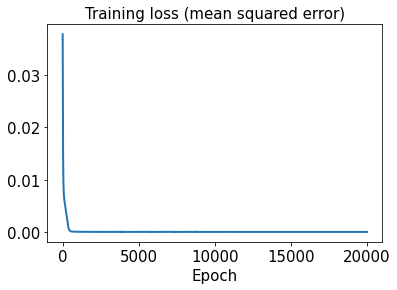

In [20]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

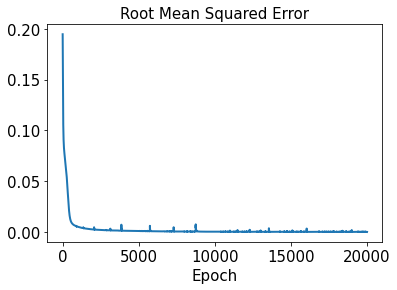

In [21]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [22]:
test_results = sd.evaluate(x_test)

1/1 [==============================] - 0s 96ms/step - loss: 0.0000e+00 - rmse: 0.0000e+00


In [23]:
decoded_train = sd.predict(x_train)

In [24]:
decoded_test = sd.predict(x_test)

In [25]:
error_train_abs = np.abs(decoded_train - y_train)

In [26]:
error_train_abs[3]

array([[2.19523936e-05, 2.57882115e-04, 2.14857602e-04, ...,
        5.17369423e-04, 3.33674805e-04, 8.97959180e-05],
       [1.35572773e-05, 2.05544726e-04, 1.83783297e-04, ...,
        1.09062516e-04, 2.35077052e-04, 7.72536296e-05],
       [2.32672406e-04, 4.14297567e-04, 1.77488138e-04, ...,
        3.35917575e-05, 1.46530307e-04, 2.96367070e-05],
       ...,
       [2.84153095e-04, 5.58691565e-04, 3.81869089e-04, ...,
        2.07588193e-04, 9.57543816e-05, 1.40362725e-04],
       [1.82019518e-04, 2.22684292e-04, 2.24777614e-04, ...,
        3.60772014e-04, 7.84160511e-05, 3.30365845e-04],
       [2.35666506e-04, 5.06823562e-06, 2.13530162e-04, ...,
        1.10120454e-04, 5.46229421e-04, 3.21097672e-04]], dtype=float32)

In [27]:
np.min(error_train_abs[3])

1.3411045e-07

In [28]:
error_test_abs = np.abs(decoded_test - y_test)

In [29]:
x_train

array([[[ 2.65753e-01],
        [ 1.01126e-01],
        [-1.47719e-01],
        [-2.55263e-01],
        [ 2.21932e-01],
        [ 3.89315e-02],
        [-1.00238e-02],
        [-1.32588e-01],
        [ 1.28543e-01],
        [ 2.00198e-01],
        [-2.86081e-02],
        [ 1.04006e-01],
        [-1.42255e-01],
        [-1.51440e-01],
        [ 1.49730e-01]],

       [[ 5.90683e-02],
        [ 2.38036e-02],
        [-1.43529e-01],
        [-4.10071e-01],
        [ 1.36380e-01],
        [ 7.30410e-03],
        [-5.72383e-03],
        [-1.19393e-01],
        [ 3.45399e-01],
        [ 1.20995e-01],
        [ 1.00613e-01],
        [ 1.33782e-01],
        [-1.67724e-01],
        [-1.74455e-01],
        [ 1.65972e-01]],

       [[-2.52020e-01],
        [-3.99666e-02],
        [-1.57509e-01],
        [-1.83538e-01],
        [-4.04024e-04],
        [-1.13777e-01],
        [ 5.62016e-04],
        [-1.09031e-01],
        [ 3.60734e-01],
        [ 3.08757e-02],
        [ 2.48391e-01],
        [ 7.

In [30]:
x_test

array([[[ 1.81556e-01],
        [ 8.62653e-02],
        [-1.48622e-01],
        [-2.85895e-01],
        [ 2.28596e-01],
        [ 2.95704e-02],
        [-8.25743e-03],
        [-1.27584e-01],
        [ 1.95863e-01],
        [ 1.93845e-01],
        [ 7.85522e-03],
        [ 1.23690e-01],
        [-1.52076e-01],
        [-1.62708e-01],
        [ 1.61112e-01]],

       [[ 1.56633e-01],
        [-1.58924e-02],
        [-1.46592e-01],
        [-1.87903e-01],
        [ 1.20277e-01],
        [ 7.21961e-02],
        [ 2.86305e-02],
        [-1.15569e-01],
        [-1.60814e-01],
        [ 1.46948e-01],
        [ 9.78153e-02],
        [-1.76974e-02],
        [-1.39492e-01],
        [ 4.66345e-02],
        [ 1.34892e-01]],

       [[-2.68267e-01],
        [ 4.22151e-04],
        [-1.22462e-01],
        [ 5.54288e-01],
        [ 1.21773e-01],
        [ 2.54106e-01],
        [-6.97419e-03],
        [-1.72102e-01],
        [-2.72504e-01],
        [ 1.87994e-01],
        [-6.22562e-02],
        [-2.

In [31]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

1.1536363e-05


In [32]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.45152688


In [33]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[2.3970015e-06, 2.684865e-06, 8.679955e-06, 3.264195e-05, 3.697463e-06, 2.5735852e-05, 8.271285e-06, 1.5720219e-06, 1.1295195e-05, 1.3168854e-05, 1.2233399e-05, 3.919535e-06, 1.03916145e-05, 1.4137466e-06, 2.0614323e-05, 2.9626854e-05, 1.3100592e-05, 6.1844867e-06, 7.8761e-06, 7.5716835e-06, 1.0861817e-05, 1.3141468e-05, 2.5830368e-06, 3.998536e-06, 4.083423e-05]


In [34]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.16709211, 0.17531851, 0.28487402, 1.2191104, 0.057352725, 0.36009225, 1.8574942, 0.11873029, 0.42147735, 0.039798133, 0.28930408]


In [35]:
dm = np.delete(decoded_test, 6, axis=1)
tm = np.delete(y_test, 6, axis=1)
l2_error_test_modified = np.sum((dm-tm)**2) / np.sum(tm**2)
print(l2_error_test_modified)

0.4526968


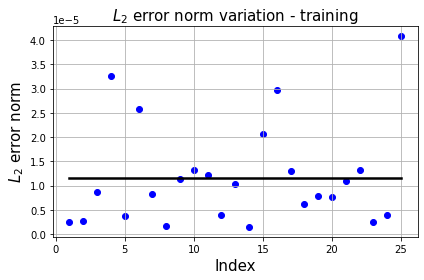

In [36]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

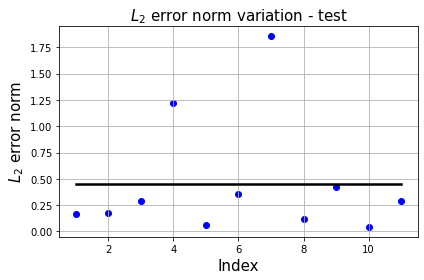

In [37]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

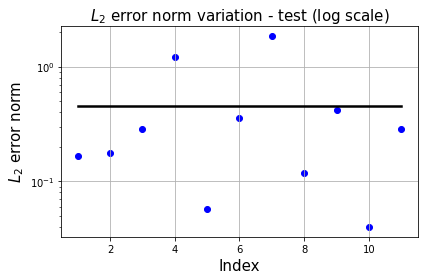

In [38]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.yscale('log')
plt.title('$L_2$ error norm variation - test (log scale)', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

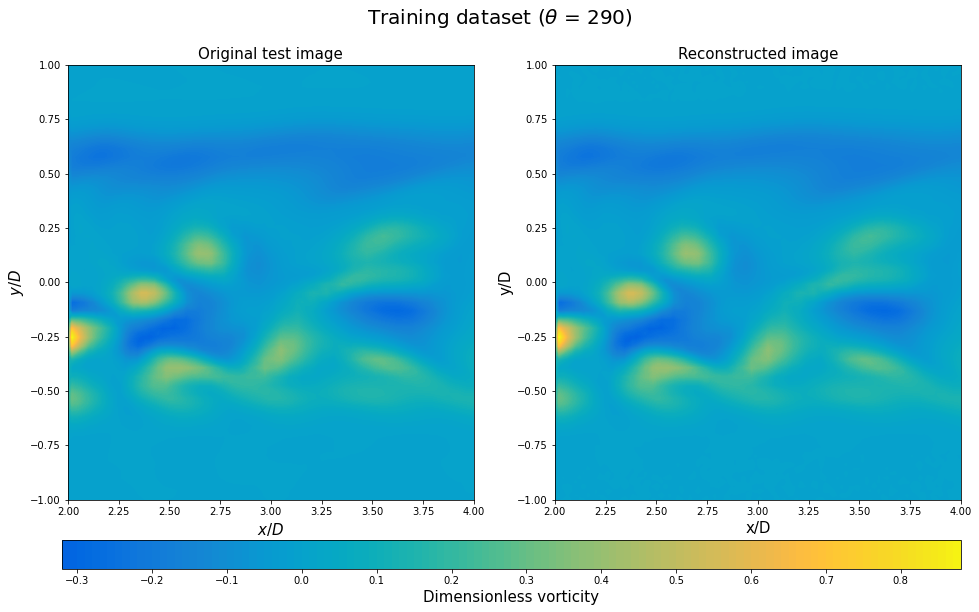

In [39]:
plt.figure(figsize=(16, 8))
y_train3_rotate = y_train[3].T.reshape(100, 100)
decoded_rotate = decoded_train[3].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_train3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.5,0.9)
a2.set_clim(-0.5,0.9)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Training dataset ($\theta$ = 290)',fontsize=20)
plt.show()

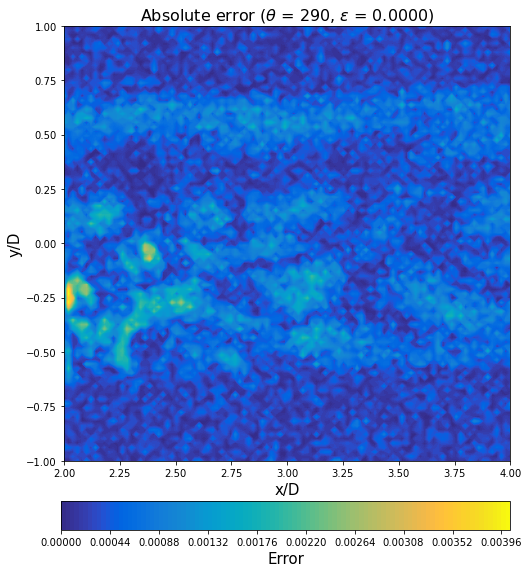

In [40]:
error_train_abs3_rotate = error_train_abs[3].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate, levels=128, cmap=parula_map)
ax5.set_title(r'Absolute error ($\theta$ = 290, $\epsilon$ = %.4f)' %(l2_error_train_list[3]), fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

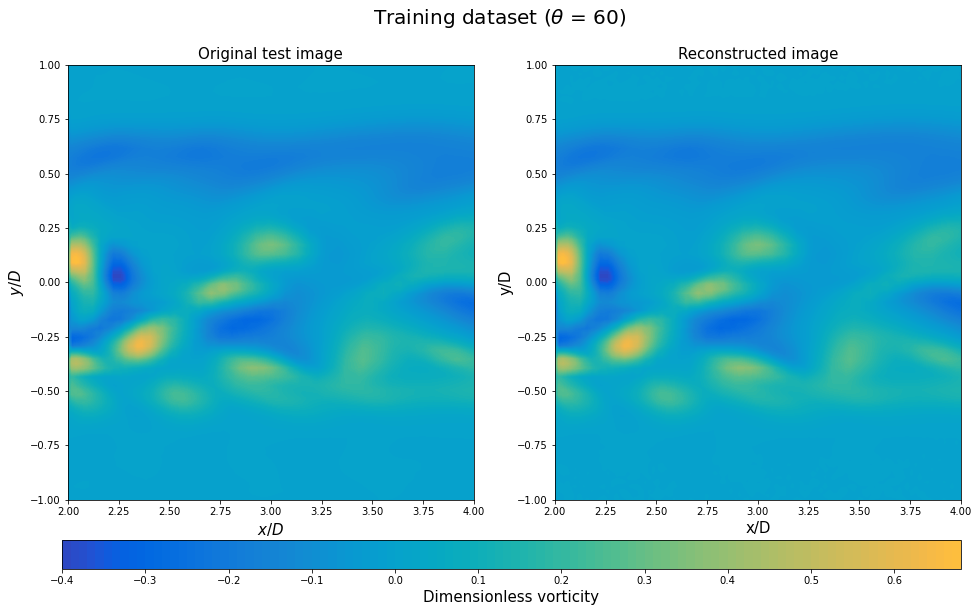

In [41]:
plt.figure(figsize=(16, 8))
y_train21_rotate = y_train[-5].T.reshape(100, 100)
decoded_rotate = decoded_train[-5].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_train21_rotate, levels=128, cmap=cmap)
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.5,0.9)
a2.set_clim(-0.5,0.9)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Training dataset ($\theta$ = 60)', fontsize=20)
plt.show()

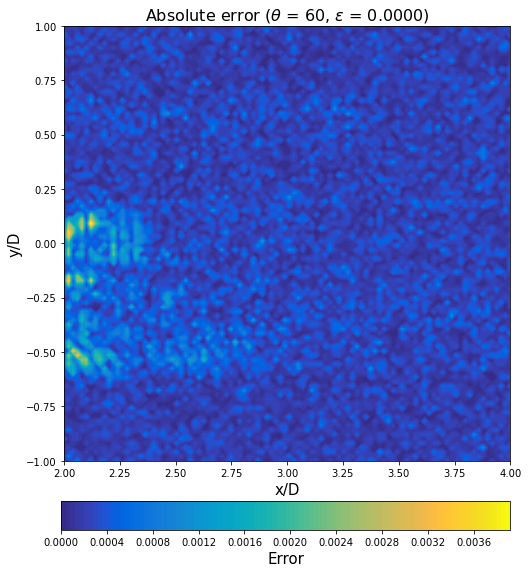

In [42]:
error_train_abs21_rotate = error_train_abs[-5].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs21_rotate, levels=128, cmap=parula_map)
ax5.set_title(r'Absolute error ($\theta$ = 60, $\epsilon$ = %.4f)' %(l2_error_train_list[-5]), fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

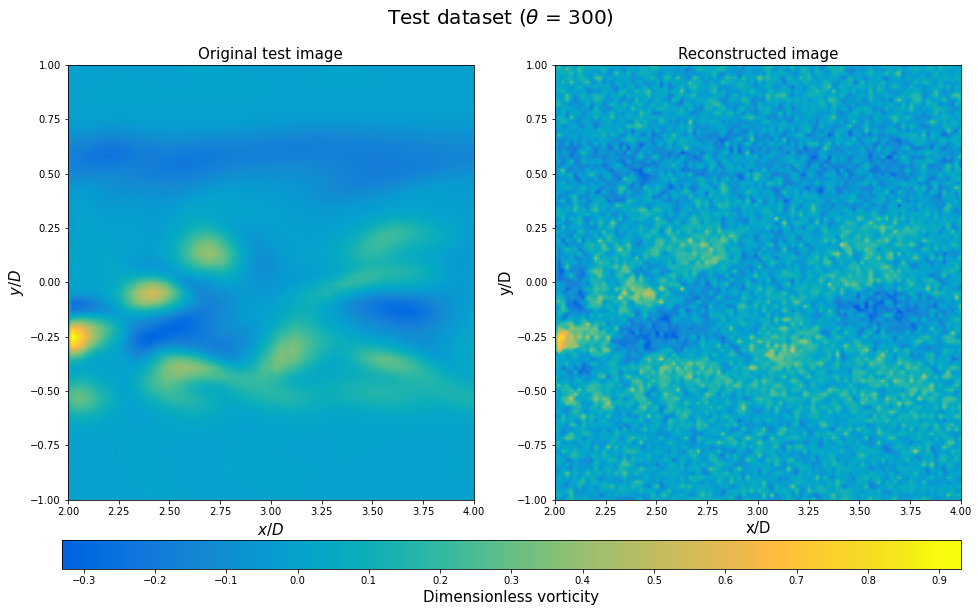

In [43]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.5,0.9)
a2.set_clim(-0.5,0.9)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\theta$ = 300)',fontsize=20)
plt.show()

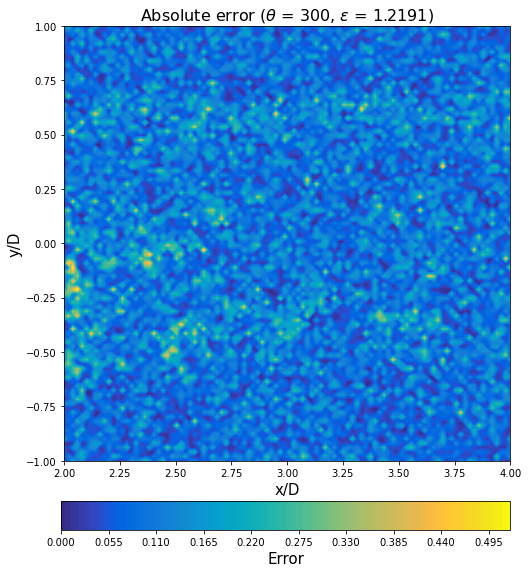

In [44]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap=parula_map)
ax5.set_title(r'Absolute error ($\theta$ = 300, $\epsilon$ = %.4f)' %(l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

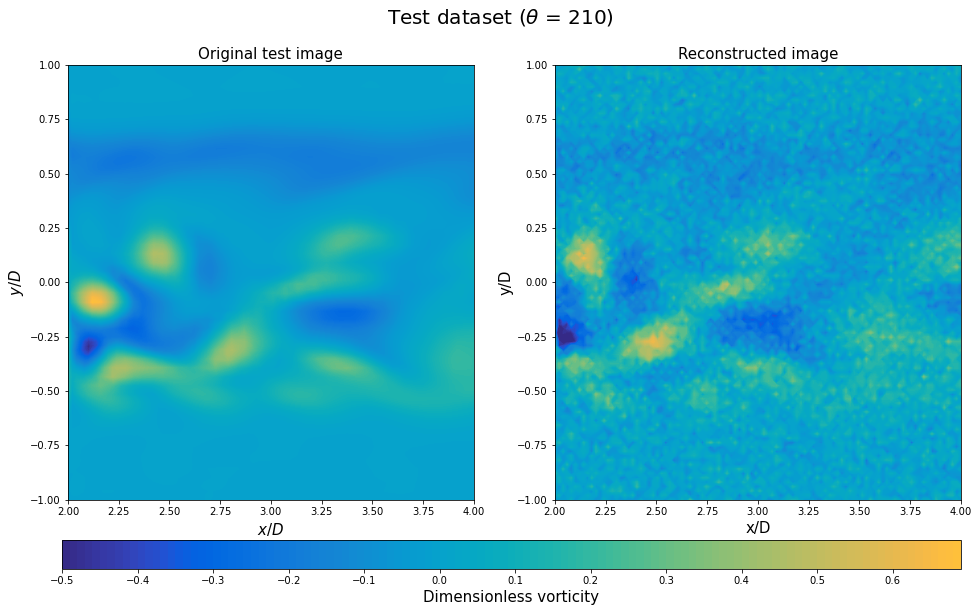

In [45]:
plt.figure(figsize=(16, 8))
y_test6_rotate = y_test[6].T.reshape(100, 100)
decoded_rotate = decoded_test[6].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test6_rotate, levels=128, cmap=cmap)
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.5,0.9)
a2.set_clim(-0.5,0.9)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\theta$ = 210)',fontsize=20)
plt.show()

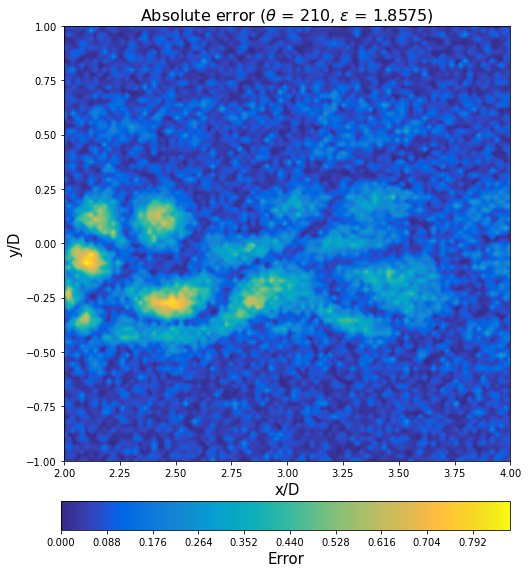

In [46]:
error_test_abs_rotate6 = error_test_abs[-5].T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs_rotate6, levels=128, cmap=parula_map)
ax5.set_title(r'Absolute error ($\theta$ = 210, $\epsilon$ = %.4f)' %(l2_error_test_list[-5]), fontsize=16)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

In [47]:
vor_ytrain1_D200 = y_train[3].T[:, 0]
vor_ytrain1_D225 = y_train[3].T[:, 12]
vor_ytrain1_D250 = y_train[3].T[:, 24]
vor_ytrain2_D200 = y_train[-5].T[:, 0]
vor_ytrain2_D225 = y_train[-5].T[:, 12]
vor_ytrain2_D250 = y_train[-5].T[:, 24]
vor_ytest1_D200 = y_test[3].T[:, 0]
vor_ytest1_D225 = y_test[3].T[:, 12]
vor_ytest1_D250 = y_test[3].T[:, 24]
vor_ytest2_D200 = y_test[-5].T[:, 0]
vor_ytest2_D225 = y_test[-5].T[:, 12]
vor_ytest2_D250 = y_test[-5].T[:, 24]

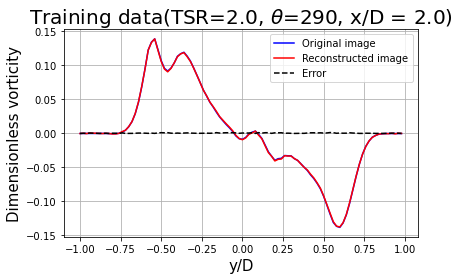

In [48]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain1_D200, 'b', np.arange(-1, 1, 0.02), decoded_train[3].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytrain1_D200.reshape(100,1)-decoded_train[3].T[:, 0].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Training data(TSR=2.0, $\theta$=290, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

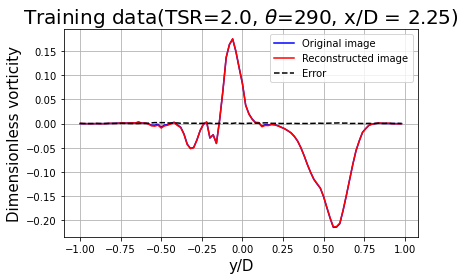

In [49]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain1_D225, 'b', np.arange(-1, 1, 0.02), decoded_train[3].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytrain1_D225.reshape(100,1)-decoded_train[3].T[:, 12].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Training data(TSR=2.0, $\theta$=290, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

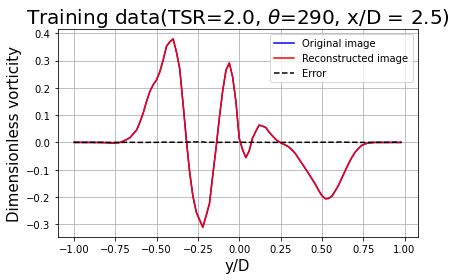

In [50]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain1_D250, 'b', np.arange(-1, 1, 0.02), decoded_train[3].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytrain1_D250.reshape(100,1)-decoded_train[3].T[:, 24].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Training data(TSR=2.0, $\theta$=290, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

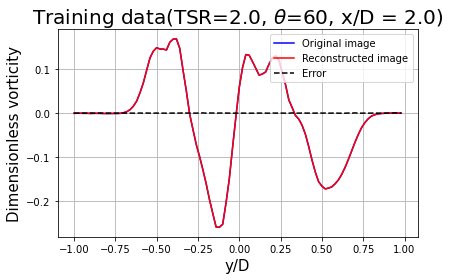

In [51]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain2_D200, 'b', np.arange(-1, 1, 0.02), decoded_train[-5].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytrain2_D200.reshape(100,1)-decoded_train[-5].T[:, 0].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Training data(TSR=2.0, $\theta$=60, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

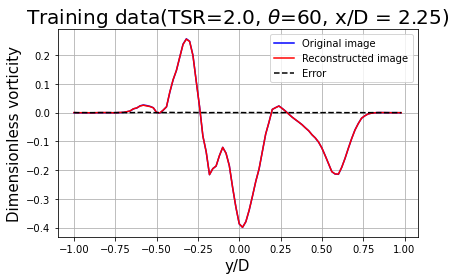

In [52]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain2_D225, 'b', np.arange(-1, 1, 0.02), decoded_train[-5].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytrain2_D225.reshape(100,1)-decoded_train[-5].T[:, 12].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Training data(TSR=2.0, $\theta$=60, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

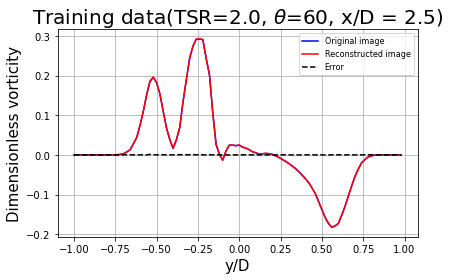

In [53]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytrain2_D250, 'b', np.arange(-1, 1, 0.02), decoded_train[-5].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytrain2_D250.reshape(100,1)-decoded_train[-5].T[:, 24].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Training data(TSR=2.0, $\theta$=60, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right', fontsize=8)
plt.tight_layout()
plt.grid()
plt.show()

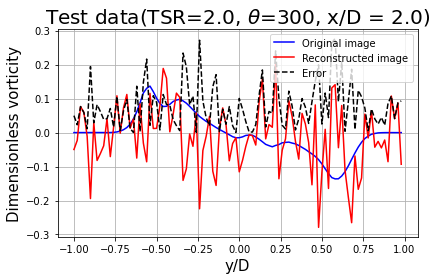

In [54]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest1_D200, 'b', np.arange(-1, 1, 0.02), decoded_test[3].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytest1_D200.reshape(100,1)-decoded_test[3].T[:, 0].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Test data(TSR=2.0, $\theta$=300, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

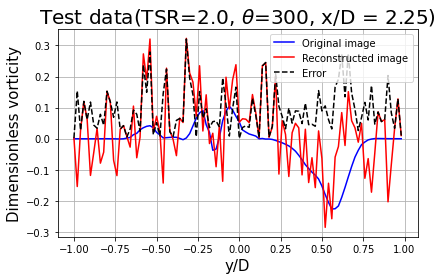

In [55]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest1_D225, 'b', np.arange(-1, 1, 0.02), decoded_test[3].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytest1_D225.reshape(100,1)-decoded_test[3].T[:, 12].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Test data(TSR=2.0, $\theta$=300, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

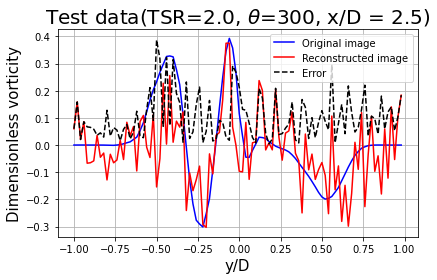

In [56]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest1_D250, 'b', np.arange(-1, 1, 0.02), decoded_test[3].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytest1_D250.reshape(100,1)-decoded_test[3].T[:, 24].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Test data(TSR=2.0, $\theta$=300, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

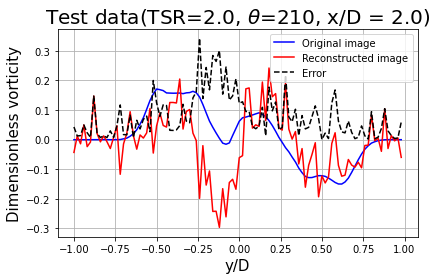

In [57]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest2_D200, 'b', np.arange(-1, 1, 0.02), decoded_test[-5].T[:, 0], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytest2_D200.reshape(100,1)-decoded_test[-5].T[:, 0].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Test data(TSR=2.0, $\theta$=210, x/D = 2.0)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

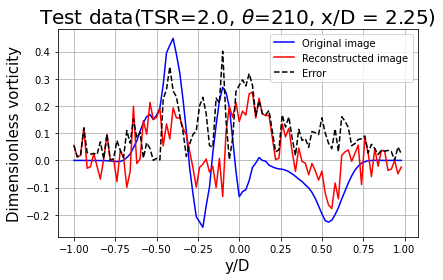

In [58]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest2_D225, 'b', np.arange(-1, 1, 0.02), decoded_test[-5].T[:, 12], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytest2_D225.reshape(100,1)-decoded_test[-5].T[:, 12].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Test data(TSR=2.0, $\theta$=210, x/D = 2.25)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

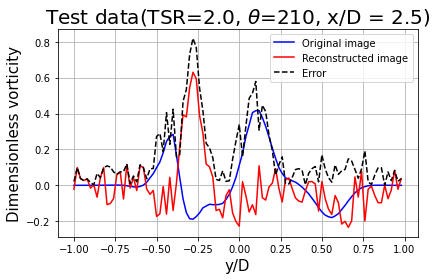

In [59]:
plt.plot(np.arange(-1, 1, 0.02), vor_ytest2_D250, 'b', np.arange(-1, 1, 0.02), decoded_test[-5].T[:, 24], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytest2_D250.reshape(100,1)-decoded_test[-5].T[:, 24].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Test data(TSR=2.0, $\theta$=210, x/D = 2.5)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()

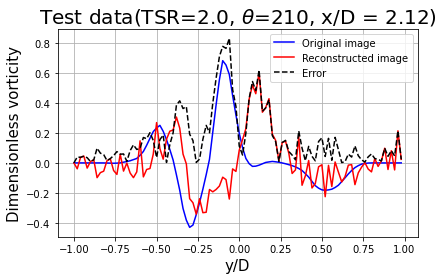

In [60]:
vor_ytest2_D212 = y_test[-5].T[:, 6]
plt.plot(np.arange(-1, 1, 0.02), vor_ytest2_D212, 'b', np.arange(-1, 1, 0.02), decoded_test[-5].T[:, 6], 'r',
        np.arange(-1, 1, 0.02), np.abs((vor_ytest2_D212.reshape(100,1)-decoded_test[-5].T[:, 6].reshape(100,1))), 'k--')
plt.xlabel('y/D', fontsize=15)
plt.ylabel('Dimensionless vorticity', fontsize=15)
plt.title(r'Test data(TSR=2.0, $\theta$=210, x/D = 2.12)', fontsize=20)
plt.legend(['Original image', 'Reconstructed image', 'Error'], loc='upper right')
plt.tight_layout()
plt.grid()
plt.show()